# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

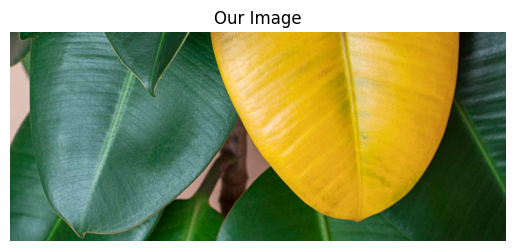

In [59]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

In [11]:
import base64
with open("img_vibrance.webp", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

UklGRv73AABXRUJQVlA4IPL3AAAwIASdASogAxYCPpE8l0kloyosqZksmZASCWNq15QQY6ZHYWoud5Q73Bxeh1190G6t64Ngb9aNwXo5/6vk5+wLsl8mtHx6kr5Z82s/udtRR5D56/UF/avRv9MXqc/6PpR83H1F/3/0gPS39az0gPOu///tTf43pAP//7e/OnxXfKf6vv1/L/t/+t/jvYi/csy/sH+b5pf0X9QeofaP/q+Lf6p4jvwD/18QKA3t3/yPO/9b/1PsCfsD6S/9fxuPxP/P9gT+rf6n9tPeH/4vJh+4/9H2Ef2x//n/B9vb////L4UfvP///+d8N37vI2UzEfydRmN/8a4AMR/xylyaaDOKr+T6Vcm1CjMWCcd0KMav8Lrz8l1p9Q1SnJEWs75v9a52pYH+NwrKnD1L0teNA3UtgukU7hM9s3sfxg2tueyEsUjE0JNiHoGwDVJA1BEPqVMQvYif8TeybnsrkU1tbq8JVyRYXbfkdqvqGSZAaaLCAm6uNfC2whO378CWhNhal804NCC16mInDQXCs+Qw+43+nu/8b/iRkhOtDgWdoUbnThWhbHgozPcYrYm0/7FUhyfhlBVuZfiSSm6zpMZPxsJ+0HJkVGjYoY7Wo06FeoHIx99Xg2nNCIt/mA5F9vhaBt6bDh4+euBpaaQopX1/1ZRnwxR9MVGRVHjpLqK5w3iJv3G0COG6xZmKdQBHe01Xe9o5hLWOspJt3Afsyi+ivpXmwN1av2CkwwRhdaFm87hhzH/q5n/ZaW9iy2ASuczXSWpmQLaLjn2iip1FLRf2wSl9HZRLqLU6/6pAe4jYo/QCvh+YIMOEz1Oq2JuQOB9qtcQMaNyMZ/Th7O7E2yEhRbKvdPX9OI4f7jdFsjZS7nC4ciiC6N3IVIO5Gp257yLF9drWk8wxeIZNkoL1Vr7EvaB5Thp3qgWWpeP6Du/WRu81fYx113fTSMmLB400RDnqHvYeuIdMe33Cd0eV

(np.float64(-0.5), np.float64(799.5), np.float64(533.5), np.float64(-0.5))

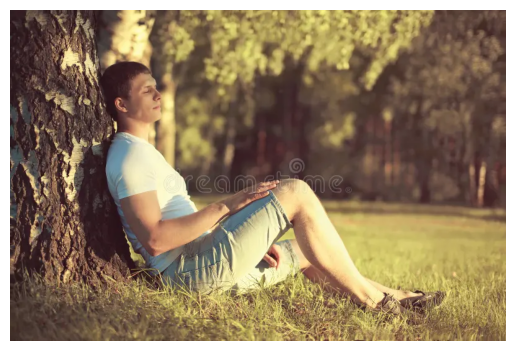

In [12]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image =  """
UklGRv73AABXRUJQVlA4IPL3AAAwIASdASogAxYCPpE8l0kloyosqZksmZASCWNq15QQY6ZHYWoud5Q73Bxeh1190G6t64Ngb9aNwXo5/6vk5+wLsl8mtHx6kr5Z82s/udtRR5D56/UF/avRv9MXqc/6PpR83H1F/3/0gPS39az0gPOu///tTf43pAP//7e/OnxXfKf6vv1/L/t/+t/jvYi/csy/sH+b5pf0X9QeofaP/q+Lf6p4jvwD/18QKA3t3/yPO/9b/1PsCfsD6S/9fxuPxP/P9gT+rf6n9tPeH/4vJh+4/9H2Ef2x//n/B9vb////L4UfvP///+d8N37vI2UzEfydRmN/8a4AMR/xylyaaDOKr+T6Vcm1CjMWCcd0KMav8Lrz8l1p9Q1SnJEWs75v9a52pYH+NwrKnD1L0teNA3UtgukU7hM9s3sfxg2tueyEsUjE0JNiHoGwDVJA1BEPqVMQvYif8TeybnsrkU1tbq8JVyRYXbfkdqvqGSZAaaLCAm6uNfC2whO378CWhNhal804NCC16mInDQXCs+Qw+43+nu/8b/iRkhOtDgWdoUbnThWhbHgozPcYrYm0/7FUhyfhlBVuZfiSSm6zpMZPxsJ+0HJkVGjYoY7Wo06FeoHIx99Xg2nNCIt/mA5F9vhaBt6bDh4+euBpaaQopX1/1ZRnwxR9MVGRVHjpLqK5w3iJv3G0COG6xZmKdQBHe01Xe9o5hLWOspJt3Afsyi+ivpXmwN1av2CkwwRhdaFm87hhzH/q5n/ZaW9iy2ASuczXSWpmQLaLjn2iip1FLRf2wSl9HZRLqLU6/6pAe4jYo/QCvh+YIMOEz1Oq2JuQOB9qtcQMaNyMZ/Th7O7E2yEhRbKvdPX9OI4f7jdFsjZS7nC4ciiC6N3IVIO5Gp257yLF9drWk8wxeIZNkoL1Vr7EvaB5Thp3qgWWpeP6Du/WRu81fYx113fTSMmLB400RDnqHvYeuIdMe33Cd0eVuGp1Hq1PLkbczZLr+Ty7teqABr7rqr67PSvSXpCFvxjsZPuVwzquqoyaqNtRz7H2KbD66WtZvIm83rGD/3KENSSezL7hq0bUdv1FWVBpIzbt/e3fKRLYoZVnZ6U1kkvf1+6O3I/8KM3UrItFVAXWknVpLoyAldW3vKX0snX1tYwuKTE7lL1eiv6xo0bxQ8SaS6gwzBqjs11P/tTJznFEz87o/qdY8hh2MGSNmFCbZ/zwxfxvG+Spw5l5MSRDn5YZGcSpgU1FFPnixy3Y+qubIBzIwUiRzK2Cfc42GC7Kx9eRFJUD3sUy+1lN6A95JoY4rY8qGoMGvEC91zc4INnTDQiQXfqlwCmjhGNcVEOoqCHSt+Stx+5DlYjDGO6NTYxUcHPomduxX4obJQcKXM0/O3kbRdS6v0OPekRX+z+0NSbuzrVuWwdSk7TyXz1tyKPBEXtRAJIv0olIjxk8r9YB0oF0VQLSKWgNM2NmBrgnhrpzDrcYoOhYu2upmXxGjwqTPYxk4R0JeBdJ61ZDQjWYFdNH5OSJq9abDCv6xvRy7pyFX50OPggLDbL/35wnWA209N+Gh+K9cUcZnWqdVr2vwoaMmXkq8w8ulcIQBi8psoilmT0Rg3T6VXO88pJ/nRMAwb41XzFljcRWwL34VnFja5L2yeujh/7VdFdh5mwxNGjUu+cedhu4vxTcK5q/CW7cQmzLpRY/tPSh+xmEQhw1jW0Ie3tCVaEAdEgeT+aYK034meQ1Jx8qkSTIL7mAR4XjZdBXtP84Iuj5G7msgOwVDsPVgboxqtaBwK4Ea5iXqP5PECOdL4s2DtPNUggrqTyIa/9Kl3oyBrpUl7bUa5Pyhvnj6hdizWicR/KFOKl8Vxtrljts6bEgoYLmbuX+W6euxCMSMm0sx4lv1SjEiIfBHwCLYRhbxrhkb9hC/GEkUWRejtOSRAwSIctXL6JKXpXuUvO+6r1KtoM6OBgFdvH6HcizTLjq513kRDRmbAPNg6jB/fZCRMuN1u8FIowht3b+E9P7+eNgyJHF7VX8RDSe5btd1hz0rokZogtsA8hWyODH2b+WZhqNYRQTLKYvxJc98H4NLggg4KwHw/G9f+5YXZ4xWbNAcibqGkGJhpOSITsigA8d66r2vqzkZHqKfLIKs8dUUw5FUjmT61+rwmCVwfwAmeV3lJYO+QODdejQQwRU9azLULD0yFNXbarawEdWeeMuoPpDZajx1wQ8O8OC+Qrsiop7h36pll+y1hOVigbHsjdz7k+YdmTDBbLQCUffp69o7Tb5QaXgSzMl9Wyv4F6hVwjMlAvnMoBgwckviEXTNRUPDCkpWsBEu2bbV+J3KTyu2XjOKT0jRh0XnL0GOnsXBM+D8r5HiaDHddZnundrj9DivkIbCHlU3K5agJiGEun31LfoyiCYg3sfOdVfRpAjK+Faqw7W5KrUuWME4CODyroBtBN66TMHFVPnKiz5ALAbvZmQcukYhBNE6e3fdoZgZx5qu25qvJv/BwNpj7GrIZ4N6dVpAQuhYA7FYfLq+MNUo4eiAgPw1YVsBTm3uhsOTN4p34dbJjQwyWBa1aALrC3ggsKnbH4xbJUUGmKEuljjUKd5k1/QN/4aCN8E8WD3zCKEHF5aQZppv1JZ3HNBV405YaqQ4UB67q8ypQClDDw1bFAobKUe/d3MtxqzsFmbnZ91g/XvCyfGNpqdWju0Az8PTXLsViPtVvUbjfjjvGMpLxfwYV5pAwG9g0goUDLLo79Jw/ClfqK/dYc2MyMfKzIaoztQqVkzZxzomGYGKYGW9PnWEXJZXioA56wGbqe6OpNO5AgbB9od+HWtre5YhfMpaag2oOOJXMo7LjddMkdGU784k2HOwoZyuk4O+q8s/KhHNZXP0u7cbV6TUldHTuuAMWjrmGR7YxG5QTLi1iSbId/2cwa8TIStqWPcICH/11pXGvnohNSBuz61mMYhdMkfbsfHXSZmnaN3ofgY7E2K6QspnGFHzQRAu3NVQufKECSvAdfudeLWFflUwggWhmUU63+fUlNToQ9Av7+a1FNdzo2mqK5rT4+l/t5LOF9E+Xih54Psh+u6MDHHP8kdxOJnO17BxO9Yd9mP4cMVq7Iy5cdvCnP4hpd5AHggOA6r+JyOXm50II17EWFie/6f/lnNfHSHAwd3ZfGdsJHiDPfcyql716MZUKHYN1fnevL451/MUrXaYXfdc58Wn3+vCGZvPnJsbPFjcWm6i3pstbUcJll8kZE5Eybqd7k8D7JZpOj+QWc95t15MSzein2ytjQMi0CkJNs/ReAN+s3ZOkE8XnhroxXIe9Zr1jWF9bEKwdq/vKn66uehsv9qOkoJr0oo0krm+Ne9vz9g9ctksfLBPlnpsXuoUa1d87/ZH8rKmkgN+qJeCX483JC3tdSkqTzj59prS9VZ21UK4s3baJNRQx0GvMqE7pCnV4v14Po9SZzaxUs8w8xBVDsRsSmPfB0AYfbSBr1xJOI+x9prWQ56e7EC+QRyrx4YVxfv5DLiDB752PuUcFJWhZ9GjX+SWiHO6JsOqfuHJYQcEUvUbUeYFskxqVY+M/DExWGXgadChxZpkU7/C5S9No8uHzHieNAVNtEmfjCovkKgt2kF/6yi9dZiZg4xGX5oXx64unG+mtq4XDqPzjI3zbyFOV+1BKL56uTmQ3AeEaZg/C8Tmwcj47DQGEHfRvFJa6+UUk7qrD6b5sHq7CE5IrVdJReB15V7z45IjgXiQLlmWKuv2EFTK7l9iedqHliKz3LD9fxxoy0fURrb3evn+ruKmixyJCvdYDC9duR60Sux1pDy/XA/jRrEXQFJirn2K+1AQbPKg9PCv+wvRUB2RWTN9surM2w3CFkIDWeQRBq+lNWnQILDYiyIL9dhT2OTIL4iPuLDvkEPED6Q7x7cOCQDydSFHJ30lE8zITvIuQQc+h4137dHP35QZXr4+No2Bj7a2tSfvbB+Vkm1JoemGz/R1RGp1ylkR5ouMvmbjQdpOC+I0hxUx2GjWxgnOuk5YRQ+sIoMEQlyTm4daDu98rgYLu4IDoHWkwNMfBovLq0DTlFy4YTdblv1iiz/71S5o0pqWJ9L8TZ/QB3kWdtbI1NxYy6Nn8Wa4ntqCFiFlJfbX0m5qPHrvbPnfhx7miKiyHhL0jjhAjwRrxDr786XoADUmZPFqHnr3WWMqkNfUgBK4tGj/rnqnOQfxBuN9+Kgm9IDybIWxzQ5ENrlDJhxZnaFKrFcGdK1DEQKUR8ijh5f7m6S5A6fOqObifQxGg7TUgvnpTCCCLivPKkuTnxXIYUqyKz0LE0HKpANE96YHqAyM8sb9WB4ErMei17NSS92/fXYz24uGpdnlTpjHF/ptKY+rjQoKrSZWWAthAMr4/0tAznv+V01ZOKutVFYXRUKWh96rIvWrlXJUtk3npMPrrEJQk4yf0kTqrfpxNv4FNbHxyqK23YJZsPN/cMONFB6k+un0ceWc9qw8BW1g1tq0QLcP21wh42PYDf6yWYzGN+sTxEQSeR9vmxfIxUsXkK9ToUCy1PCc27j8ipFL7fK+pN3RyR1G5JTJJmFtpFbB3nY15zGuLYbxGAbBpKQTU5ury9w6IgN1AriId+438E+9/YaxT23FcXnZ+HyQSwq3N42Wxy2pWy8eHuJ5G3WAEW4RwHwS13AeiXg0bUGtmCzLReYcJoqqnO/lHHwuRNb4QIwdTaf3k8PdZlitM6GAGpGdjZsmoxSKnMqm+xtKAxfoGV2kcf/vQksoNfRgKBTYBrpDRnGJkX56ebxcp7eRMcftZjyd0mF+m112yvYbJ0fP2C7xwU6T7uRRdRnAsp6oJ7sT+p/snDgvTBnA5zRgT638g4rDIiXgC4A7DOv0qcrLUJm7lyMCP0yNRBXjuZh3qMti9jkuW0mU9/J4RKF0mHD+su0XE1+vgSqrdo8WSXlyOYi/jWWBjRkCN9d5kkcesipGuBjF229sh9YXdoV8rnfc4Q59SkT0Dh9wzfnJ7iK0LbGvGPyFLIjoCx4AyXIuiywXhMBvJgb7PmypVf/Ub3MqGTZ/3CtupymZTH/sHUOUubzIfrBMQ/wJqOrLj30vxVu1tUD6SwzraeBy/WQ12S0xtm8qjHQ519zCz6fOfIt/al7JoVJrGOH9Eg70zExNpmPg9/a2VEqNAPwwKx+fS88cYZy2MacbebF8dG4tC4jPfwd6CSqUY/pvOqSogmi5gAzMgfVB8dtrru+NX8qMjeMVH753Fv2zLiYKrdiP+kYNoyXyCKKsW9bV9I3zL96ByjyR361lm8IJ8skxLZAeLLTNGOA25SRDPG1EGvGuzbBCgpzjIJfpSP7w9M13nfq2qJ0iG251wHbCTVkqm5NHU4TLi1tQNjKtVXYW+XLsARF22yKw7M4tDEhUh0Nqwow0uEsD4b2+I0lKQnflvicMxRdphNbpAFlGLb4OZS6apNuXCPzjb6PRDnPn6q8hwezsDfHwhnquTYxze7m3BlL0IOvh/u+1ktKUtnU8QAfhTs9Q3oGFnwqJwZ+xY1Q+bMZPbnsjZCnlgg/zsHuk+xhjCuCFnWCDccw7eGhSKcYJDOSmzyWtEKohWipPE5tW6lWX/GJ0ppJZkvcUm7UtMGcHUMjqeaCLUZ/Iryt72zjjshjMpZvD+woUW+tLqeQHPruNRxU0V/M/n6Wo8l1afb4o6fPSoZor1krWeVdVFQV6QLPTkXmMqigJbDnQObAhqJ/qnn/DYOn3w4q4jEW3E0+rlBCS388hP9Waj7B1jtVuebXDzn0O0uQH55x1uvYRgJL3lHxxa8qWx7HZ5950nUkCZszM7pqiZgs3qolcr5K0KlQdTRFL4FApVxEIMzhFdmRvSqdsIndNQ0n5B9Dw+0i190UzGSTpFwRuYtRLW2ohqb1OPnr7Ms5JY3dv2U/likvmdmDt6NnXNaFGxYg+c+uD4j7GU8/gZS4mEVia7nTCsmUDhB3pYiegNj9nUqhcGQ+pdL0Z333wuDG7hsFnmozaPQA4LxklmNRhx68fkzsQ/xSVux2D0z9hpNW0DlGPzCLSgGGhJdq3nyz57ey/l8I10fPwy49dTgDMR2SmYkLqdz/5RthgzoyZKdYFVio515kTZIeZCehTj5XmMIZxqs+ev2Gml57lXmwGpooRHouwE7/Wq5siPvmmcSDYY365Zklk84JkHe+Z1oL8yzMdwHTwg6fk6EBaE3TBgrhhUFeTGUyGeKkzkOP3d+2d5E3gcIuvyuSXzeak7+Tu8KlP7hDB637lIxsilImUbI3nbAI52zXlZwkGmx5gyJIvgZWmQnCdaGl5kS2Y0RPu/u9VQkXN+b6oiVpV+a10BFFVoAzPNkt2rjS1qPVe2/UjwsGREr4DAJqnr/lWPXC9px2qtWX/rVwp3v/ZXSdiJhv+Fynh9Bdbw0nhVGkFmW9V261r0z2DikCACaqAKt9+Y3tryJSc7oo5D7Ax8MBJRBHszccIKEmEeQNCJtNIfwHxkEeOdUBAneC4XjSVZ3oLRgsa18uq1OWtPvH9E0LCDIc9CKVx+GP44RmZl8P+E4/Z261RVkhF6qmEph5qhc6PSlgtakItfG5q97jwal4azrXpkCSa9XoOhMR3it6xy8gH3EQ3y9IlwyNEP4ZKGxaGYBwCjaD4jS18wb3c7S/dZ2YTAQy5T8sqYXaES2mYCVcPQz3s6BCv/1r0+N+VC7YA3exFa55m+yIsjXaUIjZvYfpJwlIf0BCyLVtqPbf2bl+aTw4mFUlaLPXihP9rGWYO6rDrp0OL1Is81+9G6hAL548UKnNWHbwzrwTqaYLMq2WAdeS4Wm8v9C1bi2myk5fwMUNA08TX/0VnzeDc8H3ctk3IURDtipfw6h3wsqrJbf3ZVGeBOMHb2wsDUWfNmnkt1WzoSwSUXYXTaD3E/57NOxVkNWO7NkpyJNflDGhlyuyyrkgAwr2kzXcxza+F/+seyHZA3vMPEtSbqNCkuQtVSNkYy2uMPVXWamTFxM/oK17qDJ2E93RSEwSnTSqUzYHbogIpXBHVh/iqjOAeqnhXAnbC1pJbGRC7pVvp44XQoRNSujURS0qtWpl8UM2ICn5Vzl8zi+084ZN1bx8ye/ph3HT7vrINbc7qlk1vvM60Nezhs+3QBigRrWWGgDm5FY5pGPxzEIweCbk1vZmS5v52GSUJq3d/KHAmj8EzWmdKKqpGEYpwr+8DCWX/G9Eb5/zHqqgw8m1kH55ySPKRdtN33ei+tDeVcfzBqUABgtiCx1rNDjieiTQucDX/C7o28Tcv/nTd8kOE71B17VibDe74pr14tGd86rBQwUs/ZKbBGBwXavj9pJbgylSUsvwefUSbx8EbzHT5j/uEpYwdfD4xqzP8CypjzLeE07oxl0FElKTQ/axHcWetP2O8NlJ7BdgH1a3c0BTIx0anIc2d18J6K3TYdrTB60s10XEMcGWwQUj+iuM1cU8Ebt6o0ihWXlCeZI4bFhFvbf74N8d/0cbWcUJdb2jBBVRkFWTGBE9HMeA/x+FJOEIZxwjprohBxUd8FXBXH/1LC/3xcMAtS6P7bOtzKSz8LT1aekONukbTY/K562twOlkoeQSmP3RHbXwRbIfrrjgdxRnlqNbOJrI9NIk4m4Mc9LeBLyZzCOMg2QNjRul8YoO4JedwKlxrebXyvEJR75bP7ieOz3ngcvANHzcjIGY6uwYQiNWU4OW6c0qkv+1g7xsV6Ar64GUTC915ZnpzhgUk6f4JCKmHz0TXNBD+QgBBEnaRI6aqvBVu0n4JHKq/+dI7Xofn/iV9V7w9ple1x44H7n6p3zteVX24yUediSL++oUqGpECLzvgrv0u9bEeqdiGQ1Zp0IokX99KoZZCVZ3QOLV4A6JhblAaZAzMFA5pIi3UR74Rn4FVp6nRHIXd69AvSXOT/hfvAMNLskXlhrXwdcrJbUbwhZSzPsOyex+JY3uHpLsn4np8/UyFo5aTEZeunQFcCh4swivcIidPYbmkjUuKqBwaAJU6NJGt+a62tfvEI8D4YGkUyl9FfZHy6fJJzYZ5/u+j+O8nP4jtKjpCP9cRBdolSFKSTTdY0InBXOZ6+JCFYgssOA/1JNP7qnd1vg+kSLzCtlT9QbQ5wC+88J8ict0AtwCI2cOasZd0ovVj2OuYEAkF2meFq9GKSblH5l1uPovjKKVWDVzoD02KFIRPlcAvyZe6RzZ/vhBy5Swn9fPRAD0Mb9CDp6SE/DEtk72AhD1B+r1T4uP3Yi+K9SQ4V2OQRNsWb8wuWvqzqZUecFUILbTfCF7I5/l1WSbeSw9XgFmf+Np8razSSQ4GYXEm9MZ1BVc7By4oEWiXuM4xeUR/t7zS/eh+9aL4BQD2EnQ5pC3kV3xInsvK+hIZvziJi2cLvoFOpeeHJ/134DfsRaRjcvXuSnM2GkiiKiw4/zu2C+g8AzSNOYyN0DPh/rjO1+PTflRYd2hEaopoimX2IvHCzFADYKuP8+uq4ZF6OpUadek5QCLbxbN31zCQy8N4m3THlAkAdkbxmx7WbA1UauNKbhGaybNHOLOVsXfFZN/kB5V4TD9PHd70TxfIQef2wNuwRqnxOCgXid+7UeVFCoSKPdCuPcDmrcrCoRDDxOEsRLVkfl6lEIleGnDdGyCO8SGEhoxTm93BWqYNHrz05jDq5faPu3V8ksTAT39NmBYzvDQK6K+o36r5x1wone/ncpz8QeOyK7WUibRYLy+YvvOva7nI5N633ilqX9g94Bk6RIvBAjgpGH1nAMD3Syos+1IT8oJUuzLzZjLk7wyEKQZNIBh7xD0KLERUV8lMS5TtnZR43KqV5vHWBbEj0TBIGuxXaveuYLHzFDXuMDhCAxJTDudy/Uahe+6SxFIq6Hg7/M+FxPYORZLeXCYq1gD10wJfVRiJajRCFU8bjABdSoCGkUk8sFb7T926OinF+XPAUQWYyY132W/B9Nhv0WS/sebrGsu+t2HRQTSEaYq0rAhLLr++iwbcNM2SgvblSve8B62so8QYYPbiyL81Eq6/T6po5J3/3Uv/rbD3BmHV/POy75uGWamXTo+TDmgCs3O2YlZfapN+61qwdPNoOaPfDsX6huI+1i9BwZJcOiJHFB8WzG/WZogdSZVFDX29+inX+U4Xz4AEr6OU5G2R3AR1qyr82+tj/OXIAC05FKEyRmhkgp9uvQTmsjL8fyCSz4awARjf9SAwObbnCClAgliQ1lf23rfmmqjOBrz02dNLeBEco0flxT5DoJzLcl6ARnEIIFpUQ5k8MxHvQZwooB9DWywI4TgFt4rU1FCIQ9bJatW8DpKYnaiD2ACgezkdyXvfdZlXNuV91RdRVv7mBQbOkiWK/v23axraKZsvXA1hBcRmDp/njQIrVr4YLZWv170Gv0bj8VXqHQNes574UCVMCKZc1r6vED1SYaN53pjBZawi/hA0wqiA0aTTrSO9OjZMABMYeE0ErBMQhXtCWV9HAcIVGPVI403G94n8HwVibiydpt1i1XmQh5FSBS/UNLP5pW9TtNeykyltLkkla1gcNeTk/hBV0zRH7VX1MHNA5IoGG8eU6jZIl5ynSLuwhKFrZfcJrOlPOrh1bBPIQ6hWngpSBHQMKja/FV/l/67TI4tpRDWOVOX3Su19VErOAMC/X06YLvXcwF4a0vId5MaCEMtf+ylX/4pR4JFVrN9sbD9dugL0VsJhd5jeO7ZBrdbAl2KingANSiErInXeCjIXpeTHj1IMPQApeN+8HLtQFSYyMcvtjUrxvEUmhk+CRwRO+hXb+lvLQ5/cikSFQHbHHr7Nj5LAZBFtHzftnoGApTNIWCT9MzcMTzY53Fwp1g3IR0yXNa4p1WYysH2YKZ9pcuNtPLGbCEkZLrGXZr8BY1RSx60OnjMrkePFjLJ8lX+ynv4s+GDUY7yyH5XLuzgngf73SiX5AJCOlHZ31V3YvZ9N2CZT8z6TUxT0i9jkPMcp4q23+e4eWkVa7DCDzIREi8fVbd3Vssvm49d7m7am2yOyVg06ZN0wlCuurZ0Ng70XsnuHFLWrqR27+9F88Cbuqwx3qPWTQ2yeCU/eGNvxM1q5fQl3V1qg6rBlc7R2jPTjJ79wCU56f1qsewF8ZMVLH7IuFoiF1uFVc5JyFGiRirtW2N5xn7L8DD6gkX3ud6aGgTpfezvtuOvEJ6oAt5uzuXZ5fhikJIqVNDPORyGdVF7VdnTvaO3JxWiWIBAybahGvlHa3UTkRorOXuJFqWjXdPO3v6TIUUqm2qijYgOhiaSA/hxwU4A3k6ESaHArqBM73Ey4F+y0hk1TPLXo6RpWtk3ih4hrSDPJUTMVibwSwKDzjEbawtXp/5XRuq/Kx7iwZtddr9sU6q8aKVJZA8MmuDlxMPSsXf1yGAgyZqGNaWbeXZEg05SzvtOFZ3PWGCL+aohCSzJhEYGLp5xfroyeyw2sy5zG1eVKgL8qPSnYFx7/ZrnNH4imVskPiM1z3L3hqxcnKdEv5VnLE2MSwWDSNwVIggYgC8xOwC4yTYpkHSo1ASM6aQYN8fr+h4lNPW1RGbCqsLH0Op+VURrGpCFs70/PPFpukOultaiFVJBKVd39LUj4OdUV+a0A+vVCHxEu3YhgyxX6qtQG81zLcvMJkLD54g6j/+U1Wcr9RXJzLkSKRYmPEs4sy8H4hgXg+FRWOBkO7quyAg9JQOBHeTx8p36rO1nf8GImJfV1sWQ2l/tdlCeAby0TVWtg9ZtMHZrCmgKkERFUni6+kKXC6CGi+BlhIonLdiFMc1xGehGO6JIhmYgQbzphXsY/WJLWCgkTCMxiefgoMhPNnigVMaz3/b6FnXOgmXcn1yv+zMs2EDs6LU1FEaAb0gXUYE9a1U/0gmefeW5YC8J6sGBOcw7zFXEAxdpA1FqRaKfu+3C57F3QRRHRlark11mQ0zXTJYLjF3JBE7sdOR7u78dkWsfo9cYF00CzdwZRkVoIPWo8Hy9Zb4pU3Sa5NBkdZggOBIevxl5R0uYG8L7in8fdXBNbwaFjqwePgImp2irIMQRqEDLNBhHavfoATxmEtFLAC12/vngCe4JqgqmxeIq/sL+Vkk+ZADr1r+2qFkHxcx5ajeoufSIJ+wzEmpFQhYI7qAkDjfMBnkv/7ur4+WBJ12Gj/X34ox+C+ob7yP1xOn/y917dU7HKWMlQJlK+EdSXRWcXPu0g2mPiZ9CDzwFgunmN776LM3/F5C+jn8Tx6bKt5WZE1Gi3BOcC8gPqDAS53+Opy/Juam4h6P3NAD+AG+OnXcA8rOn1F5iZTHr/5ORa8aMR/i/kdAafown6B/m/aF8/aYAAP7ia5WGA0VipLQOvOao4g61672UVgkHhDwsg6FmclTK60jFmxxgNiBPHF/Jrm0gryi3zLBKsHFEzCCVcE3lcOXFkBbYLtcDri6dm6nKDstbDbia8jxgkn1nMo6kBW19zXxrIGMu0FycRypx+hKmJSxPfh12Z3/6ssEpHhu/z7GNr4RTvVMefyrLSX1U3RB5M495Kyesc2wyYGfvwiVOuHQH6Q29uU5HHhwAsI9hikWMD5srZaBsKsoorWe+ajhbJBi4WBwU9GMVqj7BqDrFz+Yr/ur7I0YnNLk6J0TIV2mm0q5iKZlKTrp9a0M+sds00rUEfk5vQdJgtJRM7jXXBSlnrfCQM+Af+w+9t/pTX8woCQegGw3/dNr+damiS86QEQ8bHjAsTofyCfl9muZKLk3HLQWvCFkhw8Zu1J/XcrskDkkgBV16EeC8pT2d18fcmDXGLsF5+f073ZIoCXXH9F7dpPWzewzseSdDPlwueADGuP7KUqZ4ewLfSjYZyMeeQq2dZDV9yc9dVODkyzdUV6q52l381bdbOCmAAi7aFNnsu6sJ851S/aIcaG+xrlBjumgul8Sx4ftlDGuEfc9n/uQB9X1m4sZA5IPpxOnoMQ9VOHwxgfKky7j0SCUY66KKYnTrSGCsHWqnglOztSXmLQDD9V3EwcBc8OX05EI/O2Y56TEcpQyeTFQtrOleqXtMdEpwsNQgw+vIgJBvBL+v8/6lSl1En/wwsFL0WLLS4gR0r37ddcFWx9H33d6eQyvowLXvOtdNG+Kc9aW/C9ckhKiDnTAMkWYm6z4CiQz+cAh7MjW7PExzEEKalDPSbNNE0GnsfmL9jom4wokwDlxj3Y6/dTWhlunf2rdVfX0CNJjql6E7poXMW5M9gjMQciqpO4Wn6Dw0lU6TJ8U3jg2VhxRLWdn7zMEE6pWzL/RT/riVev0RhDOG7GtkNB60nR2+LlGVV3bl3oI6km9RapLFVlF5ZZU9AXwYPu4Skeoq+yC7Cl1/VCImsTnRqW325SyE/Il2Q6xNnaqNeQk8hwFQq4KVMAwYVBOYjLrPSdlc8pNjHz/LN7CSACPnOKSreJs6pM5jIn8YPD1JAmJnvBRBWcSnTvsLrtdtlipN9EygFA411WRO9Zsim2rbkrEE/P5vRUZTNTLo42MIrnSSmv9Nvwax31MUCDQPLiJZ1W/dlzrTRqYYrd4OrU635jMvr1G+NJXxwZFFV7Agu4b6OwIUw3c65vDODxaOiWeXSBXg4Zymyxu/kpE72RM0ASJ/cogUEoUbEPCLo78z2RmjEVBdKiodl93odmQtsUEgnbzC7nP3mkWYMQPCIP2aUAajS+vt8pB5LOmJ6dqGFjvtCEsuSl+epyMddudQari9KOlxXRn2lJWo0+dB+70Q8MeqZijD1U0sw+Y171wP7+vN0MBHTPw1MDxyojWyhpWDqje0puwlkRpkp5z7LyzMafNxqdz8kuK2k/uw0UAcZJM+/p9sEuUjaHYGMpw9Gti/46am6c7E7cetgQQuYlTTUQ3IIyIsihFhO1IUttE0pPEvW4EsbJYGPA98jpemkazi9eOEHfV1Sb9ofNb5xUM0wgfHxj+GvkpbWE8kt5IEpXFz7yVBzL+8e7stx+gGwRV2UGPjSz0spk8mGUVv6b3xRf6+NeSGzsHzQ91Byv9RDzRm1PsTDpw7xzBz9Z3pBYJSMPHV2fB2a1RtHs99qAJKc9OWB03BO1hdzrNVjTrJJ+5+x9Euvgxo6aiuPjc1QJhJ1K4RWdsWsq1c8EbKy55YozFOCQMXTryNMwT30N6LSPT8cvsEqzbWLarN8UeArhnrEbkgsKExYVKmJPp70y8jn5HUbA6uL9p91m8PrQiHkeTyB0kZfAmF8L9zHtEZ2x/swOW+VCUYot9XlFAsnmEGBwm8xUsEtP0Z48MlZYHEk8zMTN0m9QKmtpOtVrJledf6vXHANUvU8Q143vxUFcIWsVIhFS+UgmmyFYscv3WrMNJwta/VgJvyybuLLSy4iIfwyc8tDPnjcsWR+LXV17VlPVBGqy/X/rA5eYvpQo6NxKgq7ZayC+vUWRzmDalUKY/wH676IF0WNapz6dP4nh9QFGQiOzeNA8InWxA4u91N2Jxc8zWxkmSOEbf1hcACJKNeL+doOWghiiSdayFC3l6PRFlecSz6O0Q64G0ALQsvXnzppEljWpNZeoZC1Psa+ha15T8ZnkUoXwjl0l7L15nadUbPHEd8bn1aPx4rqEroxUvtvYQuqJzbSSD6IsracOVtcYdw+10AoLe1tD8VyOfCB1p7qxTp5H3/IFhIsStjKtdbKC7kKRgjw2kmID0/okj1gnXYbSRamOsQFkAorAjW4shmLmlcXItNlgsietS+KclGDc6ZXIE1PcOiodEgLeCWjcj/FE/2csJgVTwXPmUiIuQBtr1x9d4obRMea3+bxiwpnVDu6kjyUv9vzq7q+KhYKosNVXdpQIH/IqGKyCxmBU3jsqDbt18Zn8T/fxmpId3m0TEHB9jurXRaK65RpOtMWFMUYzLTn1dXx3N5GHhAIvbHtq1LglaxYjuapw1gCU0FLeEVPMNljjSUYJkvi+m7DEpvcvon8hP3+sI5/Xr8YKk15B3tvfnX2cUlVzedSNGioqcRfIbYAN2aVS87DaZ+anbW1mUVIJqzURrIR3il8lONxRBbavoh+Q4X1rJs35Efm9Da9B9ex7eHhkZotMyjMC7YyQ5Y5bSuejxajH37Jnm1BpEu2y5iNqu9KUz3wB8OUTz8NDobzoyJLo7gASWUvnsdMKFYKmg2FpXx+oE2hcgDzuqzw2FBrlHH8EVmw7jbfAZp8HU3uWbQOPaczKMTinrgXU6pcE1QGmIjtfMit2DjGYp8S18uzFrkahZEVM2///ukpaF8GG8/bI3JCg+070YGFqmrUN8jChQpbfDh6Ti708B0d6AE54qEm0ZJ5h9Rv8P+PNjhbOrRp4RZP7PnasxwMBkdlphniNVk9SQLz4bYwSjVrSAtAtRiOTFSfaWchqf8FKc9d0Kd6yHXJDyjUbzlaogX9SsItkUKFFoYtgEeagb1dY027CuaM4cBpV/G0j3CsvYAfZTrR8GavtGZQ5ZpExn9CeiXRZ7pUr/ySTKQrrQGY9N8M2WyWV5vl9D1fltLREcDMPYqehl4wTJ0dm57RdSLntRFNfg93ScmxSDlAqZNdXlWad9mMPKb/wXlCuq8dP3Gxw+s0Xz2fHl3p5cA/zSe2o4qXt+OzXdqpPGTpi7EAaow2p1mScB9nEWuwtMk8z2XBBA4AahrXvyBF3XsoCPvDXqAneqGR3gtYkkb+ptM4pnSZPOCSKmpgy6sovS2q8Q745lUUWMdev6Qwh5mq3UAUnE2wnGgMZNyC9tHrB6hdoB5KaF2Wm9coOQCbk7Co7F49HVrLLFbVXUMTxZWH73MZbSyuTpcNiLG/wmNyX9HOygVoxKzY5FoyTsb7CUTJcbVIJxJO2Lm1/bs3fphL2iSzSZTdUAVK0aIEGY8gxeacSEZbMm1oIwVkC2xBwbtrDkAfbRQ/p02EgkKPLF83R0bY2AZ0DB5UyXwbbYwrdaWDUPXr9nFsC4gm2rkVefXN4qL5ZW0PetMyYQe3FMct/TIm8hGIOkbczk/OVGrkLvq9xwSrt1nNeA8I3BkwIaaD+xA4A5e31OJ9bUygG3d4b49wwBSW4me27YTghngbR9AWszuhIoKC7RzYTv+9A19YrwzC1KwTS7yQMAsJLJMX1z6DraDyK9NrDsfCw0OOibeGHPLCfWrDGcNb0JMY8pn1z/MNoamofXGm1IqnXh39pK8Hpa/znY8MhuEzjGi34Y/gwoh53p904uvp0q04YVSSnabKA3rITv0ngcVvO0qvE+EuhzbppYSJfM0XC957eS3VDAL+J2Nj67YBJertBnTwnG4GPeaLGNVcfNcKOcchIzzjqL6FT6668Tc7bbO9Q78+5a9mh9OjfoBt2gKRSrid0CS7AmbAMRNp+WSDNsegFGqD910vBBfOyxZYLTMbkYFPv69UCOvyTvcrH1q3PcUiUTEjzUBz7hf5o99VmBHgfGP/lfYDv/3Y+/g+4/hL6Uz6yxDTFHHP3W35CAY35Vwrr+dnYersESHnutxBWSxdl6vw9mrjFZsPk2yVxTchnkigYwfeGCAa5hZwpvZAnqHudZ9s4Tua5/TISO6lYJKYriYgBtjNljEW/G+sVKzDSnQwRPfoBi8z56OyRXN3MclcuvszE8KSnVpELtrh0KCCB9darI0GGQu7MhifDL8nMq/4DyJyvXIwRiCQRo7t2TLz8QDbVun+oc9wFIZAe+fEfFnpNVm4LvaUFxNdMHWWh3rHfhgK4+bmX4S2N2g0E5Uk8BnEMm0B5BXQ4lRnT79k5pMj/CvvCop0/3pY59X1ulK1O6Qg+RyI3v/N0W00Dd/jp4IUAj5BV2h4Ky3w1N2oW8yf62ZRvGerHgoXKbg44W3m9Sj2H0Rw0ckOm71u4+ExZc4M9nrv2iIcn92dw8htJm7FM7oj+xP5+Rj93ikmRM8LqP8+X3Q6k93YhrxyuD0CnNZ/q+KHdRhTKnBx5DPI0rkVKZ7e1tbrXoNe2oZsWVlIVEu7rA9HiiGXRctj0OtoJ4pCgka7G5YVM38Tnn2DpYTB1kGbrybKDWZSYxBcBwI2PAaTHNnxa0v4go8GGD5tzamZJIcNgC7f14ks32nDF15HE3TR15dgEMd0OFxPUTVEvX+hTCK3EuwkIT9S+WjRkMW8waWzXI8yOqi6v9FMmtgWgj8bv35BhCFInGVxQcQoRIoAdS2bykcF682KU7gIPD2RCCaCF7Vw5z29faTIfWtLkA7hMLfNJs5JGwdTXSpauTCSaQcUpubdw/5IBsy+kcm9e/bDcwHKf5tSIwEYG1SHhULCzsgFkngu0ISRuxJ7lzgWvurbPvPmXMi/PIqsq4g45IHamIRbdS/tmTW1zi3byhfWgwi/xqpxm3JobhbMvlJRyvFWcpUlNKbH3809/lS4VbgFKn+smkWh7mBavNcBkIOG3V3CvT+U8WmmlMhNi0hBijXyN969JD2H6S07P1NAu3rdfIvTP8PcWF8kz2HlI5KIvbVtl0Vluiegvc1o60eBfdWnLWHvUywU8zK1q3WJceoDqydqE7bxo3tyu56WrrL5FYp+oDXu2UEkE9Z6OfCJCV/yNNkdUs9BEcCOuVVL1qngh1A1M1ia6TsWajxVVW44UrpD0Usrn5Gl17TwXDKRRB3GTqCWKGTJN2G3mqjg6r70aiUdJCmXdAewKCNKd/EMkFMolA46SMccrWwNWyPUpZZs4XRbn9Eq8WPljpOql1tvGD0zbU0P1DQ88x3xvb/GYCgRlJIHEZNcCwQv7IXCL5WIoOTILWygcf9krxqLIAmfvo5Gek2pnkFHDWDAB422TkHqLSMX+UpPhuerwq0frr4MCMJMy8+naYVpjm8lF4p9X8xRwxvZWaEQ22JFkFEMGNQrmfTU3nYtdFlL6XCF+5Y1jJY3aVW3lNTziaKm1HMZ9ApuCh2yAS6aMmsE+Hsyr2AVBClkuMNetVZz+A2B1chfdyhWCrNrcvGkJstqbVAEP4gefVHfU4CWtZfV1hCGSw45TZeDh5HHCPSUtE18nPddNpUhV4/kgF+tyXb8o/0iw0CdNgXUuPmUFkXgQRe7Oa4Lk9vB9XGS+xIJJ5Jvr7YHybDiEJ9MVQj/53/3Sx9EU466WsNMu8nihs5ElzzjSG5MKYI8TSPJ975gRBim5vVx0FOtxT2zBc5tR5+8AVYoxg4cXMI0ctpfU1Vp4sh8G2Ysz3cGvB8gcj5HZlXVHG0EB+Ch1iNBvFB+KFGoumcCGKPhIN8CYup+3ruueDhRGQsoHD+Sn0BZymqz1H04sb4131tUbPfb8Uri+HdunQXCYfATH/CYe6Co8apzBvTO+GBKYcLrupwMGJV9sVdyhLQ0RO8DO7su7i5FmnwtC3/EmIsxzeEkmkm2TPB864PKxNlhtzWWww+eSDcb4eIMC3t+Ah1g7ksqypFMjZTXEFADLvrR2VuLi/260kSzOIWBR9F8PJZ36HrEUYGHoFQbYkFft1pAO46UWfN0i0aqxxKUx09prA9zgEsZC2jBaaqan1bNAPMo7kDBTEgU4/tYlpRwT/cHu351V7PCZldMphFxeSK+yhmzS2ZtjRcmRNeDItFt7Gx7FxILA4Qq39+GQPJyQkEhM+Yd1r7XElqkqAYy3ZV7BQvlzLJEQhQ2tciyS1puZ5zlxqIKUFNSodv1/YM1FicyQLv816r4oWuNU3fKFJOQsIeJ/uP9X8ZLLnoadZN23V2FgL88vshZNG9DJAzzzOiTLq5aRV79xmiQqQvUeHP5si/A9vQm37wCCmlaKVqWV07ZwYYSRooWmPsrWKHp3+SIA2jb6eQj65hFBMYGK9+ogqobNDSQc5uKAPkLXNc7BICC+3wPBKCQ4dH+gJNem+iJcPUduLUN3PIiD76lAUUXfZIyDVPUdbz8T8si1sipCgtb6HgrDemQ3T50i1S0KC1aHuLOqcpgd/sHEtIM+f8lDZmbkYXW0rQm0WpzGZxyH38lIG1jhUGyD3XfhPKq4U1Z/5VEDX+gk9ZE0+ZPXkhHOpdxxQF+Jp+c7V3Wile8teTYzEWFSZLXdbPlQcnwKAQYS/Y+Vvh3HadwPPkiWtNY+x7EAnhMeNWBtEMUJ/qusvjROpT//E52TXw2fUkWIQ+3GBVTwRvckvFB24R46ZIdwaN14pNtf8MKMpwfU7OHCZtlm/UgwdnTSkZV7d6AfTnABJkt/qoq4+LiPhfOqEwy9TE674kmzBSUIxCutTchYVpjmKb7MwXbfGwNRLeYsAeIqh1BzQ/EK0XZAKAgCwGsnBRUWObXw4uLGfpBeiJZqHJ+zZE3E9dg4BOC4pAD8vzSCzcTq93sRX08j48qnsNtRMxwJNZTfIAbH1u/vvJcjx4BoOYf0s2gX6doyvbbnPRKEXfvoeYESKb9VDAUh6ESxL1hAsMgO9DKs+AWXummQFRX7Y8aZpyFyhWWQo2/DEdJ+/B16/Ing5yRzcsEMXFBV8Gz+57BVpPzHmI196oAw+WvY7cpzhKEDqHHJ0jFao+YPbJpI6n5EnI/jd4SbGgPqkXI23fzqFfaYxxzgnSmB7r51CbwE6eeTNFyYdKalDIqvIdq6pC7Wc7AJjvTquWq05wbmdp4nIeS78bg30Ao0i7+cV6is+xXTj9ju+masmOSb7WG1WmFWc+8WOgoGx5dZtclMqpzFU7qtNgU8Eb7iOKAKexaPE2MoZwcbrb/9IuYetWBR9DeO6II96ky0LIFO9e6LP0pKZICtn2lVDJctI2E7JuJXG6v6ETGBNlp5adTlzbcz8cC3KcNCSWNaYqaKNBl+WPtfsghY1AD/qaTLU1OHKD58kWo/FUcl+nlkJ1jwZZ74L+iomVqUwUuey0mho0ypjL5SgBHuI8N+qToGSa3mqhlpdxoOFtCfBRfep9HgINphG+pSYnar45IMY27/CfZLXWTtw2k3EaQ2hTtwVouO+z6CvT2WMoNtTBlqJKF4E+mbAlVtyfK+Cw8yf2loJ2+EPuLQfD6Zuosoh41G3AOBU2pLsKJbG1ZSDMFb9Mc+Br2dcA8MkJzg3A2limCuIDghJHO/xNuRlClo1hmpC3vXi1W2Y0nfByaSA63WLyb4QAC6Ud9scnuJta0ykg2by/aWUq87gElec89l1ac8qN7H3i8qBVP4M9L2aKRPlm+7czwOZ+jUjALpxv/RCWEeI5mj1sKWsZZ9Qigr87ppi3BaLFe6J148a0hJzR+flX58Ei1u/DSudA6gZbk5FGQ/1tquqN94ewrDr0iZAZffW07J5nX7Ih5T1krtdwg5LVfrJ315bHrs5rhmVMS0xa8ukjHZiduERSNX0zNERtAwRJ/3sLcS4KpXB3NhkK6OCiaf222P5gO+MsonV27kwRynUjA8TKhUG1L6bhbIuEJX3KMyzE19O+d5GqKGRE0uZHyByDQG3kJoEEvwNNzJ4fSVRO1m/Me30LGVAm0ZqWFuaxvXeu41S95HSsw/s6duMfIcXVZwyCN1KrOYTxrxvjiCTUw4WIjlMRLf2wuCT1qlM8MWUV6/Pyq2hJd851Z1BYThFRdeexpuxYM3tLeO4sS6HZXp7KOSCOY4+lSRiiYm8xftM1Ni/VZewcKOeYkcHEyjC98krIcnLtb7J+Rj8K01NOG2uURqCsW3fLfROrTibf2fhScsrdUgKENJ0gFREij+87oA1sN7Zg3GDTe23FOgJnyiDectzMsTEM82GW5oR1AGSV9EBpuKtP3/swOUsRZthYE5s/CvLdGIihsjpoU7w9U7NFVPnpIIUZb+aEqd7tCN3wwGxRI35buqXwxHDbo96Y7+KzMZmGXCofmR1cyA5w3XmPrBCJp3o3Waa8uOogmDUrVKdZiRgCu+j75e/lUf5yaDymianPo+B7cR8HIqDupA5FDHnLpIHRXlhIi0q+RXfHn2AgIy0q8HafizCxiZJJjd+0A/i6G7mc935iEqLSlR95UmR6o8rmROtd4pr6KYLLyLbwQIvww+EWa0C1wq/R/+auqt7KK5viaYoPI4yox5qnhyP+qcLf9T8SawXU7NI/dSn626awlez2ZoqjL24Rejxp+rsL6qtVTgtP69NJapcyC4eg5uPEPo7HH8dVrsVtzlSe/saRTYarEvrHyaDGaIQOh5AtyVlDaekjaH5NMpgDpb6azcVaaVGSKGdXDCMLFCaV+PebsjUrhCVvaAlIHoyIunBFtW+1h1/ctoYmMoUzj/hs1GMFF+YAqx6rfzUvx37s1kogX/edhMJoLbsFzaWyNfYaXJVkgkSY5LN+snLIkKXwrvZiMLtzyIyn53whqJ7vpXyHtTBpFYY4SwYqfpc/MIeKq1TU1LwbYOaKOEWpgzob59bzIRILjfKvhu2eZ2HU8HEII1meUysDuDbKtMwJfdo6PDDHwCl8/Vkpp2qAUWLrc2F3fyw+nRXUxOx4BiQcuzkEKGeDcigyXMfwtRFt3awum5OZauH0hmi3Zid/WWKFbqY0MPiGxoDcGHHi2hu0jqMgY7C/d5DZkuB338E7O4RfBU/2toMKB993l7C5nQufzFbVwaDTsLSdOK3wE1gMOPShndaL9Z0SmkoT4tO+dw49dKIKWv8TqhRpDObSjHCw5sg/vV1Cg4Wve7qySkfUqP0D3/XqIR5N1SPfkjPrTVAgTzUt7F+UnCmDJjVxAXGOXP9A1LPZJ2UH56ZwAVqsIGFttqEdm1fzcO3QlZyAwOr9vjbyb6uGdvKUA/d5EO7EXbn3U22GNSArPEpoHLtjPW8LWB/XBFSRd3fRuEgGMH5IZ1/TH4oqWe3bOQJU+O9IRTaFjC5KuAqGx5Je8WvTaIItUvg7q84F0aKKW5aghjTjT9/0sdl3L7xYBSw4Zcv7VrnWDrJcinECBZ5BiyTYvq7tHuxeRZH506AXeW0rCulTXPT/HDR5JPVjkGg1hFrS3F1OlnvsEoOdYXDUyxoIgKHL3uYDc92ky6yYV1mJuE4AUUmwcpVXCMRA5GKXdrz9IhuMyfwPAHAXDnsoJENEkA70CZhrP5vkP6pInBK0p4volfU5i0xOleX6n5JHyCMp54Pu/Inl9ZEKY3H8O3WZgZZzFWnLk+1kIXjPchwMojLNrx5MnZXYVIsfKqYc4Y7eEo2Ew0hqM2z2E6MkqEQO3DuuC/dgiiegZHs+GAR67TiFZbEdtQ7VckA6VwzE4KAtcaqEFqObs87O3RZXrOZwGM4KlPrRqzUQtzSVxTvgMtivoqN6gW56s9/ubBYheT7FWbHNJi0EpZT1xttNfWRvvUG9L7ljLu4ngDTPUhFQGir81CYhs8vql05SLQCcvvBjedOIHARkpBmdVV/BRrl2/QW9fuZgDzuZBcDoYRyXyX6isXfHjW+k2EBoh4oBQnzN9SBVjzwVeBlV4zVKzqSAAqSnaV/4FGHuquV8sNpRFEKzy5IOBlj9a6sZTPZ4I1px7CWIgcyGbXYNka6V/ISIHUXdAnj326qZnEU0u+Unb7H//KRv/RouKZypn+iZIOgROdmWtUi8gf3EQosdDJjdZG9IUsDPYeIEKZ8xA/WpS8W9l0+qRxqU2mwasn0424uKyMulc0b/ZiSzJiLiQ6SUYl11TciEyAvoIpLy4U/hfXJFgmk7Go2+szB5yDb0iSiiK6EGufwPX4A6UmpFYsnaifLhQCvWyM1UUMpUGfHYTh6n1n4XH1Vu0av75wKvTqYcSQ23/VlLjjOpt8nfvE7whOkEondkh47CtSn7tVpLYaElYKoO0HkQA/yULOvT3Pusn7xoWNl0kBr6lQv2wWVJG2URcZQ8Q8IRAF1LYxSLUdW2oyOGuzngtQwTuWCZG/bXYlnN9icKxRURhufrqcXubg0+2RJfzSRX5PYM8zE3gvK6pAKvpeNdYXPKjmtNMePdoDyPsZXVv9MQzwfiZXmwh1GToSngoErOSndKUqiTqBRtkHqsXZMhb3RlNUYtRItUTNFiCbNtIHTsvpbDLRF4rTc706gbyU7PLZk4ieXWDGrTUfDeVAkoANY/HDiiyLWXPGaT+fC1lve+/IY9B9zTAByC5VqSaX44hGNpLTkxe2aAsmilspqPdg3FF1ZarATLoTARKXVHwRX3ycty+QKh73aeOuAX4qjxmmKzglqDkj4Z89h9Obati5CifWmtRF2PjmOlD8uI1Kb/qVC1hCw/WchYmx+DnxVo6sbQpxc9/ygF9yX//twQ8t+HA2XTmfsCGBlan5NIpTEib7B8gHcnzcW6DWAfAZqwuSvj4zFFBApc8bqSq6+jb/A7NsfNUWFuwe1FBKwes3fIuII0C78PMccwZqznOX8vQdrf1SUWxMoBbY5cZB/mYQZPF0BYS52DAbBgbC5YBHa8X+hqH6MUt5sJjf2uDh5CMP0/1VybNiGLN6LPV8w/1lRL1zHPFOKlvjiwtqVtK7QjGrNBvuTFnKlvYZ3QgWWILbTqwQmfcwBPpB9MF3Ibu1hGO/HmgDblFodYcmIGec6iPFhFHFrh4UZIfoedpXxRPunM2QiNaMB+zVFwQYs0pALqOPee4ZDHMNVJHnzEJouFqbYPCy+bxgGpZWw+bz2z0lQceYBVmEffkMt1t3hQSwaQzAMH4SNYdg3+H9SRxYeE4SCmC760ql/PRx5kibgh7HDsENmjQG4GaRLQYTFkeyPyTB6DenEvW37t14V3UX1zZ6CP4uslLu3TZSSvJqnEuoTSONj8GrlkYqTGuV7mUYrVgB413sLMPUALwaj24W0OtgWGtAMdO1R1pfiAezCiSzXE6mmJShlKi9vtsRDVBbI14MK2HS2NN5G0w3sDhKFh/ojo4DzVWmx3Y3BaXLWGGQYEuNy8Ts78+e14mgO9nHzqmZBvSxix5jsCFgo6bFJLyDEBTdPsGi0INHQVFmbAbOqAmFr4hbuUCXoWb9LfCkW44dEOFs/mDwJnhFxW1v+fJvzy7+vYVDBtUKUrIyUv/tXjVQhEsR4uCJX3gIEy8ASPKwnh2NP4/DgF/6NCRE1FAHAUu9JTlHYCmCEKQkr9cZLudela0YHLNXtI0hsoxD9J/MUP/omotWlJ/JZZWfnTw/6kbdm8iWIAi3tWLbnpdgJEamMzSj6zWtGd6G9Y0vZSlhX7xbRSzR/Sqh2k8GUwMt3NEQCyaNyjahuciMDxVWMF4z/ivBo2fYhR7efaKms17z4uKWU+nM2KcAjCIDB+4mYjcFgMkucwMEIYyHjZPL+AcvG4e/5qNNMLTfEYR+QjA9r16Uq7+jf1fUJQg1m3eDpOsI1EBMYh0fcQKbaTzpoAgqq8QmunYwV4ou/ane+RRGtqsmvrDUu/lsnwyQO0Yi/9eE2nGXqgtwljwU9s/K201s0ei6Pr3Ry5YdzsmhVrrIj4qmGJWWEwQSzRR/Viu3rLuwU1vHVX6vWuG5nENlpYq00HnB5m5YI3b3h0f9+3mOsTm/57s5ABurMrG6gWTQgA491z9K4DUQwq9Qz9S2BLWzmsQhRUg04+9it0mjLP42/LoMeVZOx+pqjkEyr15lZaM8nvaOx0DyRgDz3/9PenXTY9Yf12VtDZWQSfziy34h6JIgIFHQ1pGKjWM1o+6X0o0lJGqMOIB5JoV95ufyjt5l3dTJ8GsWadO670B9zMVr0/Lsu6R2xGm39RewxQwv8bvWUzH5YakWbnRcK561h7vQLGaV2k6LL58H2y1AZwuD4jVeLsmyr3QQ6ery5RumWG/65O0SHCO9PuYgaycjThShJOKxknB03gOtdjzo7DZn1X5+9KPoMrEkgRSN5nEJMIK2wbXl4O+DnihS9Im/uc3rov87sdXVPlp2912oMSMlxETFJnSst59f/JQuEMIOKFIpXWYzqfU5cujCzCZfyRtotlJvfM+Ccdlok2uanQ8/Hxg675QMbBEuVld3sQugjDac3iossQEiQyM68lHf+Z8u8SsHLK5t5ZS2YT5kY1GFsnWXp7t3KyznvFylDjLeqHEAzwhft8sa2x79m+tnvlrbXnq3iRdmpPMiSoF17o0c45uKohAmHlJ1oGbSmGjzSvioDlIOUlJPlWFYw7o/V6MwDKvqLSZRt5KLLlJTrgsUTv7eDjZ0qsq9TZyPgHBtL7roEExf3kZyxGvOl6qz9zPUVvXog5ylEF/OQOemRia1gH/EszT/a2JHRFQ+vJuwy1SLTYvKdVccYWj3d170y/tBvgf13F+Ndid232NM/au9lwONfxXkfP8+ZZxkoQlDU/VBRFd0VFd6TylXDx4Om/gDfCjrLx3x4QddSqjIgSoJZ7Fm+NUtMo2y8VxI4Lvolzq0lTIlSSxMvEqvuN1YV1uPIjAGdxVvoT4j0J/w6M1LeOZHUZcLVjIISpPeCvTC7uskw60LUJAdUdlZYqVFCkgIlI1XFDSDIOGd5LRVl3AkdoYI+OdBOzaAstDxs+bfoJGe0glDUWvHIVNjGazqprN0YftxEUj4aKDMmE91Te4AqUeeyw4oDpl5t8f0AX3rj83gsJD95O7Eh5rg31FBuG4+Q+6XbttRY5PVh5gVlUk4VwkJMYZ8OFjQJ3gn2fs9Pl87Mqvmmiq7cWjBB8n44bFQCRzwp5VSB7zfGiA6hJEhkti+h0s+8OXgoXCuXVPrpzz2Yy7rPDE5ZEsQy6rVJTnsU5mq36rbGhfYtL2+MGHuaQ+LU04npzH7H+MxVguBVBJjtFvWEScuRKp2K3okMdFD/5oAQgM7lrLMdGQNd/4Y/GpepCWxXy6H2/AcWmSUtp0DM0Gvl6NGdpMVpY15DEW3xDNe1PtNlyG1YCpIGFCBMUHcBt2t0WxTgDLd9KN5lTrehfETW2qYYi6t9rQgudcD7BhrU6KkJQbQg1gKpWdcXfSgkr0zGcJOTSAN43H1DpzhlKUIsuHfRCN4AxIo6rhhC/8+UwdiKlwGqQWTqOdkxBD7UErbqAP3Io148TSp1q/SLNb3TeDxjmOfzkccj2bFQ7vwC9pU5JxLh+d69rzZct+o8MDBnE2ud8f3y+80+FI/wDY65L1dL8OucpKp4Rv0bqrNDheuP9tOQQkBSLYqPwP5cYolz1LMur/5O12GRUBIubO9OpjpI3QvFlC8d9/Voapg4lMHi3Dfx1fVSySNE4t/1+GAeCqnrKm6f6IS1jaDhSyIeFDnjraoTbnLqUQdfH4x7xcdU+PeBRAjZRoZrUI4w3FIgNZ9/aMd7Gm5H+4+hMr1rPoS2At+SEySAAAjYR1aEjz4ny+W+LNVnKO6P+j7w8PS8cPROpiRISAyCM1fiUL4czjLRND2WNgNJTKQLlYBdq1DZmf3ohiweZdCPBjTeloyJ8WN83EGBAZWU4wi7GAqacJPu9OJ12GAN0s3hml0074iINcSC+SRgHvET/oWF5IdopJfJWu7gSc5TW7MNi1k+Du8uipdGjJSJOp28J7vzDPHkJRsbYOjNDE3KR68VKk70BcGvjHDGHsQ0z/gH2DclFDXaZ1evHd2GqNFLnR5H3KRTMzablBQwUpuPk/5g3C2bJVhYFZlXM6ayIPEzoGobgwAGC4ApAL/eiFVWADUQ4W77QyKELQ/Kdm0WsnV4nLWangQGWc6PNrQfcRrEXSI2qI5zeMsqvaNC5Dl2CMHCOr64NgMy7Xaz2MWGRYFwtg1Lzk3VO0KQZkPDSg/8NPfVTJIBLJD02UIQTpk+ut7RrY3DolmmoLl4dnewevz3qm55qqnVxFDOtDNw+OYlFzrpzWIQPbK88no5kOca341a7U7R1NyHQG1dHbR1mMkFjO8Gmp+x1dZiJDhkyTbTyn4Vrk/o3erBcUsGVb7G0pMLqdhym7EaYIpxk7FZ16mOfEzRYmSGmpN7zvdK0iRp5dqx+Isc5zoze/LEJW3MtvkWHkrIu6zWZK/tWGovNtVx8oKcbFxssNsJRYKHMAWm9P/dJiWFJG+hCXeeXsWtboeBacoNH1Em54zUPUmyqMttNwRzmf5NU858JzQiDOfaNxPit23Fvg1MoL2aX12b4HtsgmCFmT3abk9mHPJxU4SWCcWrKrauA5wujrz3pIXj9iOCXZq6LSqOGVI5Ph5ndMtWhyAfrFXZuArPSd3bykuK/7du/Cqq6yd9QVFa0+gGVZm4OFlzlFq02kC3iDEBfgk3xLttDuxQ1y9H2FwmZzurS0ilYOOhn4wUGdJ7pTc1jqDC/tIZxTBsPZZYXr69/ABuuKGULFFjTipfk9u17cLp6GtsygmTD/+ggKax94n/ZlBLa/tU6ibBEAMuE2o2AL3HNIS4J26vEKLXNJt3tEcChv6XCJtgBYk9dsgpszsT3QJWCFYvhsw3HWPWTudtAxnUqIKOsTN1nRLbzJYZ7MuuQEmI9wNmDtQjQYSlHzUK2qdzsOseaTNNAw1YT+f41Mp8DP6Kwdp+70qTQW0X7WRUAffITG8fgVQdxRDPCAazkdFBt/YtFeXTBlN45u/hBJ48VSb+Y3ZPP+y/2H+/D9FmcLZ8c6abPNojkAohxyUV6JIy6OSZyROXzeL/3+v2u2gkgjOt9M+iCMBht8Depizeg6DslVyLIBa/TPvviujv8nj6Hjjz5xaOBjQAa5DqzY47+4MBP41tN3CFDXYw4LrHHUxfypad7kIPlTEKQ5PefCFN46BxkX3J7YRu/W7i6I64nyWpr0BtwGa3SXVDgV68Hycjm/hAat27h4Qv6fGoRcNHQnWqzLhpCHPJAX5r1o9obO9hK7T8ujIQJPKutQ8QUsu3EuGdvDXsW0Ji9pJG9petvVGKZc4X8471au0SuNLhccoM2/lwKNJ5LAZZw+SDcndzU12n1tQ0DXJPXfRCCjLvQYikpgbB8quAXZT3juuTJuAJcHxckzY0QuuKJIxOYXU0Bww1avGrqF3oeVjcZggzIzpdLLdyu8x0aN5bBum/l+Szm5uoH7fyeyWICCop2aBcqunpXVmBSu49kMkFnaUt+I7pX6WyEBK5wQEcnADzlxDhmkKnrCE2jipBJofa7J6a6aNZ9n48wK9IKoL0EBkrRIpHVX8DsfIAVaRX77shRq92fLTIfir/HOYTJIzbh4boCTzilzGJrdEDVqlMtnf+OJ7EGJIDgvERm++ErPCup26yDJd4hfjIYEGM2SZ7MYj+8bqFfsJdBN+8gVsw8LuC/021+2yk+tnf9obp8xYycmSO6s82I8+SBO4cJ/3fxroc1yHn5IbQ/S17UUZXk3HrGbYjTizQQ8+tphAMNXvsAre1BgSmDYvkQlfe1wFWPoZhE4x2pBeiAVCBaIwOz5h7n3bLtx3o4Sf30Xl6bCd15QuIM9ASbhCM3+xeYpeGdRc+PRQBvp0mlivAEQy3I9hXu14TieOzODbOY06C+DiMriv7xlA9NjJhk8XUIS2S3pKJGnElVzDDDrO50xD1vjd6jur8PZNS+zFm5Svgx7bhzb43AbpjYXcQTcxkO9Qhq4J7gLvbI/8Fmhn5wbJ0ULMzPfnRaROHNX0h3VqFUEOpAH6pmD6SGcsBrpCXqLvqn/DaL75yfLBTmo7adeoMXrR496BWvgkcqR3OFww2X2b+Inn4pTNbpVkINWRpyYirkMWwYlt/urtLIHjzkhf9/4px2gPG0t73hKldbroLMc4M7EG16gOyMewhLmHwhz0BoZbksrkI9hfWKTkC8a3m4j+AcTY/4XjVq0oKfcs9QFeJTlaifRi7TzzUcissi1ZsiRX23ClQC8WMS4by9Qm3O6hLsELORpNKMh06ts5k2DKCMSYbFNY+ZzS+ubGcmnKxv42sILO5D0od/j6xYZ89XSSZFScGB1zhAWKaiR91iChpbZx1vlmykwb3dgSKxyYciYqTm7zW+8t1FYevAGDkKTgIBeVe4AC+/IjKaGb0nZXIYIYLzWxWHkwzg98gAMPkCJDL5EdCaHRjitv9MY3BeIT/CaX8oqX1M7r5TZSlQNbi+X6IfmzuFHSksnbhdHLLWpbLsGMMs1xx2LH350HGZQvOF2lP8TB2Z6z78wOiV9C35ZtefXfLHH9xtR4SrqwbGdGkcRmsqXwcYuf+m1rrtw+NNYk52WwZYVAxCpO032IIEAiklolSH1VpKdtJE+94pKA2/6TiIYI2EtYqj7+POW+ygEoxpk6aRJ6N2Z+3Mzp+5n6cuO90AcV89SN1iq1eAO5PXOx3nLMe7EwxQhljZk4oPyKVEppqK5rnkRYppxtw2msm6IHHB5ShY7QhpuSMuOCsITDQbZ3bam8gG4wvb2LnC6pXBOyi+iOh67bXZ9LlapU3tg9WWZqW+qzkD5hMJpLVSFlu0ITBQfcD3mSECv2pfCUHUR15uahgLCcWFkcAIzwdjEHuX0Cr2/p29T1+SGXCbBj55CasefZouCpReoBz/t9y7Qa84ULfFZn+AJtBfrX3lhQCkspMcl9dkwtwaKIFGuGCyj1woGBYt2ZSdy7knb4r7DeZh8XwOImmYo9nM11d1Zu9hsZAbXznqGisvKd1AjRziqaf1G+5hhs4EGqoiuusp6b/EFatX1NyyfU2DudhCZdVIF7N2FNne6gQhNGaeWdUH3rtYEj2v2eIIbN/C2+y9BaqT7enacaebJHsV+M6gV3r+GWBlompcQQRS9qEb+rJ6ySbjJJQR+2ua7N6jP/qeV6WhQAVcSOI0gAyEdfa5cH8ylOU/Kf5O5LVSh4BUB45XWh7DiPV3ttMZjM2sUDaGxZWifv50Lftoip1mRUnCiYATqOaA+1oWmcVdn/xbW7PjE6XYbytKMTLyUl5y80B371jq9Ksig58S/BS6rcTzDrmBZbWkc7UBVdE9ma+Nb3Og2rxvaICaWnkfT9vtzE4NJG3duH4BgicmLSyX+OKir56T4zkvECPBhdq02eWkmKVhEq3s2PRJ9xfRcHhRfjUjTB69Xsdvw8CMe3jmLSwV0eE5u3ZR5F6Ju+gwdRnTUN5+QLMnHAn78rdLm6/8CCp3wcaOTb9TV7iKOMAHENZkwyBSTXYPnRCHrs1HXDkQSwRwVTi0FD7PMmzuJG8g5nJkC1plvp32Rj4CddCgzzcgyZf3vDBQaPFDyoWNx7NI2eb9YiLJWt30Hz2tYw1Zg0IkDUnR+jyZZZB1mysSqvysFhXDYy2iRsHIkns129KXtXaTO0jh6y1elBd80FWmbbVGvYhSCL4En66seDMwvIU0iwhQ1HmfAkbUtkreOQViwB7uaKCZBI0Bd/ubLhXVhLRqlpuUkIM0/j0hr3Gd5keEGeYTlEL3/de5oEYwUAgWlmQ2BiBxc03l1G/DiQkMUoavr/mQQnFI0KAZ6gU5Qt2I/P/wYmRm0dhP+1jegewDDe25NuKXYOqxwtdZ7aIzztnegv4ltctAgn5e2vCIegH69cgLLGJyO9wX7pPAlwn3S3KYBkV3XvZLdgmug3NwpWLgP4fJpUcUDF2+Pt1eUGFykjom4UmuEsuSdG0sQ3c5iWK9MK8G2EaLLMaCW9F1FuIWqE4N4OHM4IYQEr84njcSGz6XFLuWLRldr4c5zgVak+HHIcMSem0aXt1DOxY6SyeAYbBJqUQSD62ep3XSOSDhRQNFCOP/ZFZEQT8BXAkW5NLMutZ4KqL8rGB5kIll/nzrcLceyM12crXOB/rqSHL1g1drX8RD027LW3WdeBZF3oDgnTFB4+b8/JKkMgTxvWtAUlVDsbRjFRqjMNGzn4YuCXXqKC6Nik+CBJ+6KY3bSbVsHi207Pp1QLskZFhAUFSbHJlZiHV16vsz8DFsiOhFMK+H8h8YXP/qOUdAwgoOP71XbO4XPIDThaWLmlTJTo5LxnF7aUnNPICullWqOhP4O+VpP9lifsWBJddNNYf5Dm2Mr6UwzFZQ5Cs7MYKKFpNthBX6nNMrHiq2a4feLBwYdaq9Xr/T97cUMHE3c1/ZfI/8vODaiQw0OqPhUntMHygYx3fzkwgjk/YjiqZ4bXELTAmgXpx4obCdHp7PquN+DN/G3kSQYO3hJF58dlwJEM4TJyKx+C/XEXCcAUDmbdrt1K6dKCLTWj1cMUn5WYzwCaKHwKRyr0VDEUlpmo1/BAUrYWfusqddl/HD4kCjbf04h1wK0hy9enkVuKPZnNccqRW9E4X4tq8ep1PLRXwR9QNDhPe6+N5dygcMCn/GiMzsQQcotILg3uXxLIF0iLpa0DtOZzxwiAGpsqtiYEz1nD1CJgaUED3ttw0ln/nCygOPmGOQjvCvOZopvvllGcbXvSZRr6b5MyQEehSRLyitlrMynZLbC6EoTESS2bVZOd3rbkL0hjJuMzmtAdKMvcw0y1cK+DX84rb1FN935rRr/FBrocqmxHe1xY/PfwPEdU9SSWoUZczsGz9ugxmv7swXb5bQyts14aTFe4anQeWM3diKLXyP2z++KSUeWJIClTV86poEbO1VmcUoNDcBLaM3icFVMUEYkBiAcq5JTwwnAJQqIpVU35TLG46dkwq+wAoeizGL1PrGgZ5P2r5MbsPcMt7ykDcpmjHlzBC3zHAmWxYjg5fPmJg4Zej7mTbdLQRqgIYfMgo0PIktjmeEe8zoTvHX1CoN7QdSG3Da1uS1kZzlc0qyc/LlahH3s8PmQnoTdCwSkV/JX8u4lOqKDZhQz9dkMLmqG6Bf2csK3hvhqvgiCnBx8qGz4dEVuG6SGiCS5AdwRvf1Dtgo1ZDJAQsmdaBJTPzgNIS2ydyimCw3069xsYHuTRnVZSoPTfdBrzOjRHQXSsRhu+LC9sM2laOq/mMy1wpjC1Ho1BvGIxOZv9n4Rk/AAPz+HDgbYMCjptoeyo/F2biRvUCsCVmrkAe837CRP1JbdP3w+EidUIzQSvUUE24eIsPmukKQpLh2DlnF7wnIFWRN0sbTbU1p3FaQWmfHB8JJZNY8wgZ5M6cvMkzG6R0kiZpV/rL6MQCBlwGVoqfU2UFq0jA3rLb/TR6oTEGlQgBNu642RVHZJa/h3BeQmy4NSEdjN35GrJlP5Mr1jXr5X1aDuDSJfWgTE0M/Cvt9U417Dy0Aww44gVm2EY0wQbMVcYvYMIAhvSgJ4ijnd6oelTcdToUDIe5t7JGVLgrxGcwtI6SHgnljujbl+uYZhRKqlJS4h8Xp3d1YQctVtFGAC5MKkPajWEKMAyrz9VUrO3p8OI6qWyXeCTZF4trRDJzLN0CJPx/u7DKuTOI3pcRm4rB2AaNCYfSQ08y8IQNiVJ1koUym+64WxoCpazCVSb2ElhsLGBmCKdgx0tG8TzQkBIz5+aaKcf1Pe58Dm2IyVpYi/AWunvgpfhEp4DRstC8HQq/PkKgm+OF0B+93+hLod34yBNrm+OnPcgZSzv8ER/k3WVyNabVi3S6gwyV4eiwfXZ4MC2SI6Z/5h0TVkcJ84RA61m5ItoP0eXwlSIPJ77Tdsb21LlU98qJ+5gtA3qeXO0f3NVVKFiBZASSJSqK+sk4C4SMyOdTN4VcONZJpQU/xCgbanL+flnnytA6DirgcQW9soumssSic8jwkCH2RgSLiHiFgHWyf5uJjU9OCcrVgSBvCqtmCpo6a+j+kkB8YDVwC0pS+7no807zsPX/OFLTjQSN5gqS2kYnJxyH96h+WiJ7++ad4BwHXJkTMy2myl4jplzZI8cm7cW7OUMB5Fv2oyCqqYwwuXyvBZzoRvukLn986QM/rDYhSFhldBgmpFiC6P8mSWo8ZRLcOCP0TaO6anhiPRA62sugMLxyRF01t8/Tv7RAVJsD3IJH3cw44o4y34wdvoP77BMsJV+UPtd/KUy9sygA0h79pdEjVAO+WUKXYvOez+GAsDOvRZxex6/tEZ5p2uFFryIlzl5lsykPW/GujRYF2p3eVwjxYZOSiZfMsDHR1tU6A4iLJ38Izzv8bT6ViRZqpPC0OzmKwnE6VzeVQEN5fcy9M3Qcj2VGjwg82QuvNvqdzvvYfYUxvMd/v//Ua/tpVgGlPFr8wmWLcnHqFfGiH8d+lh//Rr/te/Ui4t1OBHQZxKya2bbZs9+iXzaAqoyI3+9HB8deAwrMiXqgJ+RcbTxFns/DAbt12gQW50b5sjnB2qIL1eelK0OsKgbiawOxUTzO9S5Mun8Tw/kiB10b7AZV0TrwCc1JcrETfSJlVwwEi5gdxYue1HiOcYFbZcwr1RMBt2YS/GRaHyoG7lirYa6Hiv5pESsBFuvU7sb2389lkz7LI5USv0fW8IDtnuzN/zTIRMRC8oGTFAQbiOcKcmnhrK1e3v8RTR7Uj1m6AfSitKLn9t87RB1/EY+rAUtDlHCRBHIrBMR444xYJXaVXQMHCH5fpBSnrwTsM7UMLtyjiYkH/E5BaRK4l/zNSkAABcMiRLMpweH/QlDHLTO7k0zh7rr+saJhvpjEac6CDV4F5UJ+8sQ6Mmh4YZf0uweSf/BRzwyhDRqrSlsBjelTc7+GaBAu+fLSZxQGIL3FaJnA1dHpMBg/fKqb5omrRegqSoyBqW5p84bAaE5tKePfmWX7aXMalI1C+7s+/Wb7brgRFasEwGSIkQ4e73FSDsy36erRvcQQdhFUoMz5PLpjUhZAVV/jfHi3PURSA4D4UpaYESZXkC9amtrHXrOczZzW26aImquPtNI8umvcvFYbAEtdj8DNQdedvNAG1D4aJOp45D15WDGt8l90ozdD2ZYJTj+PX1Yc2aJKvPrPh8a3B2YPebq/BZKHbkGy39t9W/8Q0sUz3Rd1mRV9hM6er/G1E/tBgBjXOI5jy9y7I8j5SlRhzahlJONf4HqWWs7vhI/kovQmyB/lSAhF8kG+lMJble0uROoqQkZ9rKytCNFtBdx0eHq1lHzxDH/xPnk1UCj+Zz902S7xh699qSAHCbbazF87K+1UjcgHnhsPqVN9afyZ3ekFMWbZxLBt2cRkHe+aVT6ipI/uoel92HUEEa6id0bgIsAeT8+vU1HTi2UWLJNny4iGtaQfZWcVpCh49qwUNTMdt0NOEZPP7vezq8CDwjZnRGK50qlitbfVhgCyNr2qPcNWkE0IPW/p+5twkYo2AcH50kNdlmF/ln9RngTI2WrkN1UOyT5RKWu+R3hDARjQrUx4LnpJ5yb5xbA9bOjZ8BVb6sFFYt+hyzZdtaojq0uaLzCZHQftpo60OAPV5BOacrQS026UbM9fYxdgZo+zKU/wKcHCniNjHTwNfx/PLIwCj6vLc9aL2ZR+kjQF20AqlaLB+zqcRhvzRF+vxtUzCYgLKYib6Sq6pk4l70cSBiHvYCAORXYCh1BddXk/7IOpCyEKCUSQGvJM7JK3QnN1qHEu7+5W5yd7TTzzgdzbtUvUBXj2zpMNwHxZ5JtKWTIrdHS0b7vWcGQonKab1koBfG4uwt+lmhdNFpuucig+pF0Rd1RS4F+Uz7fqRs5rHN+ssMSmCA1xdE+UrSV0uGPAsdyXQheoA/YH30qQJn+8mtUrRplZRrrg0Fwvnl5mg9htlGIu/rnNadgVKYbG1JX7UNW6nr1znQCYQv7dTdsR6tGc9YLABVsmF0fL0Bwo7+i2ttBnGCdVaP56vVdmxwFmhHQvumCm3cEysZLElxQ5W9rlT/W4rHpERUla/vzjNKMhVsuTeRIKMhDIb3PRV5tiQ9GthZY1Jyf4U/pa1m4SSJImeksRlKYibUxRmBnGxOHz90DhrZ8TEEYK+lQoYby2TfnsIc3FZbI0hI+5xnakHCuUaYKtbMiizIr9TRPDNVwedjC6Ef+oDsTUNsGmr4TH6++Qv+SPnwb90SmQYd5QREQmvyly0LV9UDoZPYeOuWnti/ZynHnsGRNSQuGN6dDsuG1THs0mp2MUMRfxlyktjdWYU7fsSlfA+EKoEZhJ3UBg3nUavOUqer/uB1UxQaIOKlx+3lGWCNCGImCJGE6BEwEZ5hd/4gKd/8Gi6QEJkVHBzCq3I+7s0GIaJuMR4WIKqMA8EHurjWXCL7LARpW5MDGpDVoCJH3goXcdzL+mdGzZb0km5srvjGM0z5HZnjTIuskQ1wCKbmw7IU8PGa4YukaZLs6JMPU+sfG3a26EgYBFfAh+4fq0y7VpUO84azluPoKjnUclw3gck62HzA8PAFGM/D2E2iE6iscX3SMbilN0DUbpAJ+C3Md8weetuTJbYTmg7sh/65RnIhfE/gURhsUkzKxbewlT/KUaQzNFwgDVvB9Ja8kOpCM52hVxMr98sXunxgH07LubjR+/Uu8GuYQ14w44bHJbCkCCSf+KqrjHwvzK4XcVN20HREmhDS+3LUXKcydr7k40ash1jt/SGWi5g8bHuhGz5tmp5U7ZNthYEuw1XEe3wkVGJP+N4paA2Ih1Qms/zPfRDT+vmZq5yAJY9P1nwqsXWDn+t9Dr9RfSSytpP6FaVk2oZeIwCt0c/lLbqBzIWJbfsFm+XDahNYgu1H6BZ9ZGVCIfj3t0AyRbdrMe+cuBHRFruK/lzV+Rt2+jI0wExsZX/bEVWEHASqOBhBZS7farXdhEAmY801CZoOB+gY0LclwF91zFmSa7RKd2rdOcHvavJEdFIqR2i8qb14jlQ+QKYZChligJuWXiohqHh+ZmHkDNFjSaZKCU2sOa1DT6E+d5dAn0geMcwu9jjVwKpWpzVdZQit+vECex0rs67UDMsinLfYLQ1eDYtI4k9Hd09Ep2jM+7y64OwmmpdKWwTBzjbThEzB7ARJGQ0n/LRW82hXXjkluOMl/YGpmgNSrlS1IpUGV0GZe1ku8kMvZHAMGqX6R0RUMxUKrxl+0hjIKObiIiHvBXggyFQRKgYfWPu0OyfFYW302tqPyLC7ZMmKBQ+iDuJS+4PkVTFVxRxMhsXtRNVRG1WwLBh5rHO3rmP/KZtBjNL1GGGApo8EcEOTJ6WazwP0lAq8qrVQKpFhHCxUg577JhpyvyXuHRIFPYcRKR7YGG4YYX8dPjg2ui8X2xm6vrxh+ft15BBZI+nskdG2L+o/duqdPadoLxc5eJS+5lLRRnnfLozGcZ2ucwFirFB8oNvAHv7ZTCq+OXmk581mFPjfVAwbKSIRgiBCzuiS+naiElAgAs0bFySDKmLYLRt8orC3RU/dhnw8qB3elbLAWgbSdQzKIlingj+IvlsEKzIeSEFVx+T2oy8RkK3QAkmFYPR2MPDTzYmKDwVbt9GSiySqjuihcDa8AstNVetltV0Cb/OszGssbJsFHcUh7lrA3S54II9doo3gHyB4JoSMUYMe12LZ5sc4H8bqN16dZU8VuSSrVm9Yz55OW77jVeNzOsIxG/YJKIR2eA0n32g8n4AEEen2IUDCWLMDPnIciwmP48G5GTHGER4htfnJrGSnSujWGkl8gEwhXSW1oCXsrdjBZkXnTWrNO3AITxrltTkNhxiv7CuX8DQIGLYM1N3aPThSf38LyYqEO1ukZqbId2AvuYkXb6xG0VcTguWiSCax8GOwzp5OHB5uaImpEAaQ2pMW7ezdl3Hq/zz4o85X6AUyPbL40DE0CAPACOMQj5nMxLpSQMRk4KkNNTVmgjMc0wUfcqgu80EwvfKcBR2SQl2Gv4tIsd4SogTzDnWTh6nO+XVf1GXvHY/lNkgw9OfHEpSqVsNHNaJ9HuObey5ZS7F524zman8YqdoOkzLsFUJrIRiLkHL0t7mr3uRHrrkT9mF/Pn9Pp3+gyg87XwYZjk6ZYbaVp5iCI1jwAxfeKz8Jas2jHjLNogTvKvscVBmqVyoEWusSrpy7femoMnl5/582SLVmeLIOnjIDRbezZ6wfyeiA6v6WoBo+EZpFbh/aM3z6173YDHipsTcHm/f0yi+UhjsIMfbH6scqfDPeDd9VDq4rrvV4PCJuLbYBTa/9yTMYjbbzQK+NenQSJ5jNOp1SYINIMNsfHZnuKLttI/pnPnLmPM7ybka68s9REKPEPalgf66vdWpob8HR+3dL/Pqjtrx+fK0RyuWnKxa0QjVraYu+4ocDw8CBSOUBVgPAvUPIR9fjXjJqNEJCMu7w/SEgasGu6djw0K1AlNpsILm3AjjGLGpaLTIEOR9el5qiDwKNbJRiLgjtq2rap3GVTlSHdAzl0meMVIohngB66rzsC9gxS7vAEzExz2plrH7LW4ATmhrB+ZFYyjIFB0QpQUj3fnbgV6GiDQ6ovr+x2AB94d+eEsSJYB+eMbmWxka1V2Ayx4coeQqgt/yuCkxIHiWKIYYROObQyeZbrL59puIKiMd3oMMfCRwHheNgPtZ7A7pa9281TamnMuJuKL9Odm+bEqbbPXiRIJz0Am3VcBtnFEtMUfazDVq5XuLJosNv7n88A8BkhVbzDxIahkU8Iv0mqM9Iyu4f3PJA8Nx81oLCqWXtO70VTikUprvZtbZmTkEFYsejCNhCsL4ewlVySDpDF11mq1ydazWI+l7Qfeuq6OJNfp/m7RVz1SM3GW2DPteGOeKQ3qdZg7r/4tGpDZtbo28TtN4feG5AqFEoBM7Tf0P3zl1vaaZ0doEnI9gH08uUYvz8SQuzkp3AcOq7d8v0GqdauAG9px+WsFOyxTOyxg+1C187W/gimP1vVbteBED0MzgpOP+ZUwJGz9A7L3nGfMYhtj/vNDJWhwAE/FZa7ZZ4P9BG1VrR700c7FWf9W9Ic4GejgdXDBrNaG1E18KynkB+1YqEUcPUKYnTmzvQ04x995C8CG9UuQnIczNkwbcRWrGlG+x3AmNFMSCjVAOk76NDJJ22kCHk1wCY4lxB14iBRkx3wSqH/AZyE6d80hu3dUZDydzJRxGwBQTc+678RJDvv5t7txJaXa8Xmo/QuvnZGur46UkMLrJr3RdYjhbTa5fv4ZKnten6Y3wl8cU8JJvmavG9HibssTUVQv0zTR0kY7DF3YJLhfwdnc6UOe5XS0Hm7wAabQxajimM/LofVM2gPDmvpUiyq8QoffsVhsSbWwWge9uXhlQ/+k3rLZzr36xJU7rwR68Tel1IXfsQwunO/DbIzsif40qswbLmJuLh5eZFotduNjDSzcHJXO9mEOozFMFpty9/9nFNDO43eu1UCYV3Vs0+zUklewxCpzKiyJsp+67rtEvufUdVs17TWWcCDUUd4nWwj3VltluVNkKZZgGpqTfGanF4tIvmhfiyMIPlyYyHgZ8n+APmM4Ek+6AKkQf5OvoogZX4VNuNJ3EJAVd2MwfFsm9NapqUClU4KnGdj3VCho6t/+xYS6RJlSulS20fKc7jtiV12zlzx7t0Qg7kYdorFcFC56lf3WTxsV+VnxBv1dXrnfpV/BmfF8jluLk43pD4LREmP/7mHBTxA2guXyX9w++rcRVzNysQKs/40cgXI/+hCSkULFdHn4gWOnByVsva+h9j/2GNlXH9q9RVlaYc4dMN0HuQW5P2lZ1WF/5r3DfSLiJk1DQgEW74d+QTsOjxpIKIvPoygpipfCt04OymnMMhBjpSBUSoWSRnaHHly54Kys2NAp8ikW7ZgJyS3LzYg+b2N/BCts0IaB4YGQ2KBAVmA51+Nyn7TWUsk7umjrBkMF8t9VCelBcWSAPC5PIRzZ3Y2uKLtQ8cXX1s+IxFAQcvnTBLEMzPnSoiOscXLRHAIekZwfFpX5/ea5u1IPdn572vSJ6a1I5+PZSZKfaJEgXGo26yClG9qvUbD6wtTVQ/DOF1DSgQ7x7F46BXU709jEgGMGlB1Ms2mL8D5pAxh/UE5xF4V8F/mBaeqlVR7cSrgGu3F4DUYh3F3OhbTc0u3Frbe4hbeeYGMHmJIAnLn3O4E/3d9EwKaX0jsuHFhRSUMYECecWFfR2cclJC734QapaY9tPVyY0krbOorLbmLzP9RDAfw6ztTnE0TkrsuAiWtXifXLAdJREoQGScVA3Jbgnc1JBAhFglvn10iSFUwHl4thlgNenGWBW0LtflcbthFtm0xppp3GQYp2Xlc9hH5Mh4RIvwIyS8tqC9Oko7IMJTUQEMHoyxSoo2edxjviPkLuXJL2ghW01DLOj+HYiMCZEe8lVqbJ+DRBmRIW7QSB3tVN9Zvggd15NbqWIjpMpB2mE6+nON0QnWkuLd+29ZP9/DxGlOxWIBo0kRb34RePQ+LGl+nROf+EF4eThGSbAfet7nIJxRb2HwQos1UQr1yxG9zewP/tFeVr5Xtn3YJsujTp8w9rMoW9DN6BAdUeLfN8inZ7GjDbm8Ut4GDaergULrSK4M1+n3E++dTmclqK+gABtoLp979Qb30bPukEThsNL38U1pD8bL2IyHgPEE9Z2MR9YU9632BXPOtGAu+Bk/itL326UoFoIjrRtupuv2HJYPZe16mefevc+5bpqCaK9sIwsxag2+Rl25NHOwjSoZMEF5JbYoMlqY84sZGbB5UYF7efpMhubiYD6M8NvljHbCiH6uwlPoCFq7+klevbYtHzDHr/V3N+9pWp2lrLEYhQPnX5WRnHTOLNru0r1c5B1HN4gEhnMHiDVDwVj60fn2zsxsyUdwJlSzZQb9DlXVmx4nOtM0s8j3rCLdpLHgttRekn9A11ibWQga2YbrRT7/lzUiFhRPvYFYUBQqeKtEVM8ibTRf9xSRfdgf+yuDpWSpy1i3faL4d6XCu1o1O7JpouplNawek5djo0ZDhmOV3oR1e367a7fSa3tTL2lj3l4S+3V8Sv8o9Oze9J1CtkIhcWuGQkRf/0vsZzHDz6/jWzIXvm9PGdYkiyEmhB98bfeTprDlBN2Z+Od67iZ+A1rC4nvsg5wyojctJsXkByn9h1gefUa288ToHIi5xDaB1tii+OAgDrB2RQdbLDBg7pB04iAtJnuNS9vNc/s67wLmPeR+cYRbub7S+XJ5U7zg9uDHlTletpbVhj8iduVMW1HxLzfBb74PaWRgXuPP2RKlJb6DpsTLPqqjKdBkwWJiHwgJ9Jkt3evKF7co+VDqo0P0RIGtKvh8ILI0oR3b8DIw6Zia/tKhdvCWhEcQZHvrr05f2r4zxSC78YhbOiSn25EhwtcFQ2E1Bz2T2V49CoUwbCpj4fKbNqcF/kLbKwAdwldidH9SmzvtCJgpDn7Y1OcRTpAPSNglKKMEsbbYPAx4PfgApQjPzvfIeHZiEgc803xV2pybjO+8h++3wlFcI+sRsgQj/pmYvxppIK1KXWE19wdXB5TyK6h6W6jazGgbsTn2JmIJjQBS5Q5QoDL1Y8hGPak90yeqN8D8tUnf0FeQVpMdIDAu3MqpvC9i1HgXtImVHWt4LlpUuYpnkipbumSM5KNNt6NRffPsGNtTOoxk2qlpn66VIsJ0BG1nniZdDOxmShH/Mc3+9Tqe8cDbqUpYoaarwgTcnSOJeDoxBt4sq/xtm0iY+iK4tiXH+ePQEhRHuEiBYuA76P1ntXAb/42xIPyN2bZA7fgyJi6VHF8v3YJm1MP5IaBzYpADLFNbN1W96gsronGQ47UnYKmsa6dJcpAyxdh3U+P2YI94l8BEltX4GGrG8GV1MZ2dTDg2qqv3zxk3MVWZe0hblpQiaBhAXIPMOo7YeCY36bkEXfsnp91YnDNocgXLGM4k1JgHl5jkbPFb8kBIUAr+8Otkjz4qXB/MnQM+PJbv1wJh3EAKA6c8pXEsI7vmrgZfuW+EqmyqY8i9U8q3+BNKh9H4HwLJekAzu/Atf361dc8WyMee2q/Apjz4SQ07uEiBVre4XJ5Ky1MPCTR0dJ81ThSQVfqeK4TCDUW1XWrs7W1LnHtkajx0Pw99ObkimLdZhFb44gcpWtn1d48VlVVoYFuJqvh3lXY2OhKx7Le9ZofbMHl4Se8R3/nkRBvpfTnrAggzR1/9p5h77FcuPky5efcgUM7T64uYx6fVY6aAQnmE3eJ/YZ6zu+mHYz1UnW7qT/oRI3QiR5fkebRQCPbXQOrFaL/R8yad7L8fIZQ68ZtL/mfYz8aycUAvAc/Rojp1ao2T8PMIAJVChZ1mN2G1j8FWvLbugYOb0Bo8/e7HnIbXLwuHQ+tDl67AX7OsReR8OKUwIr4g0jus2Y4Ya0y6kJs1h9LFjIzC7pXQpJhu5NyFVd2Jj7owVZ0Md89R1JcYdZa3+xnWKJ9MFYyUCZgiSSkBG3txtRd+vy/ba8QLBwRD/ic/XXZEAwn0xijNp1X1Q/WCucWfQxCS82tuxgrTZFkm5shRhURTnukm62cgbL2XnNuygxUezsC9zQv8wDKe1mpxEBOrVpJsrSyq0gx0J2XxcH+j9xiOkir1kcFVjsiDsHlSUrKfppWx/upUkxsAZ79sucrXPIXJ38NVKWtkzPrDhQrltYVLbY1rA1XPyb2OBJNfqzX0s7Zxw/cPJT6X1dpHE5VDmEg6/TmyAn+GCHGiwzNSRCSd+bSzwtMGfiQ9xLBErAiAc+Gj3QmfhIAAsUJ6dce6JrXvwbqkzgViEJkbZzSR36ZWipGJVIQzJ19R747acLQu/D7hL4SRNi+oW873E0DMWV8tmoBYbZLjQ7cvH0NrOFrjk3+VeegQDwRJOdDlteFQSnWLB8kzJqZcSjg7otHwjPyVTDhF30ZotW/ZhQlbbK84Kda18L/S0foyglmg1jq6KleqjZH/Nsxgsh24aF3HTVQll8DsnDOk1kbmSapswQuEbcQfjvcqAaQg6pz+gTDA6rbjIxE8xINZ8OF8OhaR20AM4eFh3gRxnJYT/ffQTk7gkRDANR+rDSp5iZuLM5St1aKkbpA00qWCvXdHAl8xkx+wL+O2Ed9v29psYXch5yExE1KbRkaM+jiY6YLGTSBIhikZzhmUWpy/IMtxwwwlfxoqKaZ9o6v2ZLIU029QzVP2d8XzJMMrXVguM3Tk6RZ0vX3Ck+v/F+KxyaFfxQ+kjk/xfZx46cg7AwbRaLQiHG32KvdYHLwsNcwFYOd+C9fAT7cOYG2t06o9z+0xqdP9wd2woBJ2mXVJBI3bz64PzvlHKi0Vsv7jxAMxHr9sQ/XBAOm8cB3B6xAjv7jTrOM+9RA2m1A5wcoTZwwyZ9vdnXFEv2rU2Ht2afnbPl/sWjZWHKXFS1yBcJXvdj30dHwpuac8mSrZq/wjNB5BSUUi1E91lXOSHk/kR/bu37zu9pfdAvqN4JyzkLqK0+CRL1861nVDtCP1q3jdHHU1ZnlEl+38qCDG7Zud3EDy1mRPqR9p0/ip4uxOWkHMHpBVPIgdt+/27CMbp1KCiF/k1GbhDyNznbyvQlIW28tjnm+whMNlV0nzmcvyxdDQCQYqldiaAR4mFjEU+XjZgNg1dvY9UaWKB17xEQMiyaObALr1AuIM1MZClS0ax1Je/5Eo2sTyDKHJHijUq/5VZ5a7SAZ8etraAgKibehkSPR1kVmooUvDZLmrVISfMm1bT3NjpmJrPbrydqskZ7vqcMYMS/VLKx5KLAje0Du4PsBsHISuPtrO/Py9GsllTavxv7w0sBy65JD7qXh9/MhcptZkxCvmM9NqGdB3h5WdNMXLOpm5gwwW6V0G480bYU4qh4PzbQPqYoGwVp2ITF61MPZ1G6cLXJBfKIA5yqoetnHjTMSc15MUO98eRQqWGU/UELBXTQSOiVeM3zz+lHlwawUlYDhHp3HwP40ak+9O4ht8BdgpZDF8HlzNkv73s/bmQ6yTZKAE/BcKmBRDbM4x3V4mUcOng87i1tUL48PptmLy6cPGVGz4U10vQLmlk70ql0g9hDwE5thCPA/CC/pGlTlBQfrB9YGesfbomMgRCNm9O6Bc3FxBtp0ql+jYYLX0XevPzvmqtiifwvAgGEU6z9+iv6VfIyPnh/3EFdYOfI4H9NuUIpv8zt3F6yp9Hi3ij+1UODmsqzJQ0/trY9V2q5OFGQZf8o0WZhaIe2DZW/kfUm54XpU8AQ2D38Lm2fcPdsUM6MJIoENLy3nrEZuC0F2zyH/Fc2hd61LDO3KqHZwCF/4NvdTe+8rfzlUrDASAt0DC8bQqvTST0/1bDYYjrHceooriMI8oV6hjGehHRX33T95IFY03hxhxTIkMqlzLM9V7i0is1c1Ju7QccsjRnghqZlYOQ2DCW3S/WDAEgZybnJmAxoTRLrLdS2Qvc5yj4Lcbb9XhHT0X84dZRFpkMLovwtFAOa4JyZiZTEuKz5D5pPZ4RR5rAxdO+R/MJL58q75pRwZYYADu2BNpJ2JrWkUH8ccjvlg9Z4lEccgtVu3XeVA0zie9GxZeGO468kFvjPqwqwRfydZLV1IsUNToDK7VRhv86JHwjcv97GolVDW2Pa8hMtzkGRq9ERH2tb4jHF0fuz0NBHEnlTtA+6wp8civBbLtQxOFa4CqIlkO5mDWWQ4rZ+5xQrs2ADPDbwcQ7ejzPJJnOe0q/7Iyt/L5OUlj/CeGGWc5yMH1Jlq+416QK9dl9JJ7PuT/6hnP2/ajogOsOychdi9EuIfvppYp+60p4nBTcNg+W0oDMbBaUn/vAgmxWs4gWfz8mDK5xrT2Ufa9oMnK6ULjJuy0EPkY5ahFig/RAAc3n5MlVF03bUqRvuxONof9KYy0D/D8/x2QELwkv4l1achLj+hEKXBwmuifJpBV9zQ3WTtORNvsCZBvjqvOUFyOH4EqGtExmugKFIqfkNLJ15oei3NDHfPBNamqm+dTFFMA3sQNdp/JJa7ohSozGB1lPBKNV87y0sKfaWTxxTaxmzsxEls911TrBZekvunc2OMS8Pan3FfxR02vZMrNQgQ6sTFxfjkLlCAmAK8RpNVh7DhwBswQjLRMDPOxopVdIeHfguRgEINoxIXmnWKO3i/87YznxOcHZguI7i9dMerljwX+kX2m6tjDovF+JUsz4Gb7eXp8ltV3M4QymGsJfEnop5NBcEG6d33qj0LM4/64cVoqNqHiKY05V1Wue01h7WApHpYgLfXnTR9BArR9bqpQVfRcd5vQfD5d+s6nwa2FKso8jPTWTaODW7SI6yBad1zQSC1+EOxUEFHI5GWG4798a/858nlDGY/BhZM64L6oraz4iYW+yXfE47ZJRZLYKk2qvAGZSWEzkThdcIMJwJZf5GnIHJDD/B7kzJjNHcppwhqZDuvnRqu5JRB0kiWCe5xIiSWVlRlO9EovIXn/M8KLgYg/+fZmTXoyYdNg19qwxiIq7KNEgus1DCVLfc0JGZcRF13T5TaNXHdCb6LyEC/Gq1a8nx9Mbg3YDBYCBLRs5BPlSrBDNVJRPjfhODikEcgXM97Cbsv9LNbQnpYmFg4BdTMHe9Ico4Uq1Cm0gvDh8mYdrELBMO8Wc2LOa6cjUsmJOptQPUrtFhBKliBWBTaYDCEFYOd3w6hWVh61j8V7oT0HTvgH64t9Aans/OD0UcGoxTaAAmiMHF91TA6CEFm4L0DzcccDrwzY0l99EAm0IhDa1NhWtHyMN7C/hTESXIV/GRbgDQUL22x+15wTani3rjfGs4OnNeng+rA+HC8bpnNt7dqWGbOcOBh5lBwV+BgMWVHXn7MyFPNWu8SUDCA6r7f4dr5Qn8N2AEDkUEhKm1DIW1JFyc/wQSVeJjIiDi7mHIMNxPkhU/rwEoN2KUU6oRzYtldz1QOwJHhP/eaxjkHT+bKaq705jXAhNRMPDUMWwu7VtqIswHrFUsEnEx+ZxBFB7M38mrzw62KIvg60CFLhsikSVS0x9e/PuyqVCg3iIA0yzttz+OLacSh7Hfv2Ndc7Bzmel1hYCVjpTAU/W2cgmiSlyF3++2EmCuspo+2CDULq17QPsNi/VBpiRWXHVWqMsV8TpvSBUqMs2jEUWM4bzIp9vHqpvldgGXa5PIhZT/ILFcEJB89RKTFNU9wlYT4fhHZsIBcPe1PfJ+hZb3ETip9ZXY74u8s+ZTP5+Me2+Og5C4AX4XEmJeA/XmfLtp044jqZzh/bBv/ItU56MJZPHollHXQBXMAiN8TFXgHAJSNvOn9FxiOYY4LNeoZHQ96CPZedxgMnfqiN76tA2nhq40Ax366AoIOQrKTu6elaMOxkU9V0Kw1HPgDMnz6znLjma3o0vQKC6cj6IsxcpEGfFSyOcpz5EuDtVP7kIjTKAzIbUfiaRFB2rQrd4PII3bhL3xMJMCT4kR6VzeMggHB/uLsK25AGwUHFNFrlwsrhLvntIBfe54V3pHcznUYL2/UW3uuL7keSahYikDd7Kv/H6xJ6ZX1vVbvpQuuUq0kyBgsak18k13ZrdkA3qAyF7AulO6g9jZESg93gvY3WElFX8KbOa/XVej6Yymxl0khZ5Mu6j4EHTDMC8xuVe4gIb/4fHy/t8AloCMGGsTc8fhmvXlcrIY+fAbkaSLxAf48g3kQMl/GazqtuOwXKCU5I1TgMqHW+0R4Pc2WdY8gRAgvyy18Ud3PcSKiY3ISyFJy3IVcvWyosdz/nYnBgqobQV8J/BGBtEjxXSlcA9KIENvnRfoPnjW2b0ZqB0E0uNYOf+eFuVd10LpDq0gjQiDGiuAAPacSNJDHlT0zJdtbVg9FF4CEm4v4YwGdKDuxpY/5twsdH8bBTZ04kSuzmX8kabghRuhaeHBg/h0BTNmE5Fi9kV8NyxR/WUfwTfAxna0yRbNkB3G3GapwArbeT9qsf+G32GSHGuMdczVnu8YQ7E8ls1GoJqXyRRNcWkBX3GFGp33+L4YIRNNmC2U0YUT4FcGpYOqJiOPkx1a3JEoK1kqzIsjZzgHEvsvEhYnwBt0oDO5f2+IX3h5BFzCZena1jCky8JgnSkE5em8otua6NDCiLNAfBpbO7ADT1xAQhI7uZ65k9UOfvCRzRtPNA+x24u1F0EcvfTluNy3Y6PABBWs+FqISIvDf2NiAYYGgDK6CtrBuneiAyV9tnWF9PRXPh9QW4l7Ce7pTfd5VnQ190Sg7s9a/ziOWcKhpepQDCtZ0n0fUMm0Py3O4dscWNynalcEyhPzaV72380cojOEu4dZgHaDaoPx10NEah47xP8txHGQw16eeSt7ZyzgbOcdGW2fLxFWZ2ff3iH/a4LSffW65H2CxTgYu86UtJDPuynFlRvEUV6RMgfvsaBeb1ZxLOg7wblfBLzxpemvO3pUDic+WvIVwPCQjblglgHD8fmWFdULdUwGBGWAUo/xBnh3oy/7qLYmZqqPCsyQ7PXOXRkxVdzgKC7mTXO1JoZczfKTuMalS8V6G77u7d5dhvU++xwGwbu+/4d1D/UxEdvVCV5Wah3I2Ceptpw+HziAz8nVqjhow5M+3+pqJNEKiDJ7PDZJ40kcNA5XQjJjtg1M/KLxeaQlZCV0GcM/th6fQZcjepIt77fgjWrXBiAiYXJEqHuxN4HligTycvROzYbaZHSL7SurLpowghVIodEhTTXbQfT7rOjIG5umfpy2SJO8wlk+MOyFotl5ck0qkIYZMtcZR/joJ3WkQXqVxeECiLSc5yTKNBOrk4/sFfFuTRFMwtXf3GuGBqJUKEH/rd9YPOBubUTmLvjHUmreZUdMAqDU/YbuktZOLr+gEJs5EoE+HgLsJvG8Nq29Ye2mIsYiNGC1ZSwxFzwqBgAx93leAJiIbdOuVhBRp6154bzN93ZVu6i6pciik/RVssGEpLx6lN/n0gYNun+SKQ1j3yTiTuqMx7uUMZ74706VS3ge37wpgOBb6QbQpqxewCXJAC8zMZC2b9Ny0zhMTzK3vz3+DHqCfhfw6AFoT8hD1n8Ow0+AK83wzlyAYliW9wGMTB1XcCf5muRxzxiGxCNHj6PzFCdGOLXCNjgX4CQODyiSnK03MPzt8aPU1OmpG4OvJMzGyA2PcmZfy95bxczeL/6O1MtiVJh9dQ+l5Lunal9Yg00IEo+y7Nj5k/J5wEsC49CoAsDDZ1JS95XRCp97/B5IzSOlrnd79qkzxiX/Q8kWff/EOr1FSCTP1hnQ/ZyD3t1kkPs1M//Myo5+w2tsoHTFH2iy+Z+VkJrHWa5SK4LwkyGIyLkWXAjwWy8LmtRph0/en2W0rvWkWhZpYWSigPe1O3XsinqMSoXVkd/5DVmGa5l4iTUMiNUhloUG939lh1r3CDBSj2kXhbGf1fas5yIs0lRXkrTj32izjC3RlKm9/lHHvCIwxzA6/7zZgX+9MljckMsnUTQ9SgkxJqQdDmN7Dcc4lFZEBo8AMkwK51OGMQWyLFpZR+EG+rZNjNuEnyGk+XE4KnKisvG06SqM4VY89XmAzpZx4DFK/aPfCgslnGumQGFdUWPr/F+Htz8fHVvNVETlGyApA1Fsv0+efyfiPZI3yqDUcbdNIUe2c7ly9a7X3UwxNtv68+mmNF+d02RyGZthncTD+336nKErctRmtzEUBgkARUH2Lur6SmJj3J/dlDgUg/e+wpWeJMROj8sYlxPLMX2CO4aoU4uixFxpWhLl+bWNZmG8NvckcYaYO5onLdwAoI17xpodAjSzQrwM95garFba3VAdw9skO3vqYPAxRMhK7tQ7Iknz+AWYervOmIK7z/T98wYNyGixAcGzR6vugAmSB55vb+2pKdnGoJ2X+CgUE/UMY7pGDNjb/FmVKEGKO+2HKrzYpqyWkCDV45j1fafVNDRHQmrGpmJL0E63yBCzVBWYHzeQU3t7gNYZoVohAb6ypUNYkW6lPSSV82WIQo2npcNW4RYBevGOrtwGztp58bfOrQlMB/KOvnt+Sy4V53UKNK3quN9P+lZPV8C/yV+aOCz90gAmsiNP3OzVCgRHAliNJurwEAEIFxbz+gFs9IosF9BwoBbBDBM9TnmFkSGyadN4a9BL5Ytc+hHLABl4UkyEE2Boxou0JxwnnCYIdMnXeQagz9Oqq1gSNlYzbc5fkW9MmvZ/mdgDXB76Jxr8aQyWCEf3ukRKIR4eCFZROKKu7V4Xq6dsI3/R76okh10PGVNLIEPjzh2qJEs/NADdAQvsKLZgcrMbr6Li+oA/eAT5MXPtty2zCpFRdgv2Hv1f4cRRqCbsSdILMi67ESXCXzyZ9urGrcPUavKD/3+rYzJhZQ3CEpD7ZK99ly4HDrhgxas0N8hKJ5HZo/l+YpEb/3i2rnI01Vznm5DI2peMYt8Dqn6QBSehYT2jSKTX7gNEMU25CKNxoyRrJzsWxVjS1nPwpMxd6umm7f8KMqGa1k3Q3Zgh/oojCjX96S8DXSepHLAuHD52yALi5WMiRHLbXcxkeJ3SgFXtyMAhN0T1GxTSuJnO4V/Uul3Em4/Qu28bzRAm95EZLNt5fG/PqyVQgmBhKhA1VqcbYZcnOV2PVO4rT5o6xwjTqY98hr2quyfTlQ08nLzOBP5PCIM2ZGix5REsG+4YPR6Bc2XkEgLctkM0A4dw3OWtNalANn1Mu6jT5mMt0MgPZcXEJntejdgmA3VZVSZiQIm3FZIxKUvbTgHrc6EJAcxxFjdfTvER+EK3ySZzw9oU4GeGbeJpXGoo52gJn7nYwJyM4Yb7qASTnqUTcF1wiq1neHeHeMFkUaOV3zAhaW8xTi7m3ct4W58t6zBlUAecbSMn086WIThFejZaGUmt6qpoFBJlbmybKVTp6dqxyYJTgwuqEkV4wjZ96QV54J3QGUggEc0FcMqosEkYYkVSU4umSRiNm96+zP9HOauOQiMiG3QyNQMP4mCGPSE1nNOTQx8bPTEyCyZLmkBSsHaduAEnQ6QBb80DET+RpF7WwLJX/ITXcWJX2P0TbjdSC1gotWS1G2ykgYeEu38efctuIJmvQ73z7YhfG2i+w3Wb79PksqLPDmpzaeLnAInV0e3hTgulv+ct8yqdXEbEmNtcO8f4IuByq2UrXzyIh93ziBWphJCqcaP9VFeiLazXyWp0pTCGIlpjAKcQu3dyMDHV8AMrnTlqfyEnsjrD2zCr78PvkKJQdoMXgqiLn81bMkz6fW1XOVn4bK28ROGeqb7QGAcW9M/Bm12bAGmjh4IxhRXb8U9Ql5KmeRJv+wn3gcTgfdplToo8oRDyCgXXYgbaNMPTLCogRTZag8+ImYBtQugGsDOiAge2Y4A6Mpmi+oYbBsoopV58rCA40gGCREWIQovXVs0stmbrGxd3GfV/OwAAi2uzY/59jXcmoTJugGLIHNoid1OARcZNY+D4Z5RUpof44sbEDy7E5/1+N0A8YXgtt7me+JiuaXdGzpKOE9mw5LtDvxfB3XeREBlzBtEOxN1VRi9K8iECJ/NtzYWfcntzrzq9PQDs6l8lKaQnnYnuElW85BT8jCBuhHqCaMLjolKH748lT4m7eNDZBPaVzIgl9dREmQOSq6Hq+TDUjJHgWf8NklPOLvUTQcJgGTtuXpeLjKy3illksFmUtLb82MML65J3GPlXTJ49WRjmr74FUilGmiPQvsRa5YNEJZs2PYcfGK7bf0o3h8P53+yyp0+SZOft1fuq44Htaqsq1lBKPHsKn18LMDYU131wxjvsfaiCz2KMK0g4EOK8NekJaM8ge9SxdKoPTEVgdHIXw57+iY6gU4788uQ7arl93Lp60QteOVhPFPnjkaLdlyeLxmW6r51gHj88EQxAInx3IklqEpldkVR4KBNFc/Bc6kVQyFj9cSDeXhtSL5uIJ2t6Zv+SBJYmzx0KgoF04g412q4ncgWvlbhtkg7maO8LSrIF6priHPC25vbIKj5uprXydn4xf+N+1TXnOqUiIP9VWtm2hHhwKCR3NVjQK019WkVdWqUDw6qnCUl3rNON7PKRjAHx6+NpuIUajeZL8oEZgYkbCLFaQBM88O+eqqpPF2wJfko8xCLDZ6b+PIu/mxwSanDTMcXe90yTk5EcoCVZyIPT/5JBKPw0H51HWshqqTMyFSBUUUBbQrHWsNCyLHT3oOhq6ZQFWKDCPELXHH2q9hOTaL61ZF3t8zs+nDj3c9zNde/c3cSvbi2jVT25ehsG/uOykNJRaQrpQ4xmKu0e9nrOi6v9XJwJSP79VieHc1fohg2O4Xi12QMkhGihZV/yGysucucNx16Eb/BKVkFq4I6kG8d9rycn4bUURVSdQUupEDlrOzPZO23ixnuAJg72XdylR5SkgSIpQi64hCEn8zgjXQMUevB4ytFvzP56TWc0wYDbnUj1VnhlY2GjS9xwV6/3W+Dpc2uD77NurTJaGcAZ8EUm2xED8XNUWcO4iHQ2xRl1eeZpZqY+zIwmgBPuFFi/RNBN+fjpV8ZA2LhlNTKV37moAaGBnbHExPAd8fX/3p0rEukyNlHlhBn6HvOBDn59hsj0S4gpbQwLjAZ3EyhRiZlZ9LTw8tq17g8RLpF8JRC65FCQnrZ6ESBuBRkHDl0u3YwvL6vtOcw/Wm15Z/XGakVl/F43Y8iiHbgQCwqFbDjQj/TVUNOZeUwp/NK91MCuhI78NXExB8+201W4l7Hxcgb8aUoQsmeMIHXtLOSDOu2ztzrjZ9w4qoO4gf6TP59hvXTIFjXNtRPYz/uWBo4V9v1cijuPz/uVaFkXvAfLkQXNbLfWMbjuP0vm5MWRTXTnPJwjEvuMHDMIGc2acekgnb57BPeLvMulQlpKbQxzRfRl/R0F7LT7JWXe9aFS8RfUe5TKSuMFkRubNlO+RRpDMdKYmEn2ycwWv3iaTXeHPg+2u47Yw23/yQrKFUW8OA7Q8nQ2+C+RNR56zIacwdh1AnCKk4KEOlteCK40tGpioYLcPFYspYofhRZggNS9C41brCY0y425aAPWWBBGwCAnZY65GwYcgMwhLEkwNgYKTtZZRqEAijSWDovE9QnsgGkZ0o12y7x1KgF5Can0oApX5mzOzJwi9yN/Mdx0irWLrhpzMGl7JDKdm/Iq3nDe7gAQVhEalAFEsdRZEjI5wVjHlCGB0+kOgnHmfGYMjum5Y5HgBC3MYtYxmNwXpP7habWLnC5zEocsUJaAalBP1xhNXSSu69qiDZkqzSd75Ng26ISVGKWH/bP1/bzjQjPtF9y+eha8fI1tr24sR2+odJYE/6khzpCNWvQkCD47d0DVPKy1pDWurB3j3DF5CGFIw4bniv3vVJz/Q0JfoG6vfqGQN1hPgMFvPG1QLWfkTkIYXgXric043h0TCAn4z2WVm2DvBooAkPf4BmoCUgfoEMTF0oRuLQVVj1/MQOuxq2fDjhhN0eLvRik0ro3OL1z1/YSYjeNRlrv7mois8XwxDGgbuD3o7gL8s7yKMkITo6gpTvPnchCiH14wkWxeUgD+DIKyK2A6s8mP33vESSemJTI9v9j0RX83kt8zvjXJZ+paDgBeKYtVZIeXSlpTXwi4YDx4GPVkQGq3h8yP0L8f6bWvvyeZnI2bn52lGrroIXkI2fn5EWMXwUrXQHYCrOkvbS+COzIfXfQs1xCxxpA8W+948qvy+xJYyzjonToFZVyPv17+9ANKhrfcNlOb5NUNjIKK6CjB9MflzK4TqykvMyOw3RcvJ6x8B3DY0nTm72Js7pP8b/LPn/rd5JashNP9eVM8HaxnegHY+neyRbK8vfPj3BoHeRVIdTErG+a9kl8HtnqYgRXFMIQnBccor2SDyVgjZIIHRW5ZghJ1EWF+MiTkaHolHXyue0+RyE9GJ5LV9UXS6t2+tseTgbcqmJtcg/4ArpCSYcKKNkHOKRmOzXbzWzKaxVWY7/QA3dJLcbKvu/a0vERTgfv55JnfXHFDizFuoPWrvYsmjAs7QJBLBLwPdaI5Fj25l4GUxIDxv+13xtoLCIvCn2KLgCn4zsmO4RXt8nopek1l+/6KpU4PV88HxbjnQ3expy0ZI1GthXX51XM0/M6uFZAJN/qZ6Y3BcV2KEWvwK+BrguT7+5S3si/T263/QFYb2I2KBgjoOaX6OuMKx/U+eNQHEWPWn5j82nU/8LhkmbNPZ+wcxlR2ejim+ZCHHE8S7kK44gYNp+t0vY5kIuCOdqjgcE3/6I8wZOzmOjnv16F+2xLioBcxeK6cyt8WJLC2g74IWX+85fV16Ora3m9PN7AWqBOrpjAyGo0Rx5bqZv7Xxa3mJpMvzayZ/jOysLdfBUB/VPnLr0oGTlJA5uENeWIuM0nqGQNbuZYxb037JVV6AU4Ax4L0rXIWLlFpWskHAMQgtRJ5UMNKkgbaaiZeQ+0qZUpGbUTomZKOUfdGp1tBOGvVz1yH1j59TaxwJrikWpPJgLn9jG1pMBjxyKigmkknCFCQAJIdQRySVfr1+FSUngLaks2oBxwgUNB8nvoNL3Ned3vNAARNap+bnqqalAVtATst1QvwL01iM/xX+1yWiHZ9hU7cCc1sqlOiP1fBMEI9frX8o4gOhoKwKJ04PBTKli2EcSdOiMXIEuXXQBy+QPvwRPt6ZiXSBuKOvranBjmzE0/0PCceTHRfTm7Pl+9ZLBZDkjCvxgAdDdjV6TlKvDx1PwOtT1N8izz2LNs2+hKp83tvd/r+mfS8oG4TIEZQRlLtnYgIngmPuLGjrFSa/v5XMPlMg6XUGRU+8DbPxiBNW9ClIyr+L35l3P2sgPAFJURHPxgesYZ6FstmiusheoHE0vUjk81G2K5lWVkgZCEr0w3VnFN5tavx0xzZMosjgZfzL5g0lohF+Pl36EzZiq6IIsbz3ZiX8fvaiHSHpq3Zmr6Wh14Y4bt1PAfeGxSRw9b7fu12xp+y44uNghrtrIUtDEBojsma8ucB8MeyaRfPRKffEDnPMi8MVqE8PIFVEaR3seWgkBpFfXu7IQi1VCQrPSN+IcYjgFxgsNfpcbtDWtFEUhNNimt5czHDbR7jy/4csUZPSE3Z2Qy0bb9KoNfWMbO6bbZc0zTl6n9XXfkf0S3lf+jg++tEMljXyVovhjsXXBQh0754p7YvFOPcfqdG29Y/03W+WtjgenvULTzrEeyYgy+GfzTUjPuadvYRTnLbMtN9Zg6tFs6MgL3co096R7U/lTsN+mnB7gblUHe+z3sFoPe5pkXmET7Ae995FigzWufOAHJG8+PhrngVu+s9C+lyBJLM2hYh3wT7OkapDJkl+W8ux8GZ332wX+6KxL87d5P82kKf++XaKaBILiuEMsIo3ZcwZogfxDJqhXY0mevv6Zm6/uP5P55+Qfk4K/diPjBVWNCyb05IgSmhelSI8/dfPvM51MB++F/w4fiR1ouWMHfJFFySa0cwEnOeGkQRpvFD51sisDkc/4891r4pIahFK4lyHuTT3d40A5v6M9ZgnKgVAvbbSG/jyU//baL8XnGc6DlSiSGElwqV71fW0WuKFpgNodvEdOkjD/xzG/uJ1PYPWcVhY9Ua7qvkg6KP5wjpWtOFoDTurbJDF5MZ4bkkG4I4kgn3IgFx6XCZUidOZfG9uSfE+dEq+QLwdhlu8DAMh6yG92p7PXNIWBtM6/0BITyjHwK8iVHCNBveCeTCRB4jWM4+N+hcn2xQErogio76UzjOWH16Tx+05cB68TBxlA++6Iy6aLZx//Mri2Xp+EMm1BcPmsZ/03ljcDWP0GDFNUTwRveQFG5X0olJJZ9RX+t7zNVGwv/k3KZm2d9o9yZhZWx6XQr1po3QxJklLfFkns5S7m1FZHNiIf8xVQvGwtVjNby8886BFLGX+xfJn8yZjzPGN5bEweQ7/Q5krQbkBE1RkEVfHhE7NVR676kxNSU8jNj7vZsBjQ5yb3kHPBgatPuudtLhJ5PWfx3Dho/1+k9Z4Tf6P+cYk9gSuuDVbWhK7H9JYkyd8w2mHJrFNSH0a3hwOuijw8MWT+femZBLqjnK79y3uNEGeKxkU/b/DrNIbtORc6A9YG58Iz/McEaYqaQ3VIk6w0hA6JN1v+8rAqkbeMqE4dcLrJPOQzjPDck/nTG0C9eMy6+wIwAKCOyzPENK9kFMUS2c1qBc6kEZ175El/ylKto1/9IJjxtg8LiVDRlqOwBKHlUlguCxRYcrzWFvIxhizlEPgeDN7eK3rBc1+hg/LrM0TUcNzJrlDyK71JuWd78vILvN9dEK9Uc552lGeur4SsIjzwD8YJi+3SAeikrLGpSBpJRI2eJ2BM712CNUTY4bG8iZNrHSPPC+udg8c4vVIml4q7outDA0nw6jCnap50SZfOlXR50lL7SGhgkiJvBgglP72G/2zhrnTY+84xMCn9l/fuOv29qZu7ATyYLv6q4yuL4Naqak7R7jKpp9b/rNrhHbQo+vawvgYuJdkYbiRKbaek2loHgjM4u+a6bobU+9DV5bjwQ87vJSMz8sytXzWgC5CVbe5/5v9GIdQa8geXsrtUoKNEUz3rKHT6/BWvkzsmVY6hadjckB311fQUCTf6ylw0Fd+04/ztJvZCfXGIsm4eVjJBsWMlu1hIGlb2GG84ORHLfC/27KqF4aMerolIqr9k86R/KS8FcAsSJgmdr3+ehGvbrXsLoeBf1y/u+jiQXrqxcVxz+SCgDjNn7dNImuO9vU8sE0lDXxWGRIEKu/GhhifwCeMEiDQc4UoT1YyQAMKde3abiumgXFdI2Zf76VuCBnMTEi5XsAt3WMaZyijY4JM/XcESdjoymGXZZaxCJtFvPe1CqbizkG/S/mBJTm+hPs7GrE3+IV+SDN6Cf2wF7O1GA1rsWiFlA9Jg/ObBeOJAXCC+HKMIeqG6bHKBUkN7uh18UAtkKE6kBLQPsIjfhsmigQPnYKTgbW2/G7z3dECjkY/8Kvg3M677zEcK2AiKKQD1Gf1/+c163DDTOe+wrXP22EALSWh+mPqgPJJHniUulgiiABfocxfJOD1+HoOblMB9nnkstJRKOixkWK9DO3p2OgMrmecGzessC3m2WOLqpT9RnEjff2wCnasMYEdbAVcG4ilQYf3d3c33xI1TONWZ+djAEf1NIHbqFA6FGG+Cj0ffWxv5RzTC1Kmm5+couGfuVroHLq/XI2AAhRwtcMt1r4J2mqDzdOv0Jc0TuOrUmZSKpeOqreTLOGP+2uz3V4zFKnjLGWU8fInOGPzV+Pj8bezyuxQwrWEK5awopHoAhlt28QsiN5OzvPCHt0xD3GLknUPVWF2cYZwJ1ILBWA+tB+I1/o2O7ZTAzWycwJCCOxm8hJQ+tay2jpeZmEnAozys3jYlnN1bAuaonH/NiDT9EKzC4c0D1Hrs27D8wnZbX3z7VOGKAXQ2z9rv0W5AdNhsoAW6S0HXI0HYRhWhOwkD+SM2ee1rabCTykYwTSK82m5LAJM7UvaeGi1q91VSEgxFfPRI0xppacy2wyq3lGO1KmV8wIK4pBGAfnyh+F1pVmxHBxBtqSAyBv8Fjv6xq/Z6gSGUO0e34H5vVzvBI8QTtFg9+KokRmnbnT25GBCI7BdvkAawWa5zoa5JXtk99ZzJEU7cn7dgqAU5qKMZkgxueItJleskhWmZp7h+vqu1bk2sSKXXYo+LTZPR3VjaBT+/GrEOrRu8s9fHeNT2nel/IG+ZJfI88exCnffxZIe0QvGQkn/s10qmx9P9TnmC/CR1PKH5bbfys5mCc4xxzLKL+naX0AYZkZpbbHpjmi0BgRXe1bgrwn9yr/11p39jqusZDh5oyB27ZoRs1znNcGpqBHzNs6RjRI4zOWGtbpW/5Io/T1P99WIPk8Cferh36uXlQy3NBTd8WsU1R9izZzPDEozR6JiF++FVl/u/PzmOqqdTzA3IJsqGZ5dWA+LvKNWiFVCo+2cbfaVIQzoE05ui/ETRAGpaagQBm1Wy+yzaQ5/ArbV+7RZvOLAAoTcjndoRDXwZQjuVBgFfdsf4eERNyfe2tG/kIq6qaSZQTKSW1X7DWUDf4wlRSnh8fKMQD0ZgvXDoGOVdg0GtH/XtocjX7w3+SEP7AQOG1N/HkwG/SoRzt7d//rVg8YLEbzlY4rHF5SXjOZ5Xum7hCDltOTwczbQd1HMleP/OLYZ3gkrw8ZkZRGb+Ij3mSm5Vhs+bYxlIBDdG31A7eZHg9LciXtYR8074NHyqcHpa0v5pErM+kgBzg4ICNeDUZdfoBT8RZnKSNlwk9ozz93QLTinonuqZmG8U87xkduh+vEJxHVTr8Fe342Q+ARneNOLT7LfC9wLEcvTHf6l7y57TzfeFAmqYjAYIAtln9wF8814rlgsAlNCcRR2rpL3QD1xfEAL4DS2ULyO3w2VlqAWNZsw3HAhPu3cpTNdX37RkfYQlujun/L4UbYewTwPcddveoOWehIhWRkFGpeTDUhjUP2YxFFwuPyfQiKZ+jN7nIh1uNKMvbkmPHWTOyHBznL8Smvsm/hOPZwSoLf4Np75VDnAGV11cLdXWC75p1W+Q92S9zViR/f1p3xiecBreCS0iU4j6qFSLxSn1FdwwGdxRZ6tMFxe3D3KHaXj36F8Lk8nS2Hf8tfsZZ2s3qtSQNvvO5kbEonHyZekSXw1YezL4nIvd0yosw05K41Qaah61xfjRphb0o0PTl2WMDkk2y/jFJ5X/Ais5nLvtSPt17t+l/PhQ5XgfkmoNUzuumEi+/tXUnKh6EE4Ezp5cNnVHHf1eYrDPLEYt65NwDyXtFBI3dyGuL6Vkcxem5ZyOQCwGnqoQfKZDihfPxCqpfgUrH8FRdraEtK/hjVOrVGudyacni5YI8QR/m7AEV5M6fbkqes4K0e/CkgJWK3rXQb1ZSNI+oXNRolp+TwXigBGQ4Rf6JevLzBc8grqmSDBDDmOW/Th1gbastHtegt46PbgczYqVWk/Y2gt2YXOLO9y08VyJcJkIHft+i89ugHrXnCVcMOUTJVyUalaZvBG8M5SmtHX3P/x1IerdrHh7Ze4IBjJ+6uqFjgouTCfUw5yezLuRGLmnXXx15/xEppk4ckF2ShtZIrWSX3QCPtqkUqcK8LF7AHlzGSjCIwPMAA54uXAtWG7e9M4Ppxnel3dJXGc3GZuzuVj5W/uLcM7ENspmPkCbra8eFhABnskCgXsMb5wBl7RbfWK//74AFD5/UD91U1tLOpUMBCCunuchjL0up9gtJpGEpr/6e8v8BZhCLvfaExjH+Cd14yCYoYG6RXhBWRpvLpTxOjjL5WiGgBKALfijJjKCAWRI/OptzQvzrOPyaKolJI2iMZVhWCbWkb46jjgGyjXA25ux6pjYDDLNJFiHyC+it3sj/mB9Pv3vVWx2/v7HCyUvSGZUIejSAXk+ZEoZK9c9IiLX4bN5JeZ95OewtZw1iUmMj+Dyu5tvzcdf0zFUv7pL/OmCyRC7HaIleWRba7qCJaElCx+xhwalab+MgZiZ7P9Oae1tvtHCjm3mqDZRiva/OPWn7HYHxUEIAx0mKn20uJ/7YqdDQ51wxoXrwlJOfTcjJ0XMer2sg7taXRZEcWB3kHaI7cbTF3mT5LlvXbgXJlnsjpB6I2puW6aZr3K1R/Fz4Z8PHgMvymny0scT41KpSVy99aJhmDYLNyn2OwMrWusp2g4W7P4eUjSh6T2G51Q2v0vII4J2p+PNTUVngCSsoSmpcOzB2YvU0VC757o7yF62EA630xUI6NkrLxHzOqJoPz5kLb2xS+NgQQ3dR0xUz+jaYLkpvtW5tde88gYM7NxEqMb+Qg4nAI6IregbJfBajxUV/12b3DNFr5exCzZa/gHjep6HyOL8sAefkBaGN/43vaQ4WOtF7bSMSU0RYhPcK3c+WrfCz+hDe697Sx3PiV9FB85C0wpM6JZZDJaliVvVEvXkmR6V1JW4sPl8s38j5E1sltBwQ18krl8oCZmk38q8SkgjIARyoS6Us00+E1Y3FIqCNmoz9KVMhNOnfq+D5vQl4FNj61c8SsypeKF0AOP9B0smU45haF9yVO3pp+Phc2mNr2eZ1wclIn4k9QIFLPUnaa5/tk1lCLAvrzsyG13OdOtRJoofl1CKbiITwZ2zqV1dLJf8n7YmtHR4OcVFZIZEVsS6LmZFi/pbdt4/hzmwXYLK+btlZwejDi3YzviYACW9IhMw0EyGMKs73TnRgRSX956B/EWCD8Bi3DRDCMPidL3v7j4og/gIQimFnVrDJKk3foXeB3ONNF3Vzve9aR8cyxatmNMRSnfNTVvOrsML1ppI9n7uIP17B5fFc2naVhmI3VV1O8Bo+Vb/7uI5psH/g8nJATIsmxPtgOZgQF0icaW2E0Vmg0csaIstgMXAC61d+YtlL0AfLBvSH8Rdgu2rGRKI8jaDGLcp4cMUoZj8DaSEvUfjfJdf5zOtBnKPhsx7in4vYR6GpCcVG7MfZjAU4s5c/fRkT4GvfYkg1FiENVPPjV5aHErxfYjtUAK+ZWVqhNB6aXuPJz4RCIVjP0+UE9yGNX2Tj2bksw7KMQTzeSi24XmDr0Zj/1K/iDXW6eRmk9ncDA1dLylORgl3Q49ZJX0bDT1ATI1uSIZD271DIwHVrvgOPGQbqg5PL09lKn2CWAt7qBAsX5yumaJSKl0lzK2cUNiLfbYgTPX8qosGkTp62XdzFguUdgqgtmvcLIlEKf+wFfMnH/9VAlySRlXSr8+2R8JDXnvAPItL+vGEET8WtVpvPA2pwVUgoX+VnKDSUBMd0mp9OnnD/ahxthE+SKRVufgqSsEnArxanscshiip64e4Lv67IrAaW9ImZyX4UF6ERjRJwBSKXA5zQM+Pahb8bZJ5euvboYXlOLX91evWp5WGkCbYj0Z/KQcVuqii1F1GM6oPNdhChl7EIWt/8CI0JCgH/fK/7x55Fdflov+8dlW/yD1GUpicU+gDUocy2BhICp+VMpcUXZ+bXi01ObOKH7ywUGi12HsarD0FwRzdMbSwpn+WdpuQ5kp+YbYHAUFpnY2w2pRQt7/sXm/Bx+fzXMD/g3VJo4GuVo2rTBXlRwEQnkWKApL7NDrjNp0xOPPhkMXuUkV38kszRqyA33rKfzNcmgWF2amG5aSmSsRo34brCFp9kvrALIxu8rwPw6+qTABM+DIzLYSFxj/HUQ65uuRjQgss7WgISzxOr9Uy16AKE9DujRK8aYc/Lfs7u+hcouQWBz+fXeLofWHPwPi29Rb9c4i2CjzANd/YiDY47qOgESoz0PuXTV6EZ8h4Z3wfWNNA/SSQ+5vMTSfAr09HlKm9BxIm2Asmuk7GDT1pNHMEwjlrJxTOzaONV2l8iK2ZIbSypcKBdlvyt/Z8+byFZU94sWtqtR4usmbx/djO+etxt6ffEwhQ6i3/1pYXXHGzeh7hRciNAWGCJOI+vkpgosEqNT1iTGonXDtHd9zPqtpLLfh9zXreXg1M2GUL5atdTvD1Ctfb/sREr8FCyLmK2mWJdL30YyOxfHxVRf0TFuxiJuLmhbPeQaGvdSXuTDNDNr6G3JdhsbtdYO/N6fVnf9LnqqmUZisnkupdRhYSnZm9me5u2bI+DafkBhFhdKKTedg3MU2P8XI8q3G8s2XHAwwFH5GYKBcnJ6Xvs1WdQAhiYcovez7mxxtLJyGfoIrV6rXSg9B5h8svyCWstUVyIvs/HIImsjNGj/3PkfA9NT4dTMJKjP8unEQ3w1j9z1zMmA9rr18S8UENeeIHqxUayg6LZwo9C2kZzBybf5MX9GlztXRGd25/5xvbt5lIoiQ3pleVViW01C8KojgXLsNGAJGuwburvEGcAO35s/6LYS1gCDBuEEh8h2TyRVqPTg4lfICgCU05t37LOuVqJB7Ou0FufHteCYcbc8Un+eaHlPrLPgzfHaEadeyNYl1P5EJiAinAbXP7fNkG9bHsf0MgnEvP4KHvtjQ2gloxDhxjzlvPsihuQeTjdkMhhe+XmTta94yr4KOxviICfwJw7gCSjh9oZZcKmNm3KffrcWzpkwzQ98Aduj1QnOdlW7Lb5jFPyxM1mEqLHue6nbz8fXLCjxRsUAGS4NqHrM3HB1WwnY1wcB+0qhz3IrgDjXbWeVU3fkPnC3gTnV0PGeGMlIOa+Tm8Qy+ZxupP1RDUQGqe0inXxbDkaZq+f7gJYT/3/KD3r4U2puC+XgL2G1ajkEYgy6sBALgdkn8TQwKOqYTeevq51KVjvEeBlUetV1RLf9Y53qn/AC7JcvK5kddlMUKrxXLp+G8Ii7ga/oz88zIO7C1XjLfOyKwxMHarv81xCBvIkhEgvqcJWjcI0RwCuuyCMlR9biQcP3zkMhY3VR/kVDeeSYRwj9vtPgmm4AbfL3KPv2LzavqcXBc5/Aq4bRCE9NWeOWqnqCChEcJjibpvC7SoaVhMG3ntRkhEFIbHsGie1FvQ2wMfvTfHOQF1QbGKr244Zt18yK1gzXhbpj2Tckzhq3/p3g0wcKZxHu4RRPIZ4sBaaCzqmo4AuZ1ppBwj/CHEMEQ96pZMC5DV6Qsj3NlSZ28jzsgYW4dR9iV0qfvE9UmT8FXDvNqFx9gdsncj9L9PG+eW/WwvWfpb6Duq+Xox4cmoDrVKcI0aBdJYNz9TN0SrOmNuvEEyj1WndKKK2I0pQ0nhqWN0gQSvmK/jCNUMM5/CoWvtf2OcpPz+5+VZ3UA6dgBoSd7A/p6I5S2iuNuNNQ2a3dRjzLj2jxaNTwPgFx95/LtDGgtqrNVl40SPL1AaQNXbhffE6brl7TYIOtURd6SztLfgOSxmUzkRrzjbQogzhVlyyGPwFXMaRtGCAYhCm1b3HahDwLiwq5l5GKvuPyERWyKEOy3Sz14b1sWZoe0z8KC+2uiWy4Opn4X+eCaVCkXAYMJmZm1mzmOV5mVybrGmqKFtlI8LVZIiraClgAosCVeeMl/Gg3HKpr+3J8bNoH0mnf0gr48KpVN9FApVl6gpjq2HazVYVoVyUyPVIndAoeEPOwpAN9HkQTeEZUhtEMAMIRC/EqFI2XNgXC5wrzVbgQlg472nZSxkA5hGKBBkQ8ksXpdYXF15tNjpDY2CN8wu7CbQXI7nhI7GkhmZookMtqvCGfY8/ISsAAHlZ3yhCoyYo4WQJGqYFVLCINjoRGuPDvWbR14ppnGj7wBHwlH+TUEVJl/zks2cp0eVxHnzXWbdyKIuv2WQ5s83ow418Big3HM589vRvU4UNjIsvAewsesx2wnoe6Z34ruC6RcnxLp/TJmIxA6jf/Ibh4811eKTHYhd5857iJuO+CTdXBbl3h/ao01n5+3sAjHav1vn0ubFMY2kauTnJvU5xM6r5XxGO8ZcFSmo1eO9yE93yG0GXPv5+wyN68cjPUhSq/8oelPypJfGAmBzWeU6Q7eQ6KUnAuhVDv3rwCPdp/ayeBlV1cNow7oRMNSNeYQlyteVzPNfG3yVtaQsLEjfHXLEiHYQJ3b8q0o6irJ6knwx1iiZj8fzuCQGfZFV9LrR6cgXITY5IerPL4jknq6wecwPzWpU45gpmtN34+9G4wNmoW645hR2wi/Jx8Eq/tHVAKcRDmjPriLCXqsBDqo4QcjgPmoPhd5FCAiQSmI5YLJb9aZaIoGO5tzb3hYmI/KsO2N1ab3VvhPDweuPuI4+SFIHsBIgUzZ9IhuNfhC16qUKaKf/at7f5LUqjltrIhbsT/o+ieKJKXY2QVfFlGZ9ikhA9xb7JU+tDoGr8AWv3H8m/hHHEQS1zOHbH/XyBQ9ZEn4+/MeUsGSUWFqFUCBYauhFi46JqZ1CgQmPZnsAfOMf24Ob3ze6iwsa95DIGBIqafOfJpbs5YkGtW4bU1OIjUzURvJL1TKNLv9Sc//uWXy0S4m6Wl8HkgrieEtvryV1yOKxgY94e2xxm2dXAEoSJGU9DBUMFgag2r5vuwIChYUjwix02fKW990Q/xGmZg2XQHdHzl8US+ZMCvrqwEHaaDlr6SVkTGjBw9D6Vf6wORpet3M0ih7c5q8vI8U4LhSXmYx3/1I+ItAk83w5lAk0PoiNdsZt1A3U3ZaSuoVqIv6JNI/nz97WH36gfjGQ+HRsfMWvsghqpxs4ziE4ey0AQJxbl0V7fGYb6zYZf8oug2Gp0qP2lqsRkSrJl9j9deiwAR5tMjq7gjBRN+qUSDmCr6bTBarA57T4zQ1GuC6BTjDSXjMSt0EX/oCx4C3q5RlQlhNxM/d+u1ijmabiMec4gbKFn94bxjU95KUXQAADusWWjrpFHZ6U4irVFjfnQo5nYFrBVYbo/N/5Q/WDATFeBuWl0sqhTeKgvXtXiL8B8E5Dsa437ge/5AsTQ3mptqof86kLpaqSDiWej4NYUCwC4l97urwLb1UjqIdXjcsy+ipF9DlwgI3YQHnbbH7Twqs//RMVekhEo4hIoT+sg9LK7E/kuNw9CqQfOiSBbYbDvopRi55yk9JEAqICU+MMvXS8wAx2VlUyOLuZlBqv2ZTqPFSgR+CA/3JfUsRw6H2mXANPo3vVOqlad5Q3XcOiqLquysTkMf9PW9C+R8vRQiFqloF6Rub8NodWek1vpd7pjrFaXLbdufBYF4uWePXZF5qJvh0cziKEzJtb1r4SuYDoFJzk+CHS6LZWjD9CJSN+By8vHul30fik+8jqMTeT2a5McGhsF2yo9C2G+8D2Rs19XczTXWD1IAtIqVsjLCNA9B34gaFSmpQcfN93KUnLqz2xr/xv6lwGyoB0soWEjb1SYmBfpIaTIINzIWWkftI0E1HUowxoKBFB/r/rfM2v9AopCsMCDE/oNFNklDUmH2ZJBSYpssnQOJyWTgnbiPGg6HC3qnVb/usCZCXWxOwFM4KtQi1NkfSsgYrdvWsZVG6cHMtNal3LBe+1RKUTYPT9vXz9MBKYGfqHwBjziITZTFes7z9mqpNhA+pkhkF6OYRggI/I5tWYebNSxfqB3RYAoebVozRpmA6ac7EjkzaZ7/PLFdjQfyrRvZrfgHMD1DwqHwtjV2FSPf/MFQBJkw02XICV8L2jYq2klP2Zf5nvAYKa0P+7iECiIEGFbSpHGp4oGU1Z0wpGIZ5SchyVuyaQ1sAjHSmucRlFqxcPMd/goV2iSTSFq+UmGJdKgWMimen9Z+P2kPWMTByuqZoxTIKS9KpURFjngLhpWjiCrV2zff8er+Ud61RRAJmakaYBom2DvQh7Go6OTOODSHATf+yiXBTblqIcWPD65anwUseAVe3I0XwyM5ZIY8L18fPA1jr1hoKHRUYiaTJAIL0Cb8J87j77TK76W1U8RBJEF30hsnOm1yjwVciPVeWlTHFF+RhAb46vdH6c7iAyv9ZZkpPOllDT+qn090iJBjUvGzDOP34ZA34mwmzSBNQUvNNXonOfX9AeUKSASzGHbdSDiHnXh6drDF69q0zAETVJrtSN/m8a86VpBrNgfCTS9DY2dWpfI4vlfpcPL7lLC7pfekdve3B81VHNcbTef+Yh4NA9ebclscenzZhm9iuCr40OlyZuwprzrquC9TVkv/p27TYnByf5ZRcgPQzMFoeLv84s/oDB0FSyYwemKFgVRwZbhQEi0E6i2nEB0XvZCqOP0vFePFJLFpKzIFymEykNvqJBZydtMUrffAZSHlqNi3g15coutpIzZZHBevd/XbYwFhZdnehBHHVv7ZIh13tQhMgDp7vD+uvNhtIVsbeLBOU94K/kxJcRm7+WIkEXsj5YCbMnTvhG6y+YW+whntKdW9fDN0J391W9oWcbNF9MGNKX7qohoQhFvUSiPs/Aoa2tRFhxBFerDoGG3M7q20A21pGqj+oCLxVp/75dqqFuVtKbO8FMbKutwf5nXvjQ6g37pNcrgWxkQssnG8T4ofPWdM6f7iF8PxXSfYE33p1QqBTZHt3jMK/1OMM22Juu2v6wFw3mVRg1/yCYcglQaoZjE/b+l7xfQ3eP5quTUX9LkDzYjYbei0CCd9U0/KOe7hWcRuV4cdO3K7X2yFgKUZdKek94sQaFQ5pUZJ8Fspc5NXTx61BFwSFz9S73uFA9mHifWWDCpojG35DPpJhMlmbZzU3ookvaEd27tPFTU7R8lbxyev1kOLjD9foHvLiosDWGoiFb9T9PgdUDiOdebMCao6TuMrtvCDJw+M2LKL2JKbvMcrTJVsHj2nZNQdRZJE7pFOqcNPiYlcbfa81zb2OdVZc57NzKCjORipHeXaNLOW2Q5R1UrPeUCOvobeRIRUZAThWVbkM7HjRG1MUdjMTAo90Y70ddVy9s64zGUvd4dN1MSg0uKd3GkVVdZLKK1TmAl43QymRJt+g4nOOPqgFRyDfTSR/knK8QCzXZ1mPzFz/6EKcSf/VNWJGr5uIVlwsTbqRTQeoGQYbXC4NOl8AhENUJ0uozjQeuC+VgHXfvajrWL+t6rBN71F6wLm6lcZx5tiMRQXBPcq+nWJ29z2vAE2uWPAmK88DDJrZy+OB3O1xqaeG9hh3eN1SECwpmbQ21XTkqM05AmKoHIigofsbVjrVeRzZ1I/ejxFf8lcrTftfF8bI2i086orneH4Fnl/O4VpxOmCKUCRP3uXCDYk6+A3i3ofYx5RExUngXsMOFKQ4jyEKrUID5RztaTtk1bidNCDZVGsgNneCicd/jR0mhXSWJ38TrIEJpBVRnIMV+zPspA+mo25hvYp39RE2TEWEjLflcc5xSf/uTlOPY8Te3W0R9v/CncRDI1yWkFIgRvqI3Foxy1lKOLO1cqNViVYhOT9RkdyPTpacw0HaG++hOUthlLvte37QbHlf7+OAm1nzZYG0vLlxlHdw5jw6b0YEjpvReKLYNZLvSu+s0R9pLdd4hxuRJ6UQNn3gInkDqqw4iAxbxvAWrhQy10ol5ALV1S5fFDgL/7ADdF57ix5hPr4H0ZKJIPGEgW5OEUJ2wGLRkY2vDzhsRbvX51U/BtFgXsYRGWGX8c6dA//ClUqS+cziVRDX6mwPfWMWeQvKLN/ao1J1sxpZYTGo4mvljNKoiKrlS/vrvMg2AeTRO8aXc1ZbBKtcrjyE7QXJDoXf8kPm8UjuW1bHz69X7K1S4RbdOM7ap/1Fdjaz/nzNmUdjbYkLo5G0iLGRKH+KKRoFJvtsRBIPNnvwXQinO2jC2hAROfJdtn77Q6OLNoxpgFwUKTx+UCf8dTnm5O/HwRwZ6UGvklrW4xmpOLdg1ipb1sSrpJIu6e1sNWM4GVUNiFb4LePADoNLiy6Eoq4k3vXLYesqUF//0GhoCyYQkObWoC+fHzFEp+QaH3V3pA1NVmeuzzY1+jB+oSod2dWLAXjvhVbmuRWIOV8aHszSRI1PoapzcpZYIiPFgaQ4SR6Bl1PoHxnvF9oAcG5hCJ1r9T8zse2F7Ec1br/Of5lxp3Uaz7Kku54gte+JlCG1yOgWDuCHh2xXSSkuUJPXCXLH65uREMElMpzHpthUpzje/Fpz+OA/YL8zxx9tulgT5gA1S9cGWERppMIosCK5lMoRfUP1uoQKElmi5mMEqnrUGmVR+Bv36XuCvcBP6SgP41Gx8eMg4kAasWEfhkeXMDsNbpV4yHaCWG40+Hyiemh1OInVQx6aX8BjBQFXBEg8veukTzw2QirhsOqiRRlhZVlm2f0b6VT2o3QT5+n9PUCl1LEM+kIf2D64SMeStjq2rR9K5qoxUpY5FdK5MNmcPUAg9AAVk5UXJxRJYDE0d/xuGhwLR7FbsAS4pU8N5pq1WH/6CQVHZYs8VHQ9WV2qyBaTmBjYJMj/Rak0l5qmkDaYyM0jXBmxUsL5ERzeGHzkAdYlBe6SS9wjGDtFMCEiymmu2DsDsN9r/xIGP5ujdIkFNb+Un9ePqu3Eaq6wLEfTI+HF9htQrVAxE/0BlXGf/8sRJ8gRm3pAuOk+Oqony7T9Meb+DWoZHWovxp8LWg0RYT4N8DQiqnPu6oqK6gpzsDFyy+D55thAYZ+xfLSeqpYlw0sTCZ7imRiYYvqiF+aHnwkxAkzUwHs6af5tJ/z5wXp1X+7jlzRgEgbXAodaxPcHgmNBHohvTvIdt3HU+fQxYWgzcS+qn0BuXLzD3NTFSbOLDEAH1kmaHYD7zAYYm9admtoPplKTUxX0G7254gR/y2SP8l/PTe0b6LqRi0eRkBejVTYiVFOvdRw02GNn6dOEbJ/pWwSsuEBccaBCTcLxKj4C+QAupBMhmCeF4hx81YZqBTCHe6iAWxeZGtG5tk1q7PFbIvcVRNwmMumIj6e1NPZ7kqSHz6q7gvAtXWxM7xIFh3n0fr/nG4lDW/+U2RcEOSvTG3kXg7nkbrloYSydrDaBRJEFCPX7P5DJ1b3orejVc/k1sNWgArNXhZOAgHB15X+UFy451df+KibvdKTnltCl0dxFdsc4hsKq5OdNyB12tTGEDRuJR06HtexEjrreZqaWCln+j3hHXZ/Qvnj8eHy90c+hA9eQornGd8egsM+PJ8vWcqFuqvE6o+zxdcK9edUG8/S1FNpTLByqy+U8xUZbk2gnGAHWgH1qhwtO24K2BIDLoQUGdyTRIMwdiUKsA7hKBSj976OrtouMhU+fe64869hzpJNG3dzcqNsWySGlE2iwq0NzsoUjjo4E0dnHfzSAjKUdxFNjqh82dBYKLQC1u/VfGvdD80tDchsEAID1yNQeXo7a2GoSASvMev9871d4NrZFPxfd7Wzg4j3eypz+omYoRyEf+b6mG1Z/0/ex3PEMjpetujknCoMN6cv0Bz1hrarXh1aetpuLzGf40ty4LgMba2fo0EY2ifCPxf+zy5oxNqEJSnxfFGamk7TB0clacydCOARk/TO8IKe8S1Kz03/bfFfbdQIfyPgxDR25FZ976ShwpmLFG6S0mqARCXVQE+eMt4K6Dh6ovhz87xrJg50XC0tH7IncAICxw0DZT/gWeT4BVaBbVXjYhwwdZ4D7qrB/hY273y1bP00zN8sE4V+rIVwTNLJRzya87JmLkpmzXj8FeSgYQarKV/wQpU6BCiR45m9V1TFeOpr2jiL9oQdC+0C7PSZf9GwcMr1lC3hAtnWbaIZr/osjcmdYFiGDo80Eb9tkQWg5U6cnYcw34qQy9nIYN1a0EzaX23ea+MFi3bmSm1vYfn++Um0AiVRki+LKL3nzPcWuyCUMPvb08e/24jclmaSmOx+hkpfFBzDQ6GbAWYc+aYwSjlUQRnMExdkbIVuTcUFEvcMlqBDDJT61d6Ew3qjPD2Zq+N/lFpdd4kvQuCNxmIXRXzfTsIzo792skA6S7sp01K0wkMKa4WE9s77+Zm6QKhtaNrxq2OAl3J+NuGA3Ns98nii9eB6mRSY1HD5cfHjUyaaPJm7PK65cd7JD/O0++AHGy1wm0vPnXLKdPC36Y9Y/xPTtVljNsGObvR0ho8pUDNEGe8lf5pndheFDw3hAhoIkaT20BGvHW0SAGL7dfeL2dtNjO6YdhqQ9aFJ6WLoEm9+xUeMyftuFqQfa4h6yECtRNzs4kh/xOYnZ+OB77U3rCH2Z4jKAHpiw2d+UR7R8FmlQuDBAaalLiyl4jYEAGDCnSnD3jyeF/Eqvusmn0QI4URRO82aw1pZ4I7g4MxHcnaG4QWUqyGMP03XDREY9LQ5WZaYZ1wkLPKU7megLlbpgN3QJmq2QTJvDi+NRQ6pzVbqMspZmSgzytRIYxGGmjLBPI/P8OmO0SQQbL8877vyE4L/9qZ+8mr+3N1tKczbvPVPtKMlc51UJ5wqG9jdIUqIe9Zd9S8JOBWty7tRgl+EHbIB1mr5T83PtHdv5MOCdjRaMDRRo9kbbk37/HPmDIQ+aFNb3cLbx9V9WuSJHUuUr/3W6ujMqNbB1c/xYG/3XHW/5eFWsQx/Wsm5Ozbci8nbbogYSdPVLTJDjNXl2CU+jHG7NNhBf0JxYMbF/HHCU8XZ8Q26mJ0E/oUJKRKG1e0qJeG/vm7qZI34iJjykIU2uXBj7VxQ0KBT5Px3AvuX4nuDZJGEyEsVKLc3W9aal4vS8M/G0yqD22PdOZYyaZ0Ko9HyOBpTZgXQE52tBv+4/nXlSoAWDHh5cbd98yro+DHEIx0fzJVTLTIEwwtW++D3WX8HmektUk/w9QDL2nKSY3Ujvvy+NQ5lerd6VykBarw+iuM48SmE0z7Z/3r9F1yfIghMqWcoe+jL9Q7wxjeWiwjpNOGgRtXWOoscRRHuLSZUdRHfs1EJpA6bbj433wSxfGA6f7GPRz9H+VbWvYKypK9x3sVSzOVExda/yzXwkZWlJYO2RT6J3Rne4jx23P0nuOgnaFVCx6CjrdfAWAA5/ZitoauVwnxJb7phiy3eNhXmKjI5fn3rL4mf7wamy24hRG7bGZ/K4VWs+fWh9NKbz+7scSAC7sGilzniMx81XgNLk+GTsd9+IHZ85NghV/fVHSHYsU4D92sIWWzimzD0V+jgNUw9vJ7mdERd0PG6o+EJgbTKyAjj+w9avWMnvd5jdzr57pgXJzuKpOyuH3lrfZfYgCcQ6xiYOoWlQQlNYHQcnQ1D1Myru++vbCgVBbFRec2zaTRIniGLnlN2d6O2hJji4z/Z2wTKK5IFa46M93xhKRVZ3kwH+iNSZG1J7mv9IPDBJgGhPX80m4C8Ox/cyUW0IOfIrh55uWfJqGS0l1E3P3aXw2JPKCfC4YGLC7pN4OCpX5wsx5xjYQf6cKUswsnjU7bwNLeg2uW6tM4SBujVDGJg3yPx2sayH2OtOW1MTPPOcU6KUIuQUqBp2pa5WsjpwZRmaXDtcTkX+D5OwNUqlyrQR/3RF7gwv9i+RhL6j0Uk9JImJhl1aSYXhmQbGqEmLTOBRaBT3JLE1dY6Eyr0oeINmHyooukMWeryf2+AvMmILNKISouIost44x6l7nf64wpB0Vd2zApaJga/v3zDJLPxFjGNfFgTYNtas4v6zMAMQzJNS0WkKutuD5h4ptWJm30eC1399NocEpFHXVvVFtjcCu2feA6P/u/ENy29L2N0+yOR1VtOSCjk/dFHu0xBJIzNWqSIBl4tiJAD3jKYAaJ3hl0FryAFURDY1KyxVQ9gXIjvaAN3FPTvQmk3FuMeZW4704LqPA51heM18vagcEG+LCnaSJFbxufX6Nndvuc7rMqcmJMmlsEhjy2gBXTEgoeh7jCCeuwI47iC2LjmtU7sxlKe9LQuc0ysoUSzL07C9X+MxtyHgATMZtkDsQTRxwfG1D3Uo96PL5wDGLoQlT5pvEtFqNyYCzoaFqVEyQZxxRRICCWOAewHaCOLW60UCfYaoSTh7z/WaIZo2n0vh6R1wMLH7MJ215sTsr/cccf05kBmxs5L9cPKqNXnf6KfuFYck4Pokvu9SzA57V0RCp5RVE5XG1802pJdHLxniazMh1y4A6eZwpHCBhi3SVEzaOZPrpjrfbqUNjWVO6ISRlIaRbH992als+6n9kD+/5F9FdzCGZQGQfOo4EgXdD3XX/uQmo+H5PWNdOCPlY2roJYZLjMcRhacFtyzwER95seTDwvK03+OtPc308lyd5eQUFV2XV+RnuT7EIBmKiI1H85lKo8CAhPqfPv+0iT243jD8c9UubtKJZk7ElOhO7d5RznbQnJcJCtwhi1MQY/ROLAXUWf5ISAdyIwtIDM9/8Zmep4osidy7swrwZZ50XNYFLeTlzcGWNHluEw+57Q/ulNzc++uHcCUkodWZVD3fOfo6A2MOacpYWZqoPYfPK9hKyW1+bP/39YObg1vblEFWrI0v/ZbHMyhQE5m31s9shKY2GgL/zj7QS4jHeKkYkFmWxwwduVXY+WigGJ89yecV0ls6TNKAWdQU0Ifv+YvgVAwOqTkVwu649duetbCy0HCZKV6AmDQ824pkbsQdyvPCQ/U5/Ue62NmIodtDSuxcBgz3MHyWfM9614+elt2TiEFi7diWxekEuka0/NEhF6H7ZcENkLH9UaFIm+smXFwFd9RqmexFnUIzUjbXGpGQr5hbK0TTu6MxX/09Hgx2QkXDpAN5MoolFm8X18opHBLMB2lrNImbtpiwSzDYbgqd0OCenX98fgSLeGLiKpy0r034Y9LK26QD6xmFfUiMbxv+M1OCmWPHTJvElJ2oa8pondjGVXwxZDYJJArWoAMmiV4lWknsf/sl1TXbfWWeTpslr3vVkC8enkK5zSWSkbbtu2fUJ0/ab734B6BkouO4TfKSofgziuWStVX4/v+o+Pje+75FF4XJXSZJCR7jyNIwM/xeCzrsTdFNRnq4vPyBStwjoNTvu8WGiLoym0GsyqBT21JELls0Fjtfa7ecS0BngJM6/bJMjjVskLeWlK4cwJ8lhfyVSg/qNqFkM2b56/rlwB0Y0xxgZJ3jdzzXGUMZoFVBhJzOAMlq3rWAj/Qkg7gyuF7la43hpNHQy9lg9vgPt9587VVysOXKdK5W3ukejJkoueDikjMAxBE28QWWDydAenaa1bANE0P+jm+5s9v4lWezULQztX0/at3jmIlSqtGU19QBJJs29efk957sGbzSMTM6/BSS2JO532yzG0w20MwJLr31BgQhtd7hoOAxkgvxeWNOnc5iG2SNWBuW5i4eBV+0sDiImCqKvO60i5Va6GSJW4HvK+buaNRviyaY2vftZJEf3cEoUJSECEy0Z0HA14s281A0XhjRofoSF31NqmnjZNnC5aTFMpMjHkyUKJz5QjNvMW2v+z9nmCEpubM4RBudRYL1S6pq2NZ9h9g9GNdRHzYSV+S74qOUoXil0/F5JiuHJFVoqV2jqgBQ8t4+o2XZvg0eHWeBSxjeuONjtfmojefBpDmtQGDEjzrckkwjzPwPbj8NQMpVR3JalOTFucF+BteRMlbrzxla6DSCiVooMhp6ReShWd8H99jatkLao483P9CXs3XTCbqUAEtR52SeFTTkUq0D11qqR3jU+UCGeVCqiBUj+K8jJegaEugZ4ZQSWXyvA7PgAHrORYu8ItkIAvjwmeSilX8Sez0raKcqZ/yCJLXRmVxgGvYVZM+Yz95J/zat+xZ+Wh/BCxOtkN4M+5gGJ68VnHx74G5ZZ8o2T/Ccdd8x1P4ZG2zdt2osmy3gHQtK4QK84uWG+7Mo1mWNRIQB/MNPU7bECBgFWxkaDS7QgLGpNUxtZOf04G0OxdXKDf9vVm3V8xq/PGFf9Y8AGHA0erXPmVzQ+0p30c/irLI9MedcBaq4NPiVlnkBb00i95pQtTQf+1NhenvgapRPCRbrCqDvmFZ8nXqYqblbS1avFbdBQ9hJ3u+g4kcgFB3uMdQb7W8rqywzealKDz45N2N1zaP0MXJRYHjU2Izrw65T30B3MC2d95U1KpFPo4K4tkeap6qVj/yIeMn8VTUwJ7QQv+4RyqtdtDTKUdE/zcUD7t3tOY2GPTGezN6CJ9cP0MO8zR4UkhvGVLC1dyyGdD6+FIaTF7nC0SXMYhaF6YGGYagKTnTmzc5BYHeIDmdx7Rz7Sj1G5RKCYvyHYBnfgYqS/FY0+A98BWKRUH2Gokh25MC7c6m41S4iPowBr1j/1xttrxjrRd7EBN+jChuxTGjdJzVuEjf4MFZwz8kx0n9rP9rfsGuaq698kAs6+/GJclsbbIzF93ngySqu9Vs66balnw/L+2Fyi2L4RXHd/HW7LtgcaDt8opXeDgmh1cbe5dRj/nbMyKyDUAXFx19G40xCr8a05Uupon6yAe75wUeQRNyNyYJlYt4asYbAnhkpEQG80pQGcF+bJPJnQRQC9vd6uey4jJcknAS9MZtHGPtUuGQUOvGYYUFz6LCtjjEEDVB9dAmWvdpoGgG632HJ9Xq6BGUmyofmxWH+eWKtTgfjLKDzM4pNTLCo9EJzx8DGPrYTP+Bs6lktOiYnCxyfMFQLBo/fv/QYvm/mLIFwRUfAa9XCjv/NdYlzrUVzD7BETJStarmfWSQtY2aZ1oHkMI7JoSTA1SFwE5PLvT7LnZRLxSWwdk/1+XJ/92nm0RTPWnTbVCQfHZPG17v3hUevTfqysIpJQ1OsdAT9DTXDZYThtZdPabrp4ya1Fu4H1rXf/8yyMVvSMDwsYc0rGRmi3/NJNgJITTxmtrw8NOepuHtPrBImtsnLz0uqIKUcUOn+NTv0UpoSYjHgoCljbUiodtucP4mkV748KyluE5nMuA+j/lgSGX6AgAe20gcRPTWAHJ4+cg7j0B5naXUtr5uNLrrvR+8ZXJPU3FakMF8IJEgiK1kkzHUa4OLS/RenQnCzPQp5vFWH4way1Aj3tlXvMSgESZDu2VKytv0LLJ1mOGGgRQiQ9Gm5FnLugni8JS4mh5SGVG+hy/iuvlKiSvkZ25yd4FkR5cr94CeNmYoZfo/EVyFdkwVtro4Y5Q0uA/5ZXrV0ivy+RAydRaKhpWZPe7eSJw0DqsWixKnSRYg91Ih7DYn1cNLDUvH19QYWhTk4OUjr9V3kwCp837uZ/Q/LEPvZK3bxklbYFNEELM//LhTLgVRSxqYuB6cfPpuS13hYVQpqXsdALdR2R5kFMnvEdbWmSsmNPrLLHaBRXg3i9B41aFHy8SBeodr66I92SRiKmxTaMCc8twgnnsORlpnQ5tKfh1x/LyI4GGH8Uf+4vuuZmmKzLiYs26O6/mgoJOP96fulfxjJpWKzp1+hLB5ven0aho3Gc3VnJ0yCOYeAkk6J5BSGRSOmQJQRRJs7tsREXzYcRon0UEgCGJZF3c9xD2Aw+n9hvp3lG1NuHLZOOyWsuKxUxC/KeLtHN8TRKCMk6opmY+rS1EweZViopzU5Db1/mfh9z6nE6YsZ/I2bP5J8Yzv8uw8tvS5P7V2IohB1U00x56sBOvQmu2TxrUtZBasCQbuolJc5LWSEqyalokxHZVXMhw6mDciOo/7qMp7zZS3Hkbik/L0LeEc1iBMG2R4foj/zDSXEesqcxg2VW4avRdofEP/ZKko1PIEl3irEpO7IF5O3ejpwpO1YtxOSllKriaMqajBC+FCbBPi63EHZIs2UaXwqjPUuS7b6UzqZ4yxGjyl//CVqL96/vwNZr0mJODvTmPGRCfggqMxYoMzt1v3L/T7e6DK7tWZ5XZ/n+dKkQJ0UlOHCcZfOeIEeZlqcfH2RmTVV+r6caPiQsDsNbyMxwRz/e5BnHiRlYViumD6fHImVU0VwQDynjMsoRqfcdfNBwciHJG98hytYAI/qOHAFjxvBujsmJ8GzHipdBmGFx8xpxM+ZsN+rFd9be2bgoKXAGSPURxeXaYnIe6y0m7Fia/L7R82bzYYtGicJwALOPVe9QX6VwG32wpNqIECcHngwyDSv+L8q76UOS1gqR5ySkbJKvUN0iPEj8x7714qamMbDEueV4+nlHBbJwUvI97w3RrURXdYgLjKTDbvj37JapMylYjMLguORJvuQ03Bi7uswUr6Hh3IdhSMgzsR6Qnl/ZLdUbmkTiAkL+1PUPy89vP06VXOUC1TbUFsY33tqn58TjBr+7qt0xSUCKk5/Tl5osPvxX4r2eqcxCgsDmCIsacf3H/5PkgZagXDG1aXaaaJJcwMWEtndpkwjHIvUBMn42yPSmE7/mz49DnjLpdL6TRhKqy0lRmBppjopCTYipZY+1VruMvudJ6ZtKep/Y073oPhnd4A94UNsyIlK7EAmwOvjFxwlBPfFrG1yNU+FSjW8J0N1MTZ1oTkPzoCG8H6TL5sr6E5khXkvlWI5vWlcqbI21CZCQut0BaGuGevYwshQO9HB7+R5DZ/BupKBMChoon8bJV/CDXVeuBpBM8K2ZnuDSszBki4n3zLYMSoMAQrCNqia0iTkZtO8HXB609iS9KBWR8NoUE8Tfwwa0ZY3ArbuNhs34hOFe3MthReKmUyT0GE3Gd0ZR/nM85S+vP2l3NRG9ujNJYi6LZZhYZJNA/ifud2kKJd7SfK1Gvmqj8g33N0OSE6/rcLfmBtLfT9EC3vX8KfndIrzpRCXy/KEqyQFQcWr9AYg21AhAD7Xn+H2aCXqWNvPwoSUSRGDRmII6uQBII42qm5Bsi3YszHGpbfG45xFFmf54LMpzkK35gTAm7Z9ZaqWm18DIqAsAqHQnRdDZncbjklhNlWd3gtJHtWuygP1Bjp4ug2FM4YyB2t+raXzw4ALzrmPFoRMuuWeehlozLlQ9xDscID7X3CzsIXzVWwbs0TYXykMjGcIPeSJIlVMJ0JTZ6/SgcYj/hQC4SdCuM0Axouosl2Ih1DUnJj3j7nvm7qnPkwCfX3NakqAGpJUjqHzRMOwDGowd3ONI8rvy0JBaKYSH/ew2tEdiePP58h3lAsz9YO1vlzIXlhZdBIJMQXDCMgAtX+JUPCK4kSriCT3XjUYnuZn0nlkPVha0m2WHjlqdAUIFpDg5u8U+b4hEv1YNehV9v7ZbKTKm8gf0Rq0jNMxzASrRnYiZdsmeuPNq0JvPA24dqCukXFE7A2xpUeJiIho6R5I2Pms8f/hdvdGoEKeCN419x8uW/h2F4cQiQ8eIGjmh5JK/Q17CV8rZcz+sUI+2yXqfEyU5Azk5v1/tQH5/o1wo39dCM+reCcRet2oVJCpkGqUgr7hi3R/yDr5UdS3VXybfLOyohp8W+cp610k5fspQGndcdQ3jkJOZAsaXVGa4gZylyUlOBG8yyBrsoZLmp9MUrE06anYSb2ef94I1HJrWue3jJPHgIyxqiB7TTEekkkdIRbGC2fhbF5wHaE+nlQ2ofIDWVgQ6gm9qhPiGjXI1rWg7RLs5CDxt+1yny4UAPsCt6DABm/Usc3qR5QqfVcoYg+zDnpzvE/TNez2f1uhqp/cYiM8D7IXksVFHkxp6upV/xcbQPZEO06ADRIDE0HfuGY+coS8vrizXd6bWGH7iHMqACItZlLn27PTUJpFhdnjuuDt1HCQ4vn+rkN4w0rwDwu/Ky/l1SA6+MbZ8sgBKt/NKatCkouf9+WmLotjhIZTUCpjtfNou2bKZK+om+kR/WDVeWhXGxJifZ4rBRfdYUf8kOnDpyeQUJPISbUspWhboboINRm66+0EdiTuPE6imZkJsbpUdAN5kbEnXq4gENWhVhobsKbMo3e/b1eiR9RhM0ViYwcPrM8y92LWy7tyGAlXU3aTuRfhUTwmHmumQHdIEpkdw4UfCSYlpF0KEVS0iLs8K9KXuw8BGl1IwyxEpH7VA/E767bVIAz2agHFDZ/p9baOtzuhWSK6vrvxLWQ3a8MQUlGtTAs2IcPJzl6ETH/kSzE6EeMa5WGWchlKAn9g0Tr0jS64cRh/Xx1ZVk/YZr4mmq7SY0U8Kp2KXCiHoFSgPXEE35EqciTwz1+eyQ2Ws+oLhzdMmE6YMnC3QtpoebW7iIj5JIo6PgowaqL2V2YqRvBK3gnP1SYr5wFrR9DpX65E9C6hByRjzRzmT723u//qp3gUL389xxFwyhbtGlsdX13PYhdwOg2QOSZGII63bhK2GD8U5fcd7ZrRwzWLYFlN2YiQuY7TbfPp2BMujp9PedsKUL7+ASoRoGYXcR+j0PghmE9vdesBWHxfqmQDCKY9R3MRU3QT0/aK+cnK6de0LggJ+4ZvIvBmGuvmbXLuxqmR8EVTARGtbzVFXbV9Ds/NJXk4DLeHtIuA0XK6eALYoax1Pyel4B5HJKharvJkbyNMzd6j3u1uNgaNVXcWiz+/7Q3PNwH93jEeD256EaLfvhRvPCnhKt/5EqiFB56jDtBesHQtWZK36bVWr5tE9h8rr6yfIFXqK4Q53/uzsZ49HecvUsJTE9ecxpm9brwoeLGEwNFGy+vOdMe/eHQoXUDKM8/rZx2s9uGHt+KeckE+F0/Zb3eyEsfG4ZCwEkAI/UeF+huzopdllQmMiyxEn919uF5NBgjPUpDebKvAhtdaMD23dQqVbwOQNwCe3xInryZnZWPdeGjp8k0izpU/9O7SG5cjqrXs6X/y85vCZKfBDzCXSmtkySG8GEbuuXeNC5LZKXnbBE+UBDxD4xikxI3Oq7aqaL7oWzauQu23RVzwQrbASoE/r6rUfNBeHMpcmt6mSq1xLU/tC5d/MpjmaaFetO6iJyo2Drjz83GfClcTWMQWoO0eFE5coWNza9NzzXUMzr9/yA/sDMf+Uo6ncfVjh9yd0N5SO9XPHNdNFWXbwjRwnqJV28aZYFeKA95s4IIwGhV1XcpeayrW+E7UPOMKEUrXoGS2qu+qoftRE03SGOYQtoe4IVVYd9BOXbP8nMTM50KWMB5XYkWAu+OALDoelZkA4qYxJtVGPhTRmiKSjDth8faJUy9B6o7tc14RDbJVJiRJxae3anWdfjzDHcnk9i9aolLmt2l/PZytCjVDjw8o7Vxtt6zcRuEY/2pfOdfUAcZz7IX81aRayBPvFZgVFVI8fhr5Id5OMoprHkxlT8dd6fwZTy1lpNg1acgCiStR2Oog5Ss4H5UDMyF2Sk6vF/BpwmxKUvle377BlvQfCBhc3o5G6bhsivnSWULnGtlx/Rzo9wn7aEH5DucYo53xExTvz6bqGY4F4tVkJXrqouXhChK4de1g5efXlLu6mROSbul84gkMJ1JIWhpSUl+ey6yKurJfHxEf9K+RiVerGchlHPRt6TJeGAsVWtfE/wBZnHxYfFTaUmnJmRO9+7DKl8oe7yVT8q71Dmzo0H8DVHBZMxcxBGdKmwcG7nMJOV3O4UhzqBA6Y+jg8TH33kntxYxPZnh/JFZdS6K4N1iOi2h1l5swMwrjsbODUDHVRDrpQE9lBwbZNnQwbj/w4msg/sL90fxs3oJ9Q+ViIktziidiF+JDOhc8Du8yV/QOrfIG+AGKia9GrImEI62jzS8SQIKPvPIZTpzlFPZfjBIQCOpjSwh6nSsyWJJeRZUIJbiW1L4ow5tJJxV+AhvronEq7FNibg2MlFkOB3A+/NqYt2312cYzdl7IOoUfxUFfnD7rUR3VzAVUN2Jc7GX/z9f/5SMRupvtHGOOaQbq28XaEGnagpJuMlzzKyZQ1fzSN0WQYlbCcqQTvbNcdawmDUGd3kKgorSV/e5zhRG/aDn3uxvKxrOhNdmRDH7heiQvA/MKNSvU+n3TlHVusKJLsOhIFUZYfhcaKjPiky1cez8DREeMuSn6cdhH+aYDqqZoAxKfkWpWEF/P74Upd0adytTvY2B3XzT/2CKoc/rN1XWTLovxwSu1rxwyYVJW31KKWZ2KNAAjR8y/QjsrzFr2FGthGSkLtgMz4ucEa51g4J3I9/2CCneBX7G3zJ1c+kzbdIDxGMvzIoKxhDTzVDgVj31JvVNGbdtaz7LVXwqhF7SQDi3r1oA4gzW1K9Ed/iYQW3ELwTxktm8EBpveQjKuNEiyQLR7rFjJy+hqb5b3WV7DMxAf/2k88WB8LaMaD8kLYcvOWlH6K+f/VS6SR6+4fYNYulQP2n1Bt2/R9KfJvJpLZwotmSo213S1xoqqz9GGi4gTUZtC3VHi7GigvvqEEtLosgwxnJAGNGuxOTloR7GUoRMMBoRZP+lNmnrjWJTcv2tCXez/eXcEPB6Zv/XP5C4h2BxagMGEDu6G6tcVWnDE0lc3VLYSWps9+YewftLzpWVG72R6+2vWMUxMthTA1P9riBu87lQme8COdaUu1WnoGXAYvmIJNfdD18M6V5BcqLJM71gPWRNdMcgi1r0oRPKj9gAFts+LbX3Ke+5eqHm2xXElfChc1zouwAGSrVywvCJlovGeujx9ETJLqtlh2UNZ7wO9th/fK1KYh8aZiruXQ03b6v40HwO8FHPiOU//rNaZUFiNVI/jwRS4vNKXA2IiNYB3rUhPkBg7aZIGkT4uRUQSns6iakb9n0ADYeJ1DiKTrw9HcOzmTXAjn3XrUX3m2jrVZitkpxEJ9Phggzz8P5w2UikoABr3BFhgCP016D1NmbGKg71ho5CJ8Q++hJuAPshXuI95Y7i5KtI+Ebf28ojka3IUGHvhBdWtiZykA85QGnx9H5WlejNV27xu633r5jvYThIgophAbCBFqVuYCRl291T2zUPGOuVuV+edOR2fwPEmRwvsohlskLilmYgQykEOYMR2DUg6jFxYXhRBy13EH0PmUx60MskeXhOgfqekx1nX95TtdSgolE8fdhnQX2mNhFMJqIBSgIepV1cZ4EMtEQEdjYHbppSA7yarDiv0vdY7ZfATRLT+myXpQGTM0NEbNP8tOwMwtYa3GERCEWgDXQFuS0y4+bPgtyLvoyYPyYsSDqn3oCurs4iVnaXn6d0a1hfEqKF/EUnz/PZFrWtIVq4ZQDfCAHk9otjQrI1+RTLl+fZ2tzwVClLS4bgrXHCtzLwUAssrWiMWOAok0PnZj4y7mBq/DfEk5E+da4R7CZgS2o5tkCdT3I7d+GLMqkimnPqW9pSH8kNtg57w1xBQ+7t+aBX0EzDJDTSakEWtkEVWnU4XdLvhXpHUUOJnXR8ayRuTxrfrFJECvZTGBae8gZlZWNW/pajAhdGSu+eRgVwfjXgHrSexXBT482MCYBV/hJszVgs0W/mXA0S0xQ4oNs2ZQEuL/5pfSi7JtKXvJGuzIRnTbzPW9WzNi+RmI838A9SvNbblfN7KRcOrFBeJJAKlqzuEgQ4lP9T+woB4dDvpJvh1S1eBkyUWLAYI+yTWACsRLtmDNX/B2Gvi8I25nuPL7GS+i5FXDaf6zDx0UtTM8vxjXc6rBtBZlDtbGw6ZLS/s4j+kf8d7PPKjmY5NH/MveU5/fC+C1gi0Ufviqjwnnmjd8uqOMWtxjUkZIxUmFVZidJ7qhJ6S+z6OJgRuQvLF50uWda89PT9lCJdO2YEDzRqQX5T7E6S5EJIJ/MmoQ4Prel2bbHxuAHYL4GjVr0EJ+T7RY5wieBbkH+jFk8/j9JoLG06i4PFq4yfAsIC02pYEvllSias4MI2xnX2znssd879pxH9lV2f4+IrrbfkkzyQUYy8reNFy+h6Xv2aGbeKpNQ+pNW0Z1OrZCnxX0hIV08K30lztYeFhKSzkTBgClOG2TJCHAuuqgoEPC+sQJQliJtcJWGXDtQlxyfx8D5rF/Ky2qhLa+mD+zCFSOF8pkPBlBhz7OOttmPmj1AoD7NkCnE/Yv3FWYFxhhVS7gvBA1nk7dbuIL8UrdI6eXoh8tRLxJGmpEzSqRmAtTDaucKyg8KFjN8F1kMFPN9fNnx1O7Rj5dJEEx+GWBSq/dHj3J+/JQcOb3lRLynN/zaV7cdTRXxyRdAhMTjozbQ3tU5hf3fxTyZbf/jd5jfQ5bGX+Sxa9meP5qAnOUXUZ8szb6lg9mfFXyPAcIzy2TXGSHELiC8SssP0WYe2LKrlY2CZ5aidkQkMZxUA2NOuOCO3gRs/T7K+1Ky9ghX1yCqhg7YTWC5SifNZuKQMA7rXy246ioXxydYgSLkxyIr0IZbWNTSrxDb+n3NV8U1hK6lq8q9GbO5XGK0m7meB4ktn+pBKWMYSPug1qEivtDFgW44qxy8HiVfptZwIIUHRxK9qeoSZi6GVwBk3BJfmKjmbS0Dppp7HLob5F3R2m3SHd0bMENp5Id6DbUf1T0zcoi56cMkyzRDcdLimgtIPiOqSdk/atwAb/d0TOyebi1AxRUGhAyshLmtVRYsN0uul2Os/cznRpwRi0hEzX1QwPrj36QIO0olr/wwtxwSyfm0mjT6bcBpTKePTd8DN2uaq3Vq7i6VVJ8865Qf/zqQRFj5tINwRCLAX4D+Ywv1oQFv8esyuHh9x9akMOAInUHNstC/P6TE9x94pZQTLnxRF2ktZEfeiWBPUveQ0KyjWuCSGkNtzufeizIDFLbsBcK7GZun4rbkRdopccmxKa7z68vQDei1Q+tJ6rHQvvDrsShPZRL+ClcD70B8xboNRyYpCP4k7z+TSG/K0BGTujFFr8TMsoOa7MENr/oP9xcZ3pN1IDcz7WZjANNapm0nzQeo6+Xcfrhvz4c1E4hhdAoaH5SgiDr8NjZkusY2RwChVl3Mrgf2iKref4cDwVlRWjzTI3HSDxh3ZEHXN+XBwy3RsAfhfkMpnkKuOp7KDwefSd7f30uXLDByb54FXyNozO4okxYPWWDsleFEbIIAEmQJ+JhGCdtdOLxG7YMCw6g6cbWV7OYLEzgDmRit3bBj2muTshRkbWI/mo2yNuNXyapCvQ2aMFKVSlUQG8ahCh1KEyJuI6oAUda25wBmo0ZmVzLyHkwnlw8jPEpnpW7XC7SIDbVQ4uSVMD5R4jjqccSsYL6OuDi4/PIbEgBH0+4GXkBDbn/E5vKNx8os9jItZyLLt9rnu0FhSu3iPnxKQg7mebleo/29bugJtfyma7L6B1axIBEhXYyKoFEuatHIqLYWeKRlGsxMZfdRodFDK/WQBzgzrpTkhYqIFdC7u55Qm40Y4fFN+myYg2Fdp69HXWRVdxsq0FhWC9yxSyswvo5mkdW0JbK4CsXpdKycdWA/e24wQBM0MHP6dZvF9n/1nRka+O4aZNWIcWIIaQi1Ah6SjqPGr6S+T8N369kLbrRcEp+UFr11EAEXSqDmIl/zw1vW+wrk7DyalM8mfYnPa2UNz9BVsukvibRjtM4zrHjqHCgM6GNS5PImcs3MEOdRiG/hjsQEniKz8EtR8X0v/WiV+0HeCYVubSbk5P8ySdOsj3Gm4Gd7sHCfXstOo/PTxOcrIkFAP2PAVOmP9l4zVAm3jhQBE0Jle+cyl35WkZZ348JOf9+XqKUkJbkDdHW+aZ99IBX/PpOgI/MJSN/LmhasEgZsHagmqSb2xb/dIEUQyLYNrcwYdoy6ptY7u6rksNujp3EZn9C999yPaPjfE34mQ0lMLUNk8i8fiCP9BSTvOjq6YRCgUUGuOBFOFW8WUqWraWLUfdvgExOkkftzTqDFq9/j3A5gwQnjJ6o6CwIo0/Na2HnOL36+Jq6JLk1XSWDDnePmt3KZ4m9Md5U6Rydj1K7HiAme26ikWSufA10s9rAPd0IHyDuMuCPi0UzzhHaC5lIox/rHfUwxZ/QrDIe8ilJ5Un1qOD5P2Ls0QHZDvEXqm7kCUe+i9bt5FdvmCvn5elXK/gxTABWEUtRyVKK6MaH0UKDl8nmrKO3MLw3K+4RcCFJcfm1RBXxM9P7nw7IEhXsRBLUdfRuVTlQg+xQeGo2UUV9HdGHp4Xain9ofxDbpapH4RV7AWZXFhis1j8u+ALppiKSLQ1ZLDRAcboh20JoMWXqu2deYnznbZlbl8WibxF7uE+O+5F0EO8qfla+tC8VbeGaDlxCvu2gOrkMaSKBCYyWYiEwug9UKyXZ8Re9UDSWmqeosg3RzNVa+r5XEngKbMWbLKVXq9BAjumq3CaaQMfbcGJbCITBqfU25lgOtHIOVeUCLAo9ztDt2PNXCjCVJjjBfN3cSCnB2/odSV43QOvVvOztVEu7Ii01aByhZ61tfQA/aygBCMt4KTAARG7+9cERqL8ekRIVwPgd6mNoUYwDIV91W0hFViQoaf6qohSooFyMPhnRrI6K/l2azMxf5fDHAIB/i+AGsGV68fQKk8ITrxlVerNI251CJ96OEbq/BQxQ62KhRRfZKuCH371OKJyz30xi3rZbOGLG2hFvgpDV1upO19/j3Wc7RYsd72CR3pfYgPAx1PhO0ugCMAMIbjZ0jvdT3vu0kz98lCNXRbJHehOUmob/lDIb9WMba09IqOxDGWm1jczlGP/9JnLiOb7fWHpzSCUV/rELWiNuMwYlnBasCgkGRmupwVbtaNyrQLcOwSVWJ6q+AFiyHbd911UdJC11jHwKa13PL3mmxeDNkpvOkazYTU/W4Sh3eNIhKZNdCjuX4fQo1PeGVzDWcZq2Iv1XI1zV5m0jcm8p2m+w4QN5kP5gDzbIcvTE6qtYrBSneepSeg+i7w/niQJ4kNhbZ+AXd1cTShl/YQtkcH2SSJukEBvUb/WKgGi9N5650GSAFgYYnmdrTWWsBtUc6ufKfg96T0aJeQxhrkTT0CowWyjkIifZRf2nzormpdgT9sLi6z4krGE9FQqx1yhxj4Vv/FyoIFzrQYfCJzU6U+ajGhkO3a74CzSOjIyCgsuxQKNd4tM/P7lb9foeGJUaV3i1eUHd098OH1AdusV4XUr8GigAhltJfJxmFB0v+CjZ2IPoVEzNC++IxRtRpzWJuIR19PQouOtO+EZYkCIW/Fxib7n5SFyt15RE6C84f3bbpwFuDInXAP7gw70hANITInUbgO3Js9n6XClgyq4N8/+Zzg3OuDtR+aBO+UJLhNwcu6FIQhJ8yV9tp+hTeOl/tRx5iRv8J7o1ORH6oyrFjfIuSm6h5DZ0H1nsjo0ZAM1j3QF2L4SRK/VW+C5g/CW4+OvgewSppv8+sZ1YaXsGFtvZTLcTlA1TGmO3+16f+5paE/QnyhEgz2NMCwBiIv5p+OqDh0LoEkcNZbSgdHa2HPwuF//mERVQ1IkI2ErKItQQWe+bUrIY6cQG+1rUJu5dKB2kn38+nTQLrJEDgNXTHH/dQBu5y1oVFArPQo5n2ULIf0Nqhz9o/D9U3Z6E4m8ErFs1RQtVj700uSBQlBwY9pQ0oTfXQTcUnhlcEp4S7DWAFes1XrvTx1ZJfl8JKlikqZLVLBwVbcGL3sUMEFLjFbwuFBJdgSAgIfvM29V0VxiD3mu9C8jeVboQiTx+L3rvjdECWtF9cr5JurvaUEoYPU0ZXpanQssEXMb4IHUmKPjSH0gBgv/7eS8Ps0ZtSGK9korgCsOiUmSj5RoZVts0OMXIeVeu69E7YD0vK9LPoV7u4afTkPWTOQmyO7bU2hrmD1LzvgEWMq/z0egHzRA8WHTJ9L2zLViFZgJ2GhPiLkLKx9zrqRzTrSfl6JVbZkNi0nXt6/9pVd2qp46V0vjOtrJZzMZB5skxLO7VB9B0+64eDOVPeuo7BqcW8AVJD0yqyO7JKVadf4yw8QQKOG3sFmY8ZTGn+ezzFTjZN1Te3/2PIpAsHJSVLpUdJ1GPzGwvkfrhWQUkeGyd/ei4ZuEvMPk6BR7ARCTbYCuu2srMXBgsbqUj0DJx4BOyYHZxQKvrEr7wxDg53j40dI0j9CbCGipghFUDgeGWU5/C1kQv0v/dxzptGqwdy+5Huwz+LbAtsbt7EcbB4buJjyBddPHB9vwMd5mVgt5lxOqE7LOLwOH39DzeHcILBzwlVN73Ll4Rqpb70qk9zQG36kLJngiMOaTd8o2dBMbt5RvAdnkZlxfmrLx6WDbOACSTbzUmwjr/kEgjTw/ZYcv8ns8SHDqiKPvEKlZ+iWqYnhcrbzcYuiYEqWww/Ms4tPgBjOct3EvidqYSBHV7TWPO+JPetRMtQHbDJ7FbcWM6Mbk4/7vrUTyBp1nMPg2bRJbBGb88GlSBXzeGaaznHPgJGRnOkZo61KcSdqkaalRRTQc/5aWyD63F92nGyfDlnQ2zjDd6oQ30XcpGXxdiA/VjZNZN5e3LOUXbvN4pExApXDEn5ll1SYoIle/LBTRa7CmJr1Bj1X/7Zgo9W/vPYRKPxQ9b+lvTxH/Dnw7zYaw4zr+bqOoVi9UXfnooyZepj5qVf3ukwqGQHCyGckGLoAtZ0NhKbzZ+88imypjc4y8+Qa9qOi0TCiGMpQjzUV0Awiqh7xAhwXNMmjnU6RTDkVyIGryN2w4TTkUqAVleicl3rSQhRDA2E/TBvMg+DHBUPXXpSisR9oa4Cy/9EEA+G4dPkwc8q5PnaKCY3/uRfNvDHV/g6nxpMeqKwqVT/+L9Gq6h80d5vueI2yHGUp3ZbIGXY2elLP02HrwV5Cej7CljYWCwPKxIe7rNZE6U5mZII/REBKY4YmB4KcGKXDASZ4LcalVUrXg01ZBE3b72mnSAYeBD6tWPXMRRU8SJYRZGCPB1Qg5JQe2lze23qI87x51R+IYQYM+CImPdrgjh4CqZdzArLrf071TjsI8ZG0X4hZy8EKIB3LoTFPy6At1g+KJMOiU1odfRdWNOYH+hPTcHnraNi3wgF23Bszxtl92uKowbHzUpepcwHpUxRZD5pX3jhMtAtb9IxspHhAiTUwU6lGZ8u7R2R5/HEa90+4K3BuueG20QeKHGSC1CJvsnCOxh1vpYBFEOgdTKker7ciMySQ49CJlQtvqOPHKXbMV2IBnnL6d0ApibVf1BMODLxa3JbDmFJtDtyL3IQPk8okPYL2y82wuFmTApVOWmDKs7uxDQAhZ38PO94GaV47jQ7PXoM60dxYgxh5QHRBAMBpIQ6BJ0Pau7fFb6hOSIjGhaJO6UMJ7wJnypALQSg3uMTYAV+lfYMgOYGSUPiWvTGBGUJpE7pr/mY174x1ltwWljBuDKplAFVubIWmdze06mRHo5K9Kb0vqc9ifPTQ06LeX2QvUO2tvrrEEhVeXp0gRTEWtokJ58aJAC0Y9eS8/PaI8vqOkR7hBE1ZUU7g7eptCYhJGq+ccBnrdoVoNTR3PfhKuVQ8DdB0uyoRdmcd7faedfMFI+bK9ntsBLyYvntWU8faiCudk6+ZlOyi4VklT70A+ijDRhjxZIPIXyfT/4dZ6qYb9eUT6eCGBQMEQn0tvz/IrS4wuz+GDU+kwj/fjKKGhtfav+IlATSdR0TEenMKXbkN0iq/0wXsjYWOeXCH46LgEW6YwxlV6tfwgZFj9BIZlyrwnRO5M3zZuayBkEuZK7OJu1HvZxltWUXjwGX0MGxG8NPI17mFoVOifcAGg9SE3PeZMHLCG0b5Jn8RAXdy1yvZ5dFWQB8Syr+eE7ssgmkLKCgZOfpMVFDtWV2a7LTNbC/amTpqmMgJtjyBOOAGNKs7BCigUWvdWP2AF0LMUh5dmbABold64H7wr7IYWOzrM8cInhlbdI8X0KclAQuREJIQLdO7aUOKs2Me5h6K/63+x8Z4M45nIfvDPucFsqgNK+XilAaJtN4MM1Ko5H5BcEwAbNzD4gfnJObrmmYi3exKOGCaai378gm6TH0K35jEq4lzZ1A0qeh0YUZ63lbUGG8NSRPtx7ulwgHkHEewbJ/iyjnD1noTsl+wjjVUn2g5muSWvX5fxutSc1/P+2D5O4oHGiLmOwFj8MlMUY5wzHqyYfWlETYjRdOF4AIQKpI2n2mljc77GAYmT9mQag98JTRzYIXipvNkEssGBxRxTJFbKhipCLeFt+GKY0ya2h2/4POvOYYa68Zr9Rlmqy/EJNNU/ACswc6Ll6QE7XWHv7cLeQidrMIEllyCdYlPNuhgA4Hee2DnvPVGJ6boAHWZPJHle1CxhyYgwzIXzJmNP4F1Z2NhCe8zTgi8y+y2xHnpwChOAuh9/4hznu4Kg9adtCY5fooZpEYNHN9MeN7ierIsXBJslo38oFqpJMFvZnZ6ggHhdl3oWbMEd9DaXy1bRS5Yk6ZhuwGbn3c4d5KABLnTN4Mp6bPWyZee+P7RGS4YkeN8PEGO1azl9+NiVr5/mX+o5jopFiVGRVu4/fkBThHiEJZBmIpv6SHT8RvKg3uTwpagZfRVJJ/wGt8KqMxLlXsiIgFAtLG+fiND4HJ7t3pBI0V8w+Da22KjgdXjqYTQKjCYSA3BFHFSdDXBoDROr/vE0sy2QNY4WuZtqd2AiSRLa0XgXEgob+lyv7+zdLdEcllI2R/VfNUOLtUdsoXQg1xgcEFHQvIwPHOuLu8DxOtj8CA2H8XJRiQwaliGF2HJVck7bIHAgikvB0lm2bDAjI84+9v31VlXJWUx+KIcp1s26td1/DeaoInqmM0Bn3bksxR5wvyzBa1pcNEulFT16TfFFSGi925Zy3DEvOXDFcdQxDYS5eLqnoE4fT5zS0CsRIyF58FHW69BF9ykFZQP77d9w9+k/gNBR3Ss2dFcVZaefRMEQOJ7W8d/BHyWZCmT/sCZcj4ieONh3lnwbkFkGxf2xN7G5yY1c9qDPfUAzdBlm6jdqLssVsBMRi4hiJOIqxY+GE1S/wcGWel44ZQJFdqo16qnKc+BAtImf0zYKFepDAS/+CS5U4Ob1TW22wj+uTn6sv3sqq0HhvrP871PS/abUhOSPayUbulYnMx6CvH7WHlb6GYR4Zs5VQpzeeohtq3ynbu+mPw4OJuFGtdn3E8xV+i6kDNtQdWO8hqYxeaLws9XGa5aI/PSVPW/xLYDtOOkDMbPUY02+qDbVh6uxuC9GkEforCidWcBxZ2KEtUbBeDANNIzhgFaR9ivC7NMz+/jIiFVSifOkiooNKkUDxenh9ZAozRdyLH1A9ktibC2bUSwK7UUwEWOuFzl0x2qW2j1utsraJLnEUjjMZc+HDyeNZ3G4rZMKMcIIlfLesnM/apB4BbodX2EN3foueeso9IdCOxhebfjNRtqgjK/mo0leIxUWvAcr8NleIJfIuiUgtLZp/s7GFtapAZq1/BThqTI4NbdtFzLB/QeOvM9FLx16S/twv8gCWNrRRCD1D/pdoKqub/Dma5AZIqHIGmuKY+OvqLDWViTrpB9hh3lvqMEgDC6P8ghL3Lxs82n+9PDb+uWZBp2NbelDPwM+0Z/34xTiOEQW2IPuL9vLATULJljaq0Ont/T7WS9NOPTF/dzoT4sXTQMtMvQWRdSBSkuj1pnS4zSKzbAAAAA=
""" # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [13]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

def convolve(img, kernel):
    """
    img    : 2D numpy array (grayscale image)
    kernel : 2D numpy array (odd-sized)
    return : convolved image
    """
    H, W = img.shape
    kH, kW = kernel.shape
    pad_h = kH // 2
    pad_w = kW // 2

    # Pad image using reflect mode
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    # Output image
    out = np.zeros_like(img, dtype=np.float32)

    # Convolution
    for i in range(H):
        for j in range(W):
            region = padded[i:i+kH, j:j+kW]   # neighborhood
            out[i, j] = np.sum(region * kernel)

    return out

In [15]:
def average_blur_gray(img, ksize):

    kernel = np.ones((ksize, ksize), dtype=np.float32)
    kernel /= (ksize * ksize)   # dividing by total elements eg: if 3x3 then we divide by 9

    return convolve(img, kernel)


In [16]:
def average_blur_rgb(img, ksize):

    # img   : RGB image (H, W, 3)
    # ksize : kernel size

    out = np.zeros_like(img, dtype=np.float32)

    for c in range(3):   # R, G, B
        out[..., c] = average_blur_gray(img[..., c], ksize)

    return out.astype(np.uint8)


In [18]:
def gaussian_kernel(ksize, sigma):

    # ksize : odd kernel size
    # sigma : standard deviation

    ax = np.arange(-(ksize//2), ksize//2 + 1)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)   # normalize

    return kernel


In [19]:
def gaussian_blur_gray(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)
    return convolve(img, kernel)


In [20]:
def gaussian_blur_rgb(img, ksize, sigma):
    out = np.zeros_like(img, dtype=np.float32)

    for c in range(3):
        out[..., c] = gaussian_blur_gray(img[..., c], ksize, sigma)

    return out.astype(np.uint8)


In [29]:
img_rgb = np.array(img)

img_gray = (
    0.299 * img_rgb[..., 0] +
    0.587 * img_rgb[..., 1] +
    0.114 * img_rgb[..., 2]
).astype(np.float32)

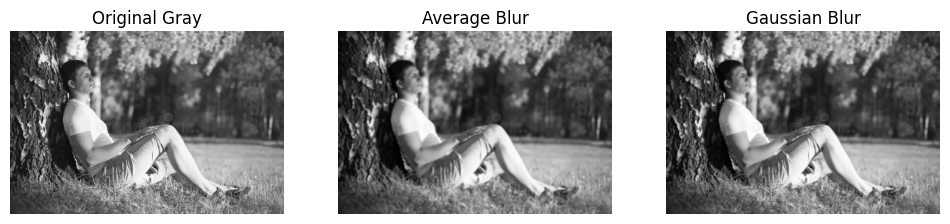

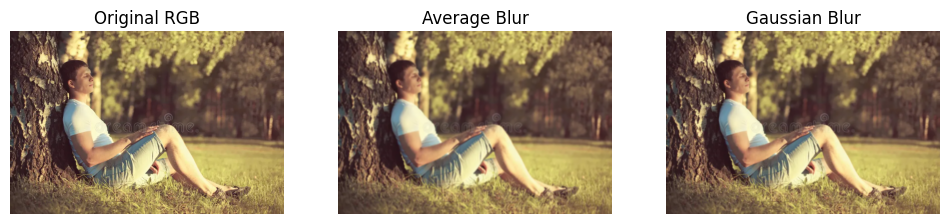

In [28]:
# Assume img_gray and img_rgb already exist

avg_gray = average_blur_gray(img_gray, 5)
gauss_gray = gaussian_blur_gray(img_gray, 5, 1.0)

avg_rgb = average_blur_rgb(img_rgb, 5)
gauss_rgb = gaussian_blur_rgb(img_rgb, 5, 1.0)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap='gray'); plt.title("Original Gray"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(avg_gray, cmap='gray'); plt.title("Average Blur"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(gauss_gray, cmap='gray'); plt.title("Gaussian Blur"); plt.axis("off")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original RGB"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(avg_rgb); plt.title("Average Blur"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(gauss_rgb); plt.title("Gaussian Blur"); plt.axis("off")
plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

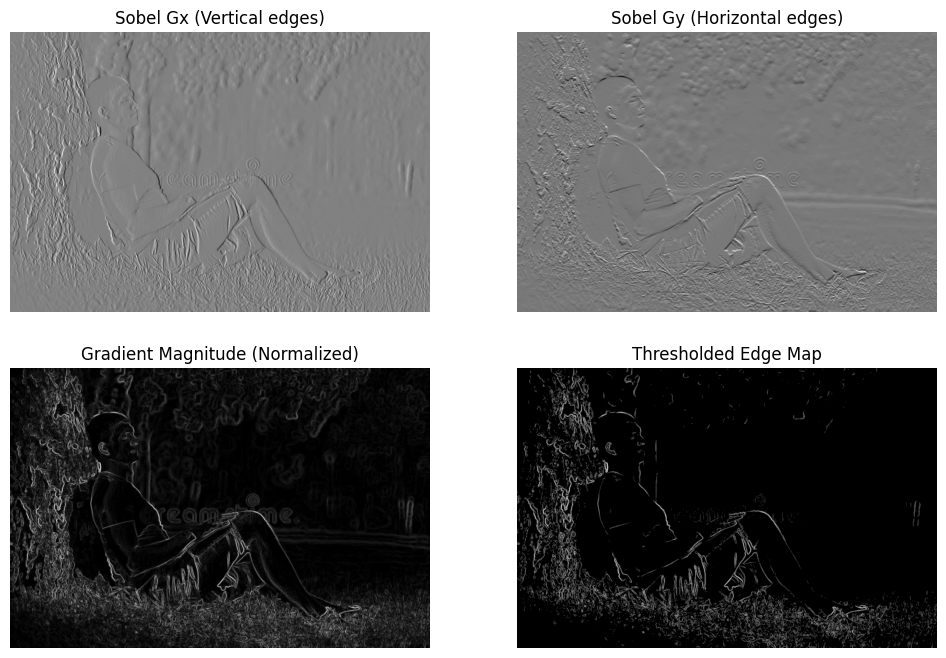

In [33]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

# Sobel X kernel (detects vertical edges)
sobel_x = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)

# Sobel Y kernel (detects horizontal edges)
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Gradient in x-direction
Gx = convolve(img_gray, sobel_x)

# Gradient in y-direction
Gy = convolve(img_gray, sobel_y)

gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

# Normalize to range 0–255
grad_norm = gradient_magnitude / gradient_magnitude.max()
grad_norm = (grad_norm * 255).astype(np.uint8)

# Thresholding
# Pixels below threshold are removed (set to 0)
threshold = 50   # try values like 30, 50, 80

edges_thresh = grad_norm.copy()
edges_thresh[edges_thresh < threshold] = 0

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(Gx, cmap='gray')
plt.title("Sobel Gx (Vertical edges)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(Gy, cmap='gray')
plt.title("Sobel Gy (Horizontal edges)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(grad_norm, cmap='gray')
plt.title("Gradient Magnitude (Normalized)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(edges_thresh, cmap='gray')
plt.title("Thresholded Edge Map")
plt.axis("off")

plt.show()


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [38]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

laplacian_kernel = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
], dtype=np.float32)

lap = convolve(img_gray, laplacian_kernel)

alpha = 0.5
sharp_lap = img_gray - alpha * lap

sharp_lap_alpha1 = img_gray - lap

sharp_lap_alpha1 = np.clip(sharp_lap_alpha1, 0, 255).astype(np.uint8)


In [39]:
import cv2

lap_cv = cv2.Laplacian(img_gray, cv2.CV_32F, ksize=3)
sharp_cv = img_gray - lap_cv
sharp_cv = np.clip(sharp_cv, 0, 255).astype(np.uint8)

In [40]:
comparison = np.array_equal(sharp_lap_alpha1, sharp_cv)
print("NumPy and OpenCV outputs identical:", comparison)

NumPy and OpenCV outputs identical: False


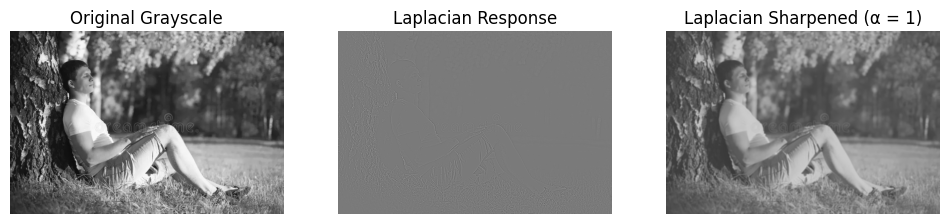

In [45]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(lap, cmap='gray')
plt.title("Laplacian Response")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sharp_lap, cmap='gray')
plt.title("Laplacian Sharpened (α = 1)")
plt.axis("off")

plt.show()


In [44]:
blurred = gaussian_blur_gray(img_gray, ksize=5, sigma=1.0)

mask = img_gray - blurred

alpha = 1.0   # try 0.3, 0.7, 1.2 etc.
sharp_unsharp = img_gray + alpha * mask

sharp_unsharp = np.clip(sharp_unsharp, 0, 255).astype(np.uint8)

alpha_neg = -1.0
blur_via_unsharp = img_gray + alpha_neg * mask
blur_via_unsharp = np.clip(blur_via_unsharp, 0, 255).astype(np.uint8)


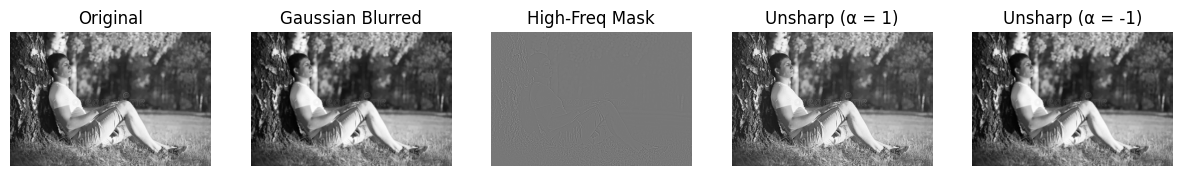

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,5,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(mask, cmap='gray')
plt.title("High-Freq Mask")
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(sharp_unsharp, cmap='gray')
plt.title("Unsharp (α = 1)")
plt.axis("off")

plt.subplot(1,5,5)
plt.imshow(blur_via_unsharp, cmap='gray')
plt.title("Unsharp (α = -1)")
plt.axis("off")

plt.show()


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [48]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

def magnitude_spectrum(img):

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    magnitude = np.abs(fshift)
    magnitude_log = np.log(1 + magnitude)

    return magnitude_log


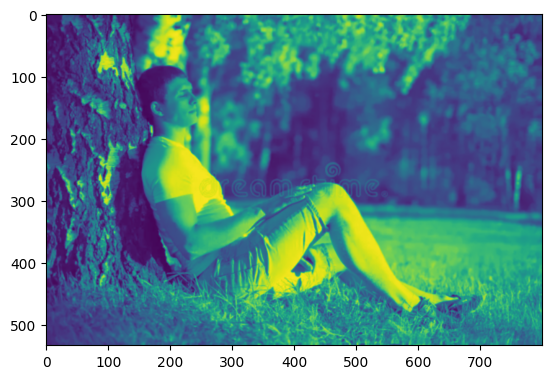

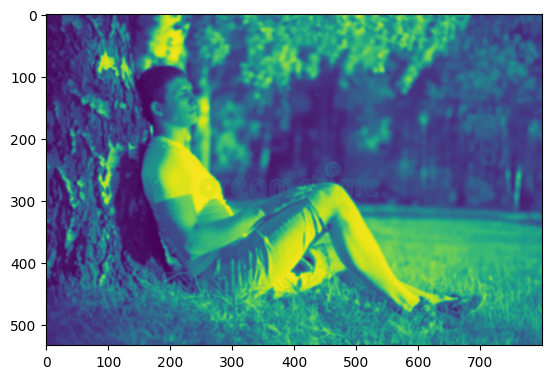

In [51]:
orig = img_gray.astype(np.float32)

blur_sigma1 = gaussian_blur_gray(orig, ksize=5, sigma=0.8)
blur_sigma2 = gaussian_blur_gray(orig, ksize=5, sigma=2.0)

plt.imshow(blur_sigma1)
plt.show()

plt.imshow(blur_sigma2)
plt.show()

In [52]:
# Blur for unsharp masking
blur_for_unsharp = gaussian_blur_gray(orig, ksize=5, sigma=1.0)

mask = orig - blur_for_unsharp

sharp_alpha_low = orig + 0.5 * mask
sharp_alpha_high = orig + 1.5 * mask

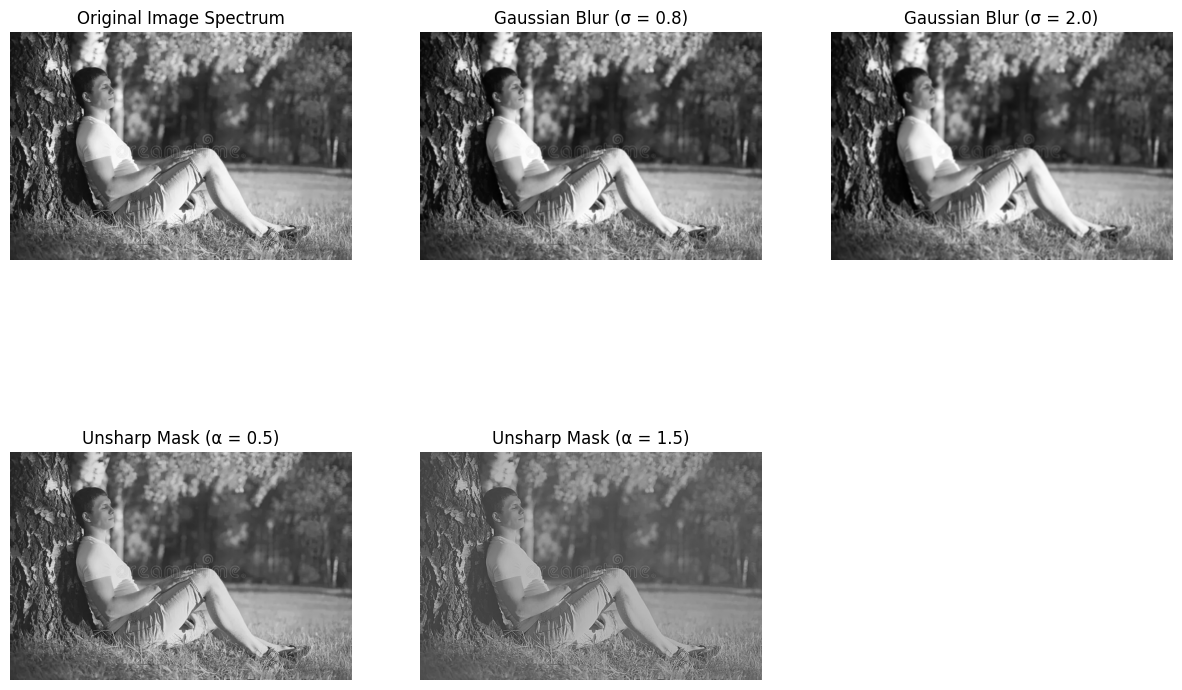

In [55]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(orig, cmap='gray')
plt.title("Original Image Spectrum")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(blur_sigma1, cmap='gray')
plt.title("Gaussian Blur (σ = 0.8)")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(blur_sigma2, cmap='gray')
plt.title("Gaussian Blur (σ = 2.0)")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(sharp_alpha_low, cmap='gray')
plt.title("Unsharp Mask (α = 0.5)")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(sharp_alpha_high, cmap='gray')
plt.title("Unsharp Mask (α = 1.5)")
plt.axis("off")

plt.show()


In [57]:
"""
The original image contains both low-frequency components (smooth regions)
concentrated near the center and high-frequency components (edges and textures)
spread away from the center.

Gaussian blurring suppresses high-frequency components.
As sigma increases, the outer regions of the spectrum become darker,
indicating removal of edges and fine details.
This confirms that Gaussian blur acts as a low-pass filter.

Unsharp masking amplifies high-frequency components.
Increasing alpha increases brightness in the outer regions of the spectrum,
showing enhancement of edges and fine details.
This verifies that unsharp masking behaves as a high-pass filter.

Gaussian kernels attenuate high frequencies (LPF)
Sharpening kernels amplify high frequencies (HPF)
"""

'\nThe original image contains both low-frequency components (smooth regions)\nconcentrated near the center and high-frequency components (edges and textures)\nspread away from the center.\n\nGaussian blurring suppresses high-frequency components.\nAs sigma increases, the outer regions of the spectrum become darker,\nindicating removal of edges and fine details.\nThis confirms that Gaussian blur acts as a low-pass filter.\n\nUnsharp masking amplifies high-frequency components.\nIncreasing alpha increases brightness in the outer regions of the spectrum,\nshowing enhancement of edges and fine details.\nThis verifies that unsharp masking behaves as a high-pass filter.\n\nGaussian kernels attenuate high frequencies (LPF)\nSharpening kernels amplify high frequencies (HPF)\n'

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

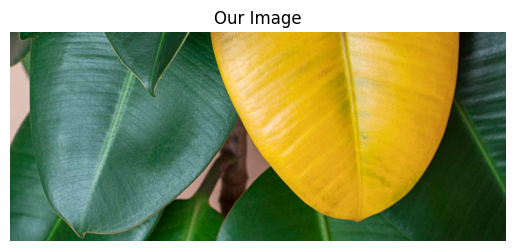

In [63]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

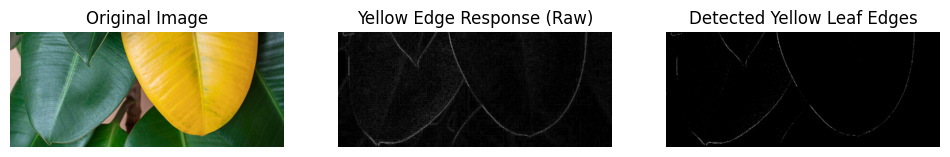

In [65]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

R = img_part5[..., 0].astype(np.float32)
G = img_part5[..., 1].astype(np.float32)
B = img_part5[..., 2].astype(np.float32)

edge_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

edge_R = convolve(R, edge_kernel)

RG_diff = R - G

edge_RG = convolve(RG_diff, edge_kernel)

edge_combined = np.abs(edge_R) + np.abs(edge_RG)

edge_norm = edge_combined / edge_combined.max()
edge_norm = (edge_norm * 255).astype(np.uint8)

edges_yellow = edge_norm.copy()
edges_yellow[edges_yellow < 60] = 0

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(img_part5)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(edge_norm, cmap="gray")
plt.title("Yellow Edge Response (Raw)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(edges_yellow, cmap="gray")
plt.title("Detected Yellow Leaf Edges")
plt.axis("off")

plt.show()


In [66]:
"""
Yellow leaves have high R and G values, while green leaves have low R and high G.
The transition from green to yellow causes a strong change in the R channel and
a significant change in the R-G difference.
By computing edges in both the Red channel and the R-G difference image and
combining their responses, we selectively highlight yellow leaf boundaries.
"""

'\nYellow leaves have high R and G values, while green leaves have low R and high G.\nThe transition from green to yellow causes a strong change in the R channel and\na significant change in the R-G difference.\nBy computing edges in both the Red channel and the R-G difference image and\ncombining their responses, we selectively highlight yellow leaf boundaries.\n'

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
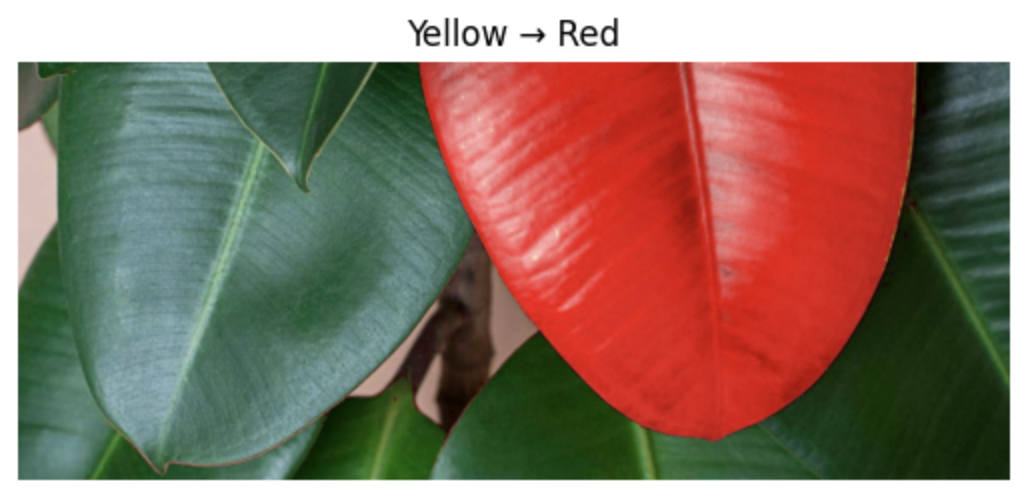

Also, we can change to a less brighter colour
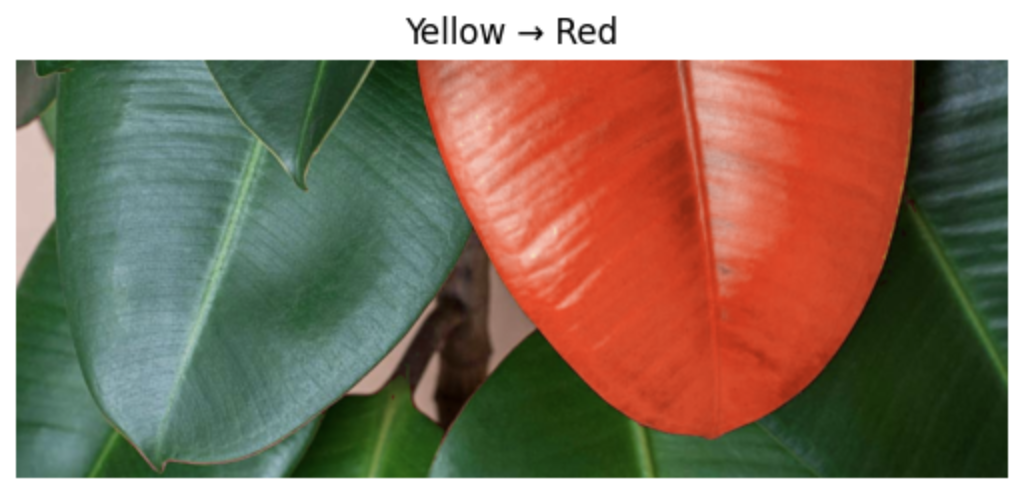

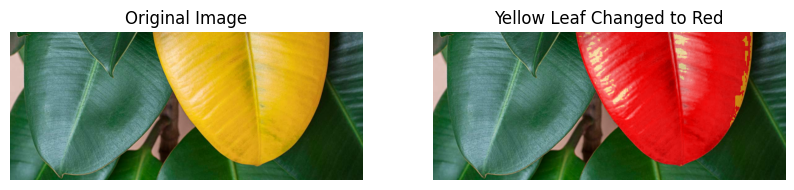

In [68]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

hsv = cv2.cvtColor(img_part5, cv2.COLOR_RGB2HSV)

H, S, V = cv2.split(hsv)

yellow_mask = (
    (H >= 20) & (H <= 35) &   # Hue range for yellow
    (S > 100) &               # High saturation
    (V > 100)                 # Bright enough
)

hsv_red = hsv.copy()
hsv_red[..., 0][yellow_mask] = 0

result_rgb = cv2.cvtColor(hsv_red, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_part5)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result_rgb)
plt.title("Yellow Leaf Changed to Red")
plt.axis("off")

plt.show()